# World Cup 2022 Predictions


In [1]:
#importing libraries for analysis
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns
import pandas as pd
import numpy as np
from IPython import display

#reading world cup team data for 2022 games
da = pd.read_csv('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/data/WC_2022.csv')

In [2]:
# viewing the data
# GF = goals for, GA = goals against, GP = games played
da.head()

Team  GF  GA  GP
0  Argentina  26   2   9
1  Australia  13   7   9
2    Belgium  16   9   8
3     Brazil  27   3   8
4   Cameroon  20  14  15

In [3]:
#viewing data types
da.dtypes

Team    object
GF       int64
GA       int64
GP       int64
dtype: object

In [4]:
#converting int to float
da['GF'] = pd.to_numeric(da['GF'], downcast = 'float')
da['GA'] = pd.to_numeric(da['GA'], downcast = 'float')
da['GP'] = pd.to_numeric(da['GP'], downcast = 'float')

In [5]:
#checking data types again
da.dtypes

Team     object
GF      float32
GA      float32
GP      float32
dtype: object

In [6]:
# viewing the data again
da.head()

Team    GF    GA    GP
0  Argentina  26.0   2.0   9.0
1  Australia  13.0   7.0   9.0
2    Belgium  16.0   9.0   8.0
3     Brazil  27.0   3.0   8.0
4   Cameroon  20.0  14.0  15.0

In [7]:
# regarding methodology, a few things need to be calculated such as:
# team GF averages, team GA averages, league GF average, league GA average, and league GP average
# new columns for team averages also need to be created

In [8]:
#calculating the league variables
leagueGP = np.mean(da['GP'])
print(leagueGP)

leagueGF = np.mean(da['GF'])
print(leagueGF)

leagueGA = np.mean(da['GA'])
print(leagueGA)

11.0
16.90625
9.1875


In [9]:
# creating new columns for team average values
da['GF_AVG'] = da['GF'] / da['GP']
da['GA_AVG'] = da['GA'] / da['GP']

da.head()

Team    GF    GA    GP    GF_AVG    GA_AVG
0  Argentina  26.0   2.0   9.0  2.888889  0.222222
1  Australia  13.0   7.0   9.0  1.444444  0.777778
2    Belgium  16.0   9.0   8.0  2.000000  1.125000
3     Brazil  27.0   3.0   8.0  3.375000  0.375000
4   Cameroon  20.0  14.0  15.0  1.333333  0.933333

In [10]:
# calculating AS (team attack strength) and DS (team defence strength)
da['AS'] = da['GF_AVG'] / leagueGF
da['DS'] = da['GA_AVG'] / leagueGA

In [11]:
#viewing AS and DS values
da.loc[:,["Team", "AS", "DS"]]

Team        AS        DS
0      Argentina  0.170877  0.024187
1      Australia  0.085438  0.084656
2        Belgium  0.118299  0.122449
3         Brazil  0.199630  0.040816
4       Cameroon  0.078866  0.101587
5         Canada  0.103512  0.081633
6     Costa Rica  0.069008  0.054422
7        Croatia  0.078866  0.096750
8        Denmark  0.103512  0.122449
9        Ecuador  0.035490  0.065306
10       England  0.066543  0.149660
11        France  0.088725  0.108844
12       Germany  0.098583  0.120937
13         Ghana  0.066109  0.121649
14          Iran  0.059150  0.068027
15         Japan  0.114074  0.069971
16        Mexico  0.069588  0.076831
17       Morocco  0.100100  0.092098
18   Netherlands  0.140481  0.122449
19        Poland  0.065722  0.157218
20      Portugal  0.131444  0.048375
21         Qatar  0.068250  0.108844
22  Saudi Arabia  0.029575  0.054422
23       Senegal  0.079852  0.081633
24        Serbia  0.147874  0.108844
25   South Korea  0.121996  0.102041
26         Spain  0.118299  0.084656
27   Switzerland  0.052578  0.169312
28       Tunisia  0.077350  0.066981
29       Uruguay  0.118299  0.024187
30           USA  0.088725  0.072562
31         Wales  0.065722  0.157218

In [12]:
# to calculate the team's expected goals (xG) in a match, the following formula is used:
# team xG = team AS * opponent DS * leagueGF
# since we are estimating every match in the group stage, the World Cup 2022 schedule is required
# the top two teams in each group during the group stage will advance to the "Round of 16"
# after calculating the probabilities for scoring, a poisson distribution will be used to calculate match score likelihoods
# the team with the higher probability of winning will be selected as the match winner with respect to match score likelihoods
# given the relative strength of teams and the desire to prevent excessive draws in a bracket which can create stalemates...
# if a team's probability to win is significantly large, such as 0.12, then the win will be given to that team
# in the event of stalemates, the team with the greater Fifa ranking will be selected

# World Cup 2022 Groups

In [13]:
#importing World Cup 2022 groups
da_sched = pd.read_csv('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/data/WC_Groups.csv')
da_sched.sort_values(['Group', 'Country'], ascending = (True, True))

Country Group
1        Ecuador     A
3    Netherlands     A
0          Qatar     A
2        Senegal     A
4        England     B
5           Iran     B
6            USA     B
7          Wales     B
8      Argentina     C
10        Mexico     C
11        Poland     C
9   Saudi Arabia     C
13     Australia     D
14       Denmark     D
12        France     D
15       Tunisia     D
17    Costa Rica     E
18       Germany     E
19         Japan     E
16         Spain     E
20       Belgium     F
21        Canada     F
23       Croatia     F
22       Morocco     F
24        Brazil     G
27      Cameroon     G
26        Serbia     G
25   Switzerland     G
30         Ghana     H
28      Portugal     H
31   South Korea     H
29       Uruguay     H

# World Cup 2022 Bracket

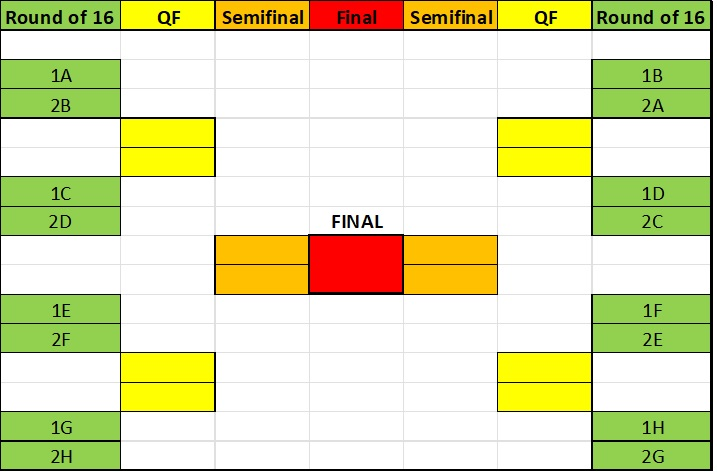

In [14]:
display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket.jpg') 

# Group A Predictions

In [15]:
#creating variables to count wins and draws for points calculations
Ecuador_wins = 0
Ecuador_draws = 0
Netherlands_wins = 0
Netherlands_draws = 0
Qatar_wins = 0
Qatar_draws = 0
Senegal_wins = 0
Senegal_draws = 0

## Ecuador vs. Netherlands


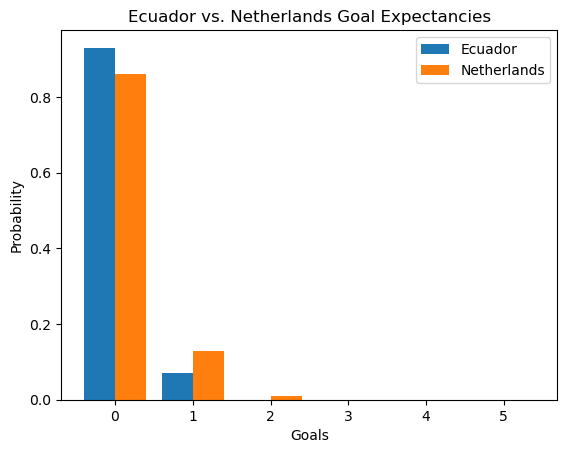

These are the score line probabilities:  [0.7998000000000001, 0.12090000000000001, 0.060200000000000004, 0.0091]


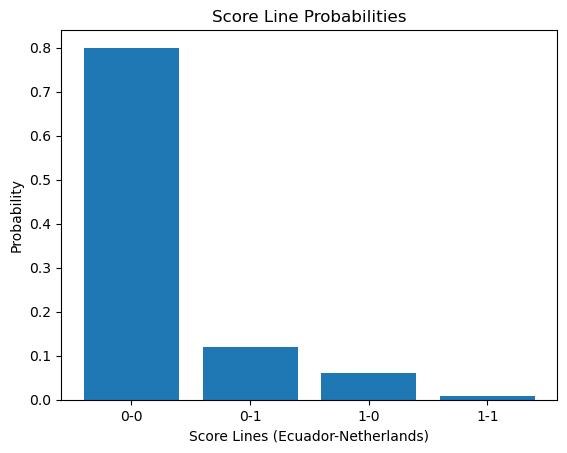

In [16]:
#Ecuador xG
EcuadorxG = (da['AS'][9]) * (da['DS'][18]) * leagueGF

#Netherlands xG
NetherlandsxG = (da['AS'][18]) * (da['DS'][9]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Ecuador probability mass function
Ecuador_pmf = poisson.pmf(Goals, EcuadorxG)
Ecuador_pmf = np.round(Ecuador_pmf, 2)
Ecuador_pmf

#Netherlands probability mass function
Netherlands_pmf = poisson.pmf(Goals, NetherlandsxG)
Netherlands_pmf = np.round(Netherlands_pmf, 2)
Netherlands_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Ecuador_pmf, 0.4, label = 'Ecuador')
plt.bar(X_axis + 0.2, Netherlands_pmf, 0.4, label = 'Netherlands')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Ecuador vs. Netherlands Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Ecuador_pmf[0] * Netherlands_pmf[0])
score_prob_lst.append(Ecuador_pmf[0] * Netherlands_pmf[1])
score_prob_lst.append(Ecuador_pmf[1] * Netherlands_pmf[0])
score_prob_lst.append(Ecuador_pmf[1] * Netherlands_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Ecuador-Netherlands)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [17]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Netherlands win
# as a 1-0 score line is significantly large, Netherlands wins

Netherlands_wins = Netherlands_wins + 1

## Ecuador vs. Qatar

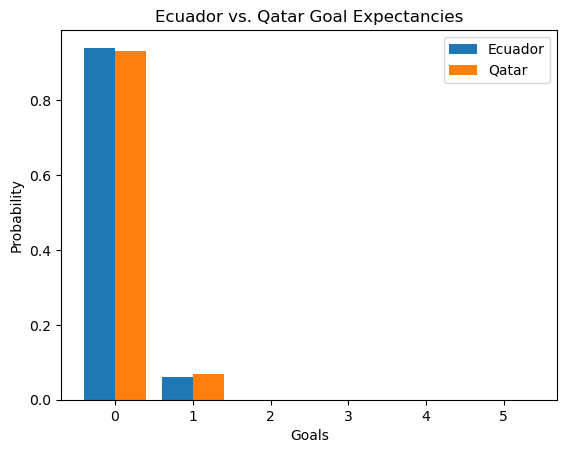

These are the score line probabilities:  [0.8742, 0.0658, 0.0558, 0.004200000000000001]


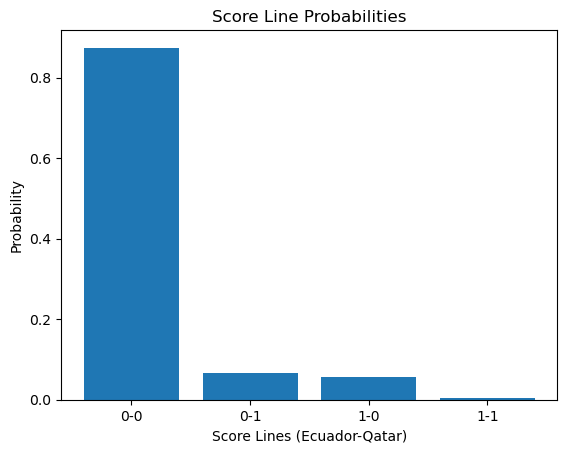

In [18]:
#Ecuador xG
EcuadorxG = (da['AS'][9]) * (da['DS'][21]) * leagueGF

#Qatar xG
QatarxG = (da['AS'][21]) * (da['DS'][9]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Ecuador probability mass function
Ecuador_pmf = poisson.pmf(Goals, EcuadorxG)
Ecuador_pmf = np.round(Ecuador_pmf, 2)
Ecuador_pmf

#Netherlands probability mass function
Qatar_pmf = poisson.pmf(Goals, QatarxG)
Qatar_pmf = np.round(Qatar_pmf, 2)
Qatar_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Ecuador_pmf, 0.4, label = 'Ecuador')
plt.bar(X_axis + 0.2, Qatar_pmf, 0.4, label = 'Qatar')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Ecuador vs. Qatar Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Ecuador_pmf[0] * Qatar_pmf[0])
score_prob_lst.append(Ecuador_pmf[0] * Qatar_pmf[1])
score_prob_lst.append(Ecuador_pmf[1] * Qatar_pmf[0])
score_prob_lst.append(Ecuador_pmf[1] * Qatar_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Ecuador-Qatar)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [19]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Qatar win

Ecuador_draws = Ecuador_draws + 1
Qatar_draws = Qatar_draws + 1

## Ecuador vs. Senegal

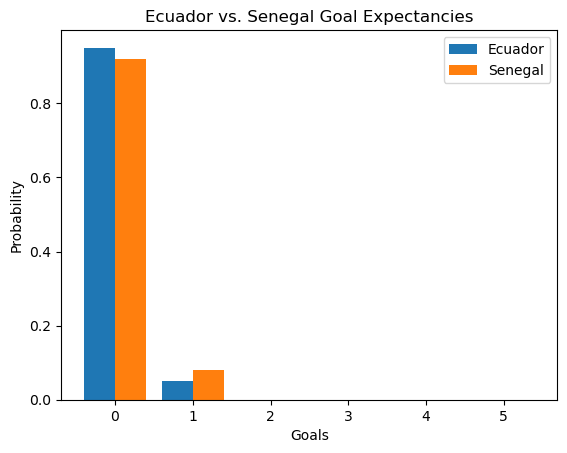

These are the score line probabilities:  [0.874, 0.076, 0.046000000000000006, 0.004]


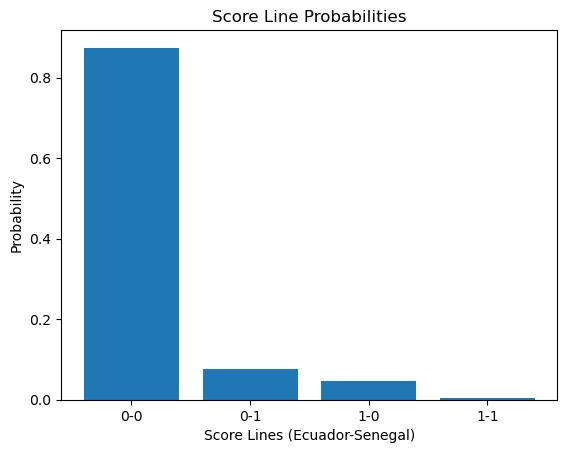

In [20]:
#Ecuador xG
EcuadorxG = (da['AS'][9]) * (da['DS'][23]) * leagueGF

#Senegal xG
SenegalxG = (da['AS'][23]) * (da['DS'][9]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Ecuador probability mass function
Ecuador_pmf = poisson.pmf(Goals, EcuadorxG)
Ecuador_pmf = np.round(Ecuador_pmf, 2)
Ecuador_pmf

#Netherlands probability mass function
Senegal_pmf = poisson.pmf(Goals, SenegalxG)
Senegal_pmf = np.round(Senegal_pmf, 2)
Senegal_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Ecuador_pmf, 0.4, label = 'Ecuador')
plt.bar(X_axis + 0.2, Senegal_pmf, 0.4, label = 'Senegal')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Ecuador vs. Senegal Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Ecuador_pmf[0] * Senegal_pmf[0])
score_prob_lst.append(Ecuador_pmf[0] * Senegal_pmf[1])
score_prob_lst.append(Ecuador_pmf[1] * Senegal_pmf[0])
score_prob_lst.append(Ecuador_pmf[1] * Senegal_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Ecuador-Senegal)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [21]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Senegal win

Ecuador_draws = Ecuador_draws + 1
Senegal_draws = Senegal_draws + 1

## Netherlands vs. Qatar

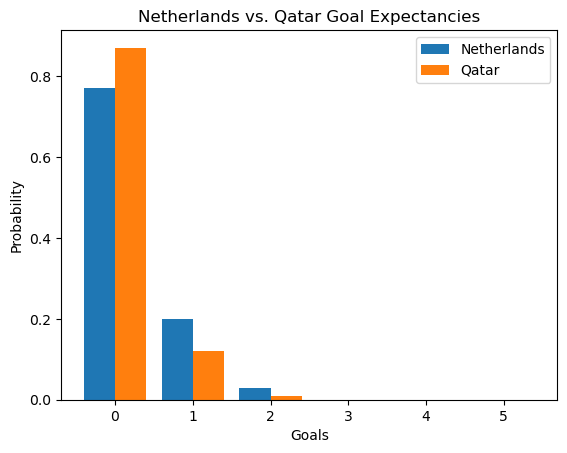

These are the score line probabilities:  [0.6699, 0.0924, 0.17400000000000002, 0.024]


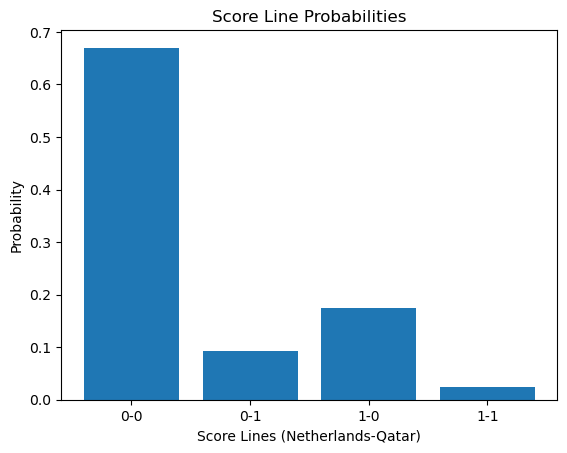

In [22]:
#Netherlands xG
NetherlandsxG = (da['AS'][18]) * (da['DS'][21]) * leagueGF

#Qatar xG
QatarxG = (da['AS'][21]) * (da['DS'][18]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Netherlands probability mass function
Netherlands_pmf = poisson.pmf(Goals, NetherlandsxG)
Netherlands_pmf = np.round(Netherlands_pmf, 2)
Netherlands_pmf

#Qatar probability mass function
Qatar_pmf = poisson.pmf(Goals, QatarxG)
Qatar_pmf = np.round(Qatar_pmf, 2)
Qatar_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Netherlands_pmf, 0.4, label = 'Netherlands')
plt.bar(X_axis + 0.2, Qatar_pmf, 0.4, label = 'Qatar')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Netherlands vs. Qatar Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Netherlands_pmf[0] * Qatar_pmf[0])
score_prob_lst.append(Netherlands_pmf[0] * Qatar_pmf[1])
score_prob_lst.append(Netherlands_pmf[1] * Qatar_pmf[0])
score_prob_lst.append(Netherlands_pmf[1] * Qatar_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Netherlands-Qatar)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [23]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Netherlands win
# as a 1-0 score line is significantly large, Netherlands wins

Netherlands_wins = Netherlands_wins + 1

## Netherlands vs. Senegal

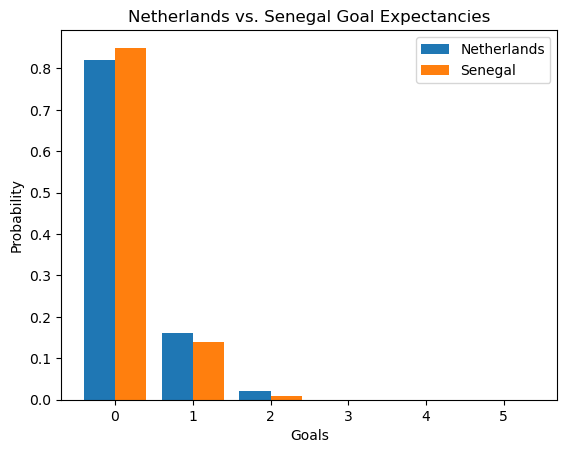

These are the score line probabilities:  [0.697, 0.1148, 0.136, 0.022400000000000003]


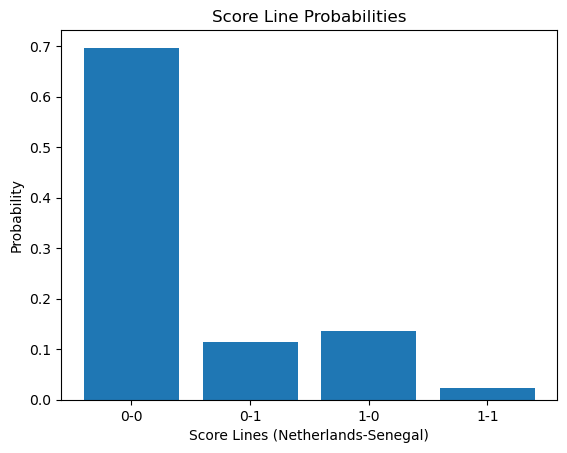

In [24]:
#Netherlands xG
NetherlandsxG = (da['AS'][18]) * (da['DS'][23]) * leagueGF

#Senegal xG
SenegalxG = (da['AS'][23]) * (da['DS'][18]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Netherlands probability mass function
Netherlands_pmf = poisson.pmf(Goals, NetherlandsxG)
Netherlands_pmf = np.round(Netherlands_pmf, 2)
Netherlands_pmf

#Senegal probability mass function
Senegal_pmf = poisson.pmf(Goals, SenegalxG)
Senegal_pmf = np.round(Senegal_pmf, 2)
Senegal_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Netherlands_pmf, 0.4, label = 'Netherlands')
plt.bar(X_axis + 0.2, Senegal_pmf, 0.4, label = 'Senegal')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Netherlands vs. Senegal Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Netherlands_pmf[0] * Senegal_pmf[0])
score_prob_lst.append(Netherlands_pmf[0] * Senegal_pmf[1])
score_prob_lst.append(Netherlands_pmf[1] * Senegal_pmf[0])
score_prob_lst.append(Netherlands_pmf[1] * Senegal_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Netherlands-Senegal)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [25]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Netherlands win
# as a 1-0 score line is significantly large, Netherlands wins

Netherlands_wins = Netherlands_wins + 1

## Qatar vs. Senegal

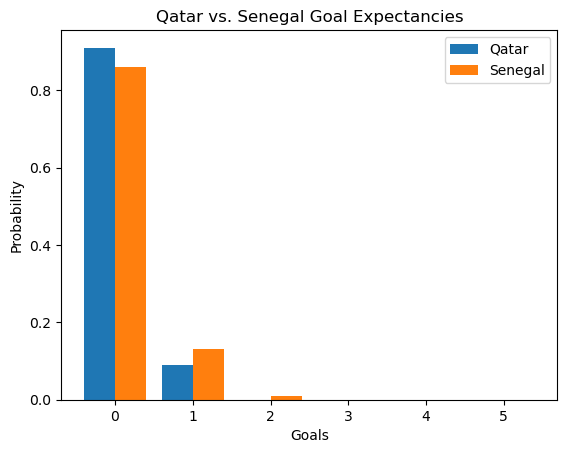

These are the score line probabilities:  [0.7826, 0.1183, 0.0774, 0.0117]


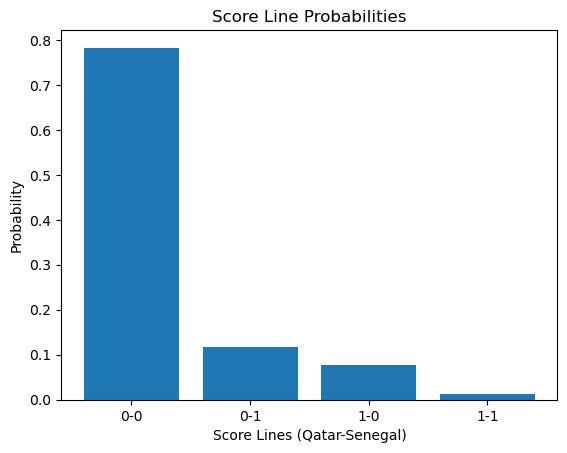

In [26]:
#Qatar xG
QatarxG = (da['AS'][21]) * (da['DS'][23]) * leagueGF

#Senegal xG
SenegalxG = (da['AS'][23]) * (da['DS'][21]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Qatar probability mass function
Qatar_pmf = poisson.pmf(Goals, QatarxG)
Qatar_pmf = np.round(Qatar_pmf, 2)
Qatar_pmf

#Senegal probability mass function
Senegal_pmf = poisson.pmf(Goals, SenegalxG)
Senegal_pmf = np.round(Senegal_pmf, 2)
Senegal_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Qatar_pmf, 0.4, label = 'Qatar')
plt.bar(X_axis + 0.2, Senegal_pmf, 0.4, label = 'Senegal')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Qatar vs. Senegal Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Qatar_pmf[0] * Senegal_pmf[0])
score_prob_lst.append(Qatar_pmf[0] * Senegal_pmf[1])
score_prob_lst.append(Qatar_pmf[1] * Senegal_pmf[0])
score_prob_lst.append(Qatar_pmf[1] * Senegal_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Qatar-Senegal)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [27]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Senegal win
# as a 1-0 score line is significantly large, Senegal wins

Senegal_wins = Senegal_wins + 1

## Group A Advancement

In [28]:
print("Ecuador wins: ", Ecuador_wins)
print("Netherlands wins: ", Netherlands_wins)
print("Qatar wins: ", Qatar_wins)
print("Senegal wins: ", Senegal_wins)

Ecuador wins:  0
Netherlands wins:  3
Qatar wins:  0
Senegal wins:  1


Netherlands advances as 1A, Senegal advances as 1B


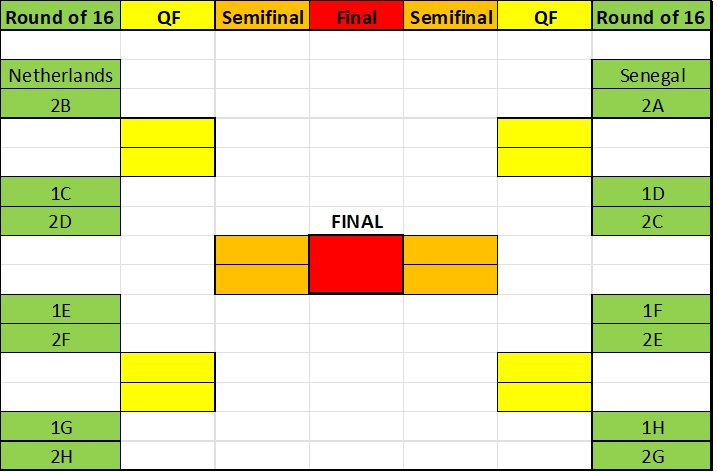

In [29]:
print('Netherlands advances as 1A, Senegal advances as 1B')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%201.jpg') 

# Group B Predictions

In [30]:
#creating variables to count wins and draws for points calculations
England_wins = 0
England_draws = 0
Iran_wins = 0
Iran_draws = 0
USA_wins = 0
USA_draws = 0
Wales_wins = 0
Wales_draws = 0

## England vs. Iran

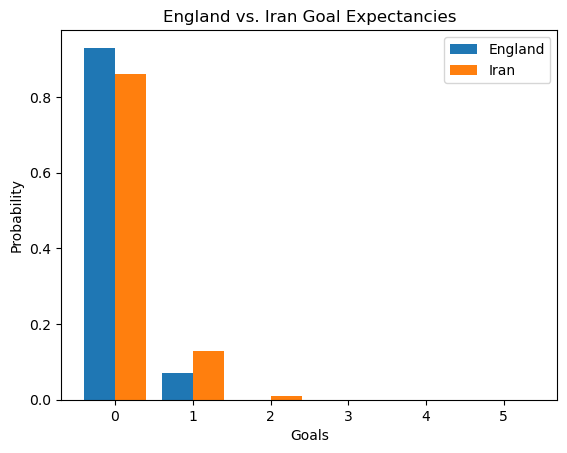

These are the score line probabilities:  [0.7998000000000001, 0.12090000000000001, 0.060200000000000004, 0.0091]


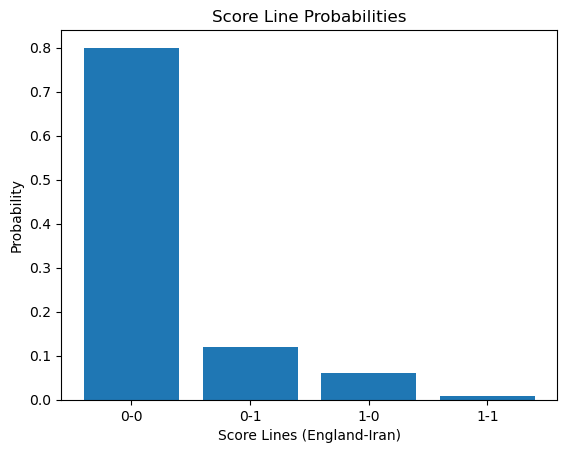

In [31]:
#England xG
EnglandxG = (da['AS'][10]) * (da['DS'][14]) * leagueGF

#Iran xG
IranxG = (da['AS'][14]) * (da['DS'][10]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#England probability mass function
England_pmf = poisson.pmf(Goals, EnglandxG)
England_pmf = np.round(England_pmf, 2)
England_pmf

#Iran probability mass function
Iran_pmf = poisson.pmf(Goals, IranxG)
Iran_pmf = np.round(Iran_pmf, 2)
Iran_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, England_pmf, 0.4, label = 'England')
plt.bar(X_axis + 0.2, Iran_pmf, 0.4, label = 'Iran')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("England vs. Iran Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(England_pmf[0] * Iran_pmf[0])
score_prob_lst.append(England_pmf[0] * Iran_pmf[1])
score_prob_lst.append(England_pmf[1] * Iran_pmf[0])
score_prob_lst.append(England_pmf[1] * Iran_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (England-Iran)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [32]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, an Iran win
# as a 0-1 score line is significantly large, Iran wins

Iran_wins = Iran_wins + 1

## England vs. USA

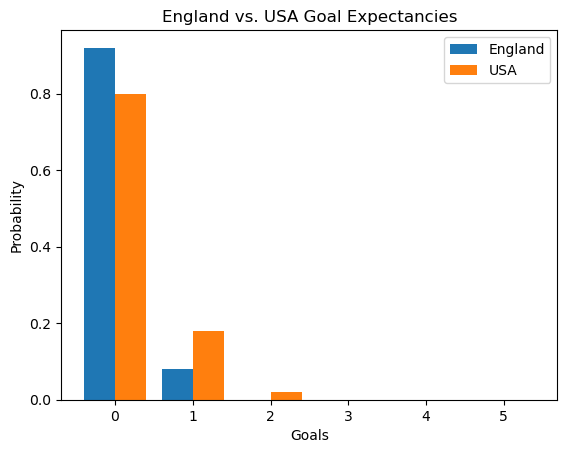

These are the score line probabilities:  [0.7360000000000001, 0.1656, 0.064, 0.0144]


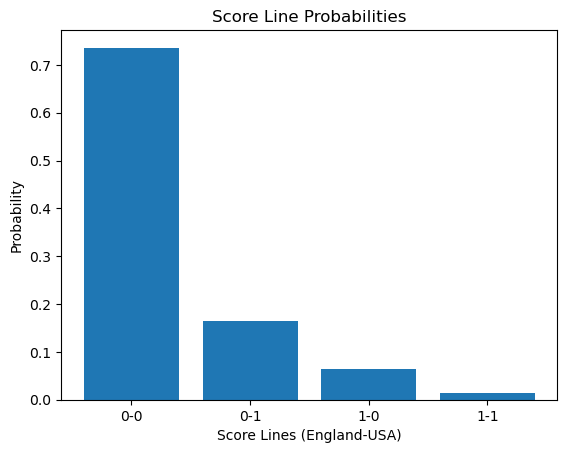

In [33]:
#England xG
EnglandxG = (da['AS'][10]) * (da['DS'][30]) * leagueGF

#USA xG
USAxG = (da['AS'][30]) * (da['DS'][10]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#England probability mass function
England_pmf = poisson.pmf(Goals, EnglandxG)
England_pmf = np.round(England_pmf, 2)
England_pmf

#USA probability mass function
USA_pmf = poisson.pmf(Goals, USAxG)
USA_pmf = np.round(USA_pmf, 2)
USA_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, England_pmf, 0.4, label = 'England')
plt.bar(X_axis + 0.2, USA_pmf, 0.4, label = 'USA')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("England vs. USA Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(England_pmf[0] * USA_pmf[0])
score_prob_lst.append(England_pmf[0] * USA_pmf[1])
score_prob_lst.append(England_pmf[1] * USA_pmf[0])
score_prob_lst.append(England_pmf[1] * USA_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (England-USA)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [34]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a USA win
# as a 0-1 score line is significantly large, USA wins

USA_wins = USA_wins + 1

## England vs. Wales

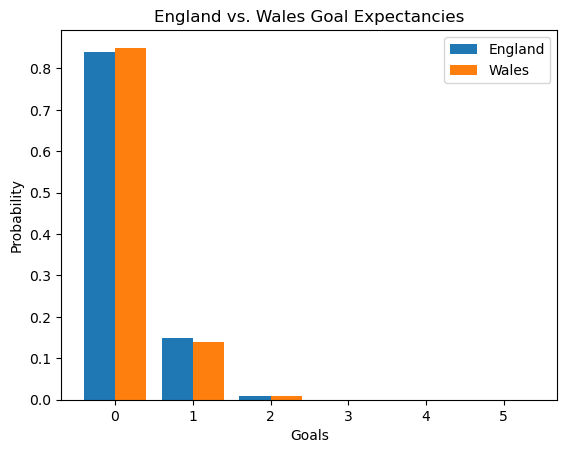

These are the score line probabilities:  [0.714, 0.11760000000000001, 0.1275, 0.021]


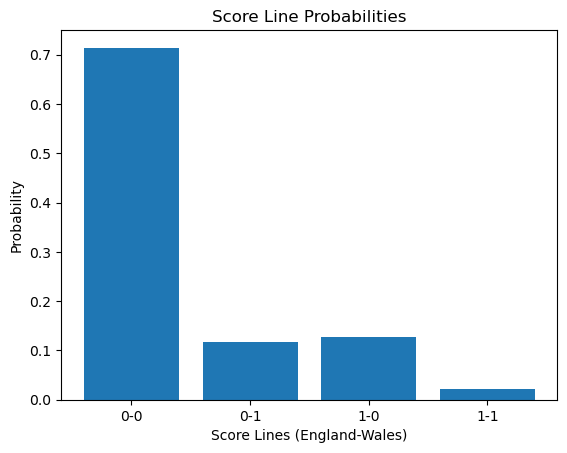

In [35]:
#England xG
EnglandxG = (da['AS'][10]) * (da['DS'][31]) * leagueGF

#Wales xG
WalesxG = (da['AS'][31]) * (da['DS'][10]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#England probability mass function
England_pmf = poisson.pmf(Goals, EnglandxG)
England_pmf = np.round(England_pmf, 2)
England_pmf

#Wales probability mass function
Wales_pmf = poisson.pmf(Goals, WalesxG)
Wales_pmf = np.round(Wales_pmf, 2)
Wales_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, England_pmf, 0.4, label = 'England')
plt.bar(X_axis + 0.2, Wales_pmf, 0.4, label = 'Wales')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("England vs. Wales Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(England_pmf[0] * Wales_pmf[0])
score_prob_lst.append(England_pmf[0] * Wales_pmf[1])
score_prob_lst.append(England_pmf[1] * Wales_pmf[0])
score_prob_lst.append(England_pmf[1] * Wales_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (England-Wales)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [36]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, an England win
# as a 1-0 score line is significantly large, England wins

England_wins = England_wins + 1

## Iran vs. USA

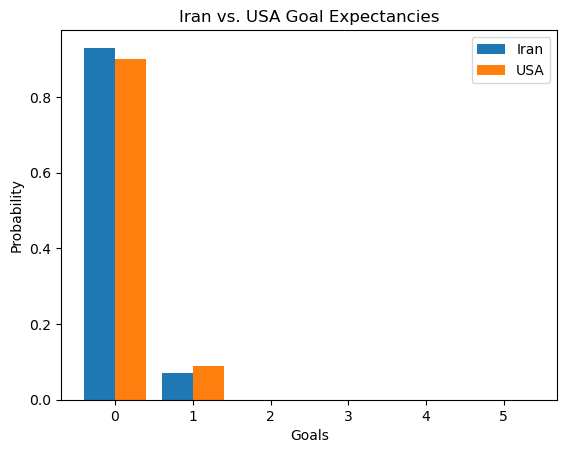

These are the score line probabilities:  [0.8370000000000001, 0.0837, 0.06300000000000001, 0.0063]


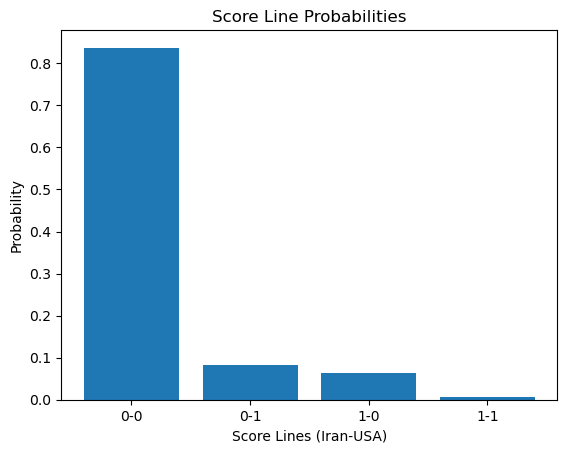

In [37]:
#Iran xG
IranxG = (da['AS'][14]) * (da['DS'][30]) * leagueGF

#USA xG
USAxG = (da['AS'][30]) * (da['DS'][14]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Iran probability mass function
Iran_pmf = poisson.pmf(Goals, IranxG)
Iran_pmf = np.round(Iran_pmf, 2)
Iran_pmf

#USA probability mass function
USA_pmf = poisson.pmf(Goals, USAxG)
USA_pmf = np.round(USA_pmf, 2)
USA_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Iran_pmf, 0.4, label = 'Iran')
plt.bar(X_axis + 0.2, USA_pmf, 0.4, label = 'USA')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Iran vs. USA Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Iran_pmf[0] * USA_pmf[0])
score_prob_lst.append(Iran_pmf[0] * USA_pmf[1])
score_prob_lst.append(Iran_pmf[1] * USA_pmf[0])
score_prob_lst.append(Iran_pmf[1] * USA_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Iran-USA)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [38]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a USA win

Iran_draws = Iran_draws + 1
USA_draws = USA_draws + 1

## Iran vs. Wales

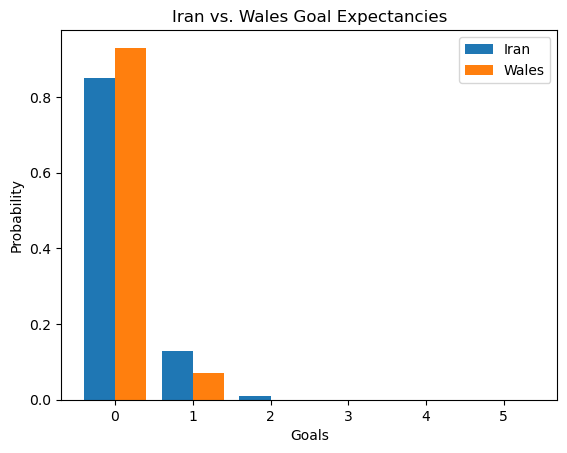

These are the score line probabilities:  [0.7905, 0.059500000000000004, 0.12090000000000001, 0.0091]


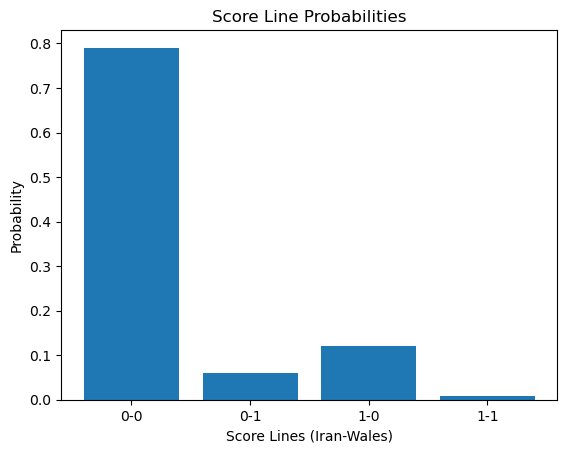

In [39]:
#Iran xG
IranxG = (da['AS'][14]) * (da['DS'][31]) * leagueGF

#Wales xG
WalesxG = (da['AS'][31]) * (da['DS'][14]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Iran probability mass function
Iran_pmf = poisson.pmf(Goals, IranxG)
Iran_pmf = np.round(Iran_pmf, 2)
Iran_pmf

#Wales probability mass function
Wales_pmf = poisson.pmf(Goals, WalesxG)
Wales_pmf = np.round(Wales_pmf, 2)
Wales_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Iran_pmf, 0.4, label = 'Iran')
plt.bar(X_axis + 0.2, Wales_pmf, 0.4, label = 'Wales')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Iran vs. Wales Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Iran_pmf[0] * Wales_pmf[0])
score_prob_lst.append(Iran_pmf[0] * Wales_pmf[1])
score_prob_lst.append(Iran_pmf[1] * Wales_pmf[0])
score_prob_lst.append(Iran_pmf[1] * Wales_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Iran-Wales)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [40]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, an Iran win
# as a 1-0 score line is significantly large, Iran wins

Iran_wins = Iran_wins + 1

## USA vs. Wales

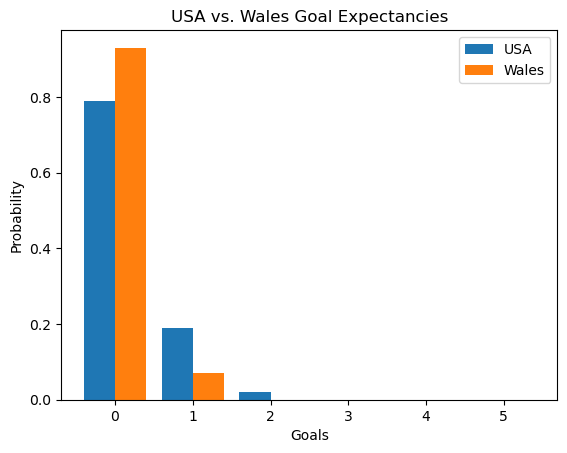

These are the score line probabilities:  [0.7347, 0.05530000000000001, 0.17670000000000002, 0.013300000000000001]


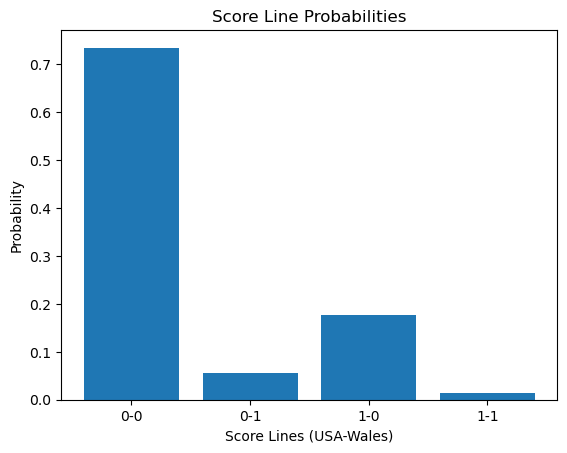

In [41]:
#USA xG
USAxG = (da['AS'][30]) * (da['DS'][31]) * leagueGF

#Wales xG
WalesxG = (da['AS'][31]) * (da['DS'][14]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#USA probability mass function
USA_pmf = poisson.pmf(Goals, USAxG)
USA_pmf = np.round(USA_pmf, 2)
USA_pmf

#Wales probability mass function
Wales_pmf = poisson.pmf(Goals, WalesxG)
Wales_pmf = np.round(Wales_pmf, 2)
Wales_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, USA_pmf, 0.4, label = 'USA')
plt.bar(X_axis + 0.2, Wales_pmf, 0.4, label = 'Wales')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("USA vs. Wales Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(USA_pmf[0] * Wales_pmf[0])
score_prob_lst.append(USA_pmf[0] * Wales_pmf[1])
score_prob_lst.append(USA_pmf[1] * Wales_pmf[0])
score_prob_lst.append(USA_pmf[1] * Wales_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (USA-Wales)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [42]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a USA win
# as a 1-0 score line is significantly large, USA wins

USA_wins = USA_wins + 1

## Group B Advancement

In [43]:
print("England wins: ", England_wins)
print("England_draws: ", England_draws)
print("Iran wins: ", Iran_wins)
print("Iran draws: ", Iran_draws)
print("USA wins: ", USA_wins)
print("USA draws: ", USA_draws)
print("Wales wins: ", Wales_wins)
print("Wales draws: ", Wales_draws)

England wins:  1
England_draws:  0
Iran wins:  2
Iran draws:  1
USA wins:  2
USA draws:  1
Wales wins:  0
Wales draws:  0


USA advances as 1B, Iran advances as 2B


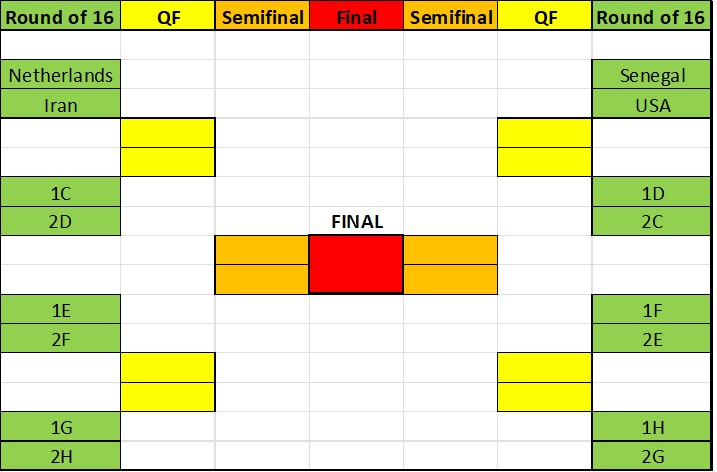

In [44]:
# since there is a tie for 2A, USA ranks first due to the higher Fifa ranking condition
print('USA advances as 1B, Iran advances as 2B')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%202.jpg')

# Group C Predictions

In [45]:
#creating variables to count wins and draws for points calculations
Argentina_wins = 0
Argentina_draws = 0
Mexico_wins = 0
Mexico_draws = 0
Poland_wins = 0
Poland_draws = 0
SaudiArabia_wins = 0
SaudiArabia_draws = 0

## Argentina vs. Poland

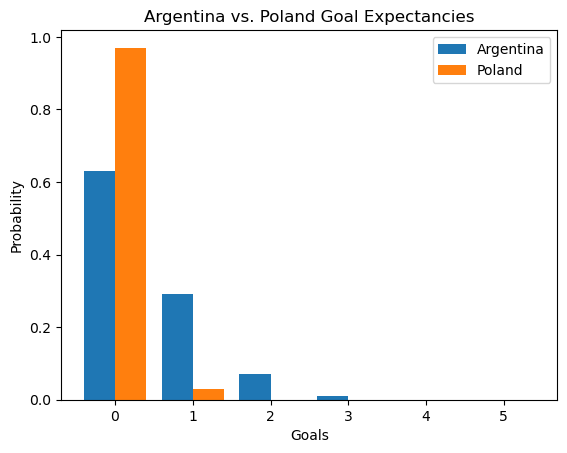

These are the score line probabilities:  [0.6111, 0.0189, 0.2813, 0.0087]


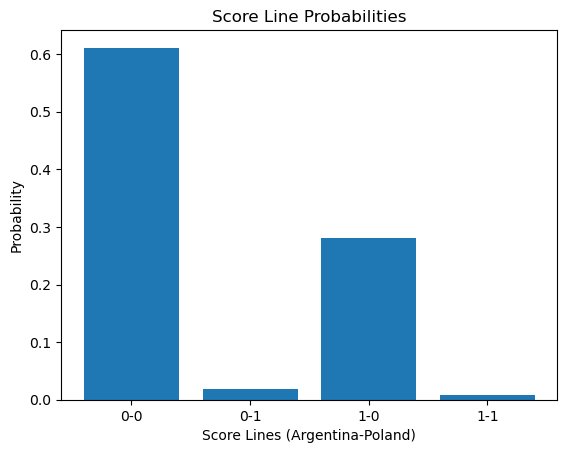

In [46]:
#Argentina xG
ArgentinaxG = (da['AS'][0]) * (da['DS'][19]) * leagueGF

#Poland xG
PolandxG = (da['AS'][19]) * (da['DS'][0]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Argentina probability mass function
Argentina_pmf = poisson.pmf(Goals, ArgentinaxG)
Argentina_pmf = np.round(Argentina_pmf, 2)
Argentina_pmf

#Poland probability mass function
Poland_pmf = poisson.pmf(Goals, PolandxG)
Poland_pmf = np.round(Poland_pmf, 2)
Poland_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Argentina_pmf, 0.4, label = 'Argentina')
plt.bar(X_axis + 0.2, Poland_pmf, 0.4, label = 'Poland')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Argentina vs. Poland Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Argentina_pmf[0] * Poland_pmf[0])
score_prob_lst.append(Argentina_pmf[0] * Poland_pmf[1])
score_prob_lst.append(Argentina_pmf[1] * Poland_pmf[0])
score_prob_lst.append(Argentina_pmf[1] * Poland_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Argentina-Poland)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [47]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, an Argentina win
# as a 1-0 score line is significantly large, Argentina wins

Argentina_wins = Argentina_wins + 1

## Argentina vs. Mexico

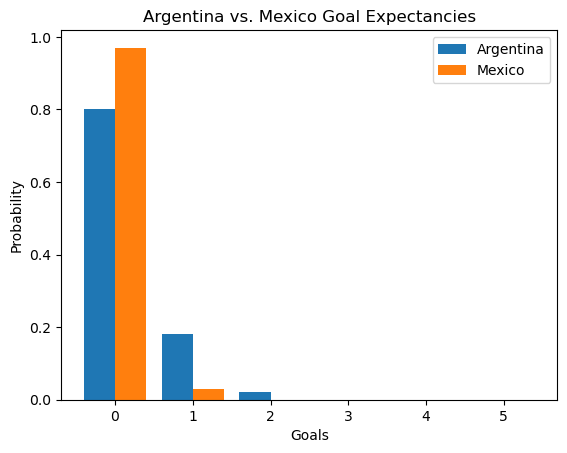

These are the score line probabilities:  [0.776, 0.024, 0.17459999999999998, 0.005399999999999999]


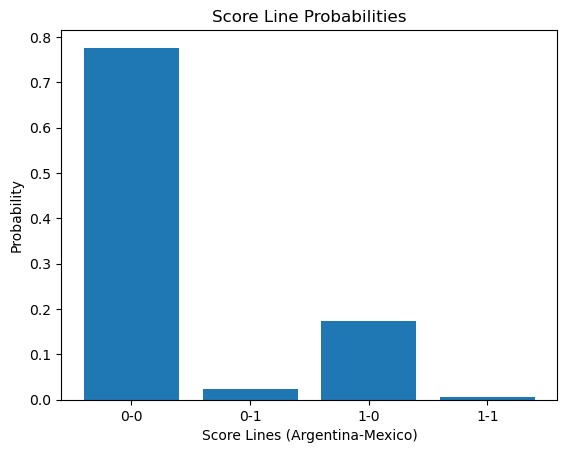

In [48]:
#Argentina xG
ArgentinaxG = (da['AS'][0]) * (da['DS'][16]) * leagueGF

#Mexico xG
MexicoxG = (da['AS'][16]) * (da['DS'][0]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Argentina probability mass function
Argentina_pmf = poisson.pmf(Goals, ArgentinaxG)
Argentina_pmf = np.round(Argentina_pmf, 2)
Argentina_pmf

#Mexico probability mass function
Mexico_pmf = poisson.pmf(Goals, MexicoxG)
Mexico_pmf = np.round(Mexico_pmf, 2)
Mexico_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Argentina_pmf, 0.4, label = 'Argentina')
plt.bar(X_axis + 0.2, Mexico_pmf, 0.4, label = 'Mexico')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Argentina vs. Mexico Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Argentina_pmf[0] * Mexico_pmf[0])
score_prob_lst.append(Argentina_pmf[0] * Mexico_pmf[1])
score_prob_lst.append(Argentina_pmf[1] * Mexico_pmf[0])
score_prob_lst.append(Argentina_pmf[1] * Mexico_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Argentina-Mexico)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [49]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, an Argentina win
# as a 1-0 score line is significantly large, Argentina wins

Argentina_wins = Argentina_wins + 1

## Argentina vs. Saudi Arabia

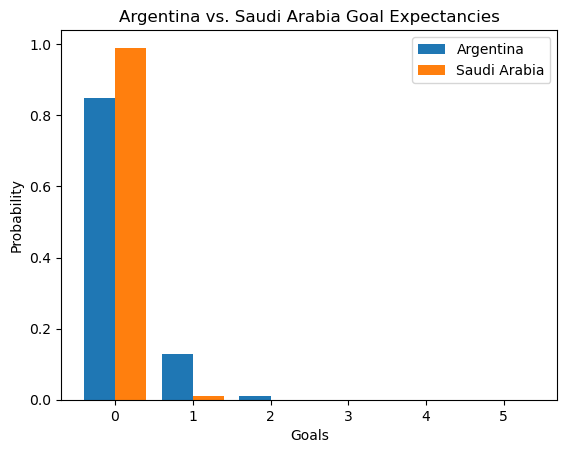

These are the score line probabilities:  [0.8415, 0.0085, 0.1287, 0.0013000000000000002]


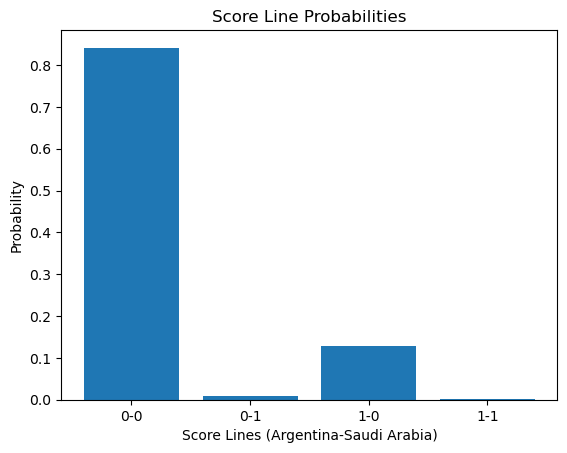

In [50]:
#Argentina xG
ArgentinaxG = (da['AS'][0]) * (da['DS'][22]) * leagueGF

#Saudi Arabia xG
SaudiArabiaxG = (da['AS'][22]) * (da['DS'][0]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Argentina probability mass function
Argentina_pmf = poisson.pmf(Goals, ArgentinaxG)
Argentina_pmf = np.round(Argentina_pmf, 2)
Argentina_pmf

#Saudi Arabia probability mass function
SaudiArabia_pmf = poisson.pmf(Goals, SaudiArabiaxG)
SaudiArabia_pmf = np.round(SaudiArabia_pmf, 2)
SaudiArabia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Argentina_pmf, 0.4, label = 'Argentina')
plt.bar(X_axis + 0.2, SaudiArabia_pmf, 0.4, label = 'Saudi Arabia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Argentina vs. Saudi Arabia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Argentina_pmf[0] * SaudiArabia_pmf[0])
score_prob_lst.append(Argentina_pmf[0] * SaudiArabia_pmf[1])
score_prob_lst.append(Argentina_pmf[1] * SaudiArabia_pmf[0])
score_prob_lst.append(Argentina_pmf[1] * SaudiArabia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Argentina-Saudi Arabia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [51]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, an Argentina win
# as a 1-0 score line is significantly large, Argentina wins

Argentina_wins = Argentina_wins + 1

## Mexico vs. Poland

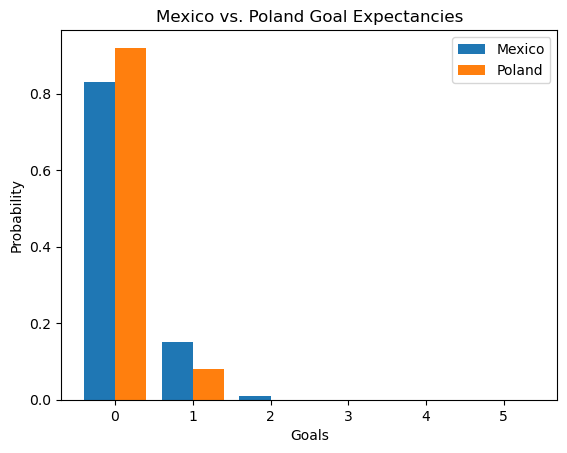

These are the score line probabilities:  [0.7636, 0.0664, 0.138, 0.012]


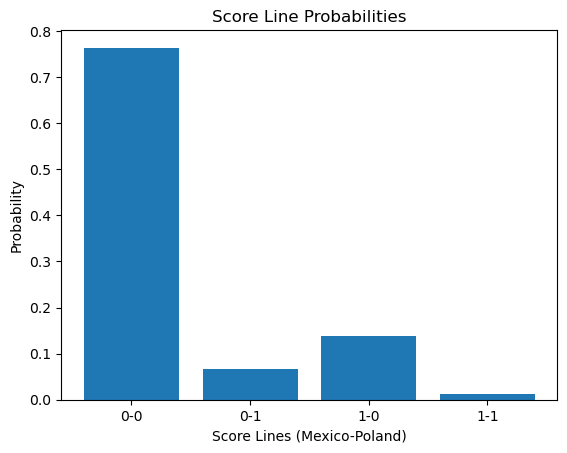

In [52]:
#Mexico xG
MexicoxG = (da['AS'][16]) * (da['DS'][19]) * leagueGF

#Poland xG
PolandxG = (da['AS'][19]) * (da['DS'][16]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Mexico probability mass function
Mexico_pmf = poisson.pmf(Goals, MexicoxG)
Mexico_pmf = np.round(Mexico_pmf, 2)
Mexico_pmf

#Poland probability mass function
Poland_pmf = poisson.pmf(Goals, PolandxG)
Poland_pmf = np.round(Poland_pmf, 2)
Poland_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Mexico_pmf, 0.4, label = 'Mexico')
plt.bar(X_axis + 0.2, Poland_pmf, 0.4, label = 'Poland')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Mexico vs. Poland Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Mexico_pmf[0] * Poland_pmf[0])
score_prob_lst.append(Mexico_pmf[0] * Poland_pmf[1])
score_prob_lst.append(Mexico_pmf[1] * Poland_pmf[0])
score_prob_lst.append(Mexico_pmf[1] * Poland_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Mexico-Poland)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [53]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Mexico win
# as a 1-0 score line is significantly large, Mexico wins

Mexico_wins = Mexico_wins + 1

## Mexico vs. Saudia Ariabia

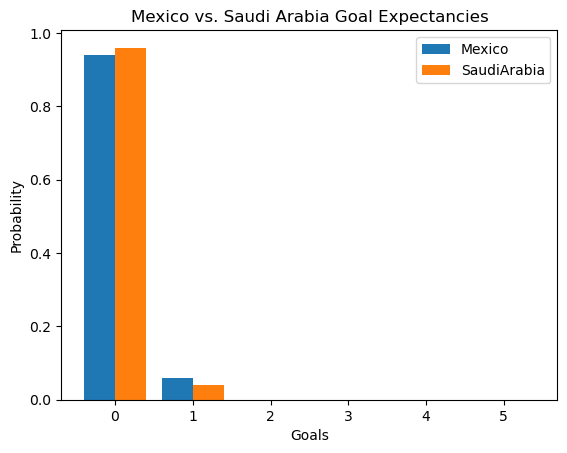

These are the score line probabilities:  [0.9023999999999999, 0.0376, 0.0576, 0.0024]


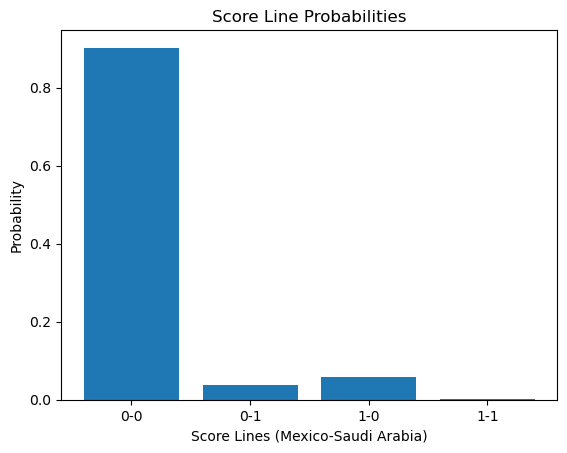

In [54]:
#Mexico xG
MexicoxG = (da['AS'][16]) * (da['DS'][22]) * leagueGF

#Saudi Arabia xG
SaudiArabiaxG = (da['AS'][22]) * (da['DS'][16]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Mexico probability mass function
Mexico_pmf = poisson.pmf(Goals, MexicoxG)
Mexico_pmf = np.round(Mexico_pmf, 2)
Mexico_pmf

#Saudi Arabia probability mass function
SaudiArabia_pmf = poisson.pmf(Goals, SaudiArabiaxG)
SaudiArabia_pmf = np.round(SaudiArabia_pmf, 2)
SaudiArabia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Mexico_pmf, 0.4, label = 'Mexico')
plt.bar(X_axis + 0.2, SaudiArabia_pmf, 0.4, label = 'SaudiArabia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Mexico vs. Saudi Arabia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Mexico_pmf[0] * SaudiArabia_pmf[0])
score_prob_lst.append(Mexico_pmf[0] * SaudiArabia_pmf[1])
score_prob_lst.append(Mexico_pmf[1] * SaudiArabia_pmf[0])
score_prob_lst.append(Mexico_pmf[1] * SaudiArabia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Mexico-Saudi Arabia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [55]:
# the most likely score line is 0-0, a draw
Mexico_draws = Mexico_draws + 1
SaudiArabia_draws = SaudiArabia_draws + 1

## Poland vs. Saudi Arabia

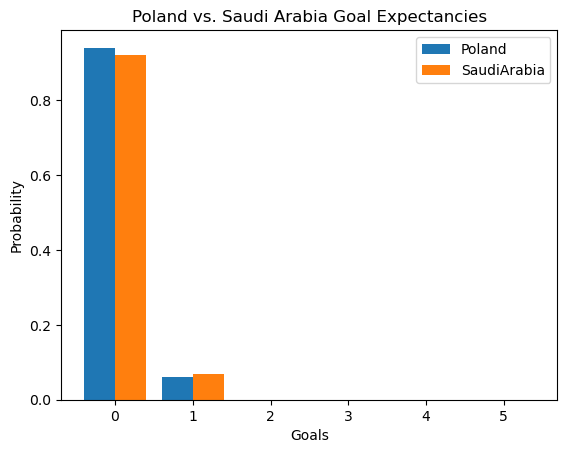

These are the score line probabilities:  [0.8648, 0.0658, 0.0552, 0.004200000000000001]


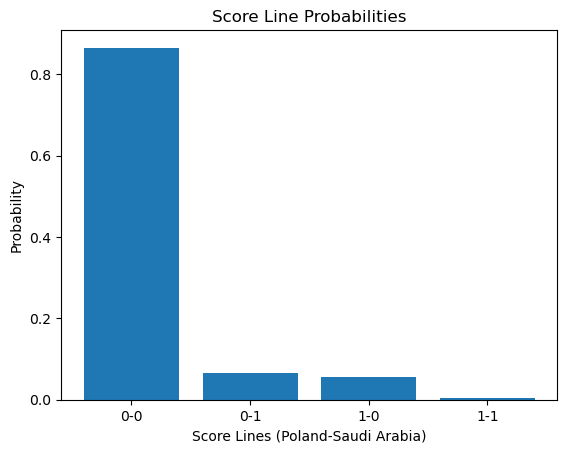

In [56]:
#Poland xG
PolandxG = (da['AS'][19]) * (da['DS'][22]) * leagueGF

#Saudi Arabia xG
SaudiArabiaxG = (da['AS'][22]) * (da['DS'][19]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Poland probability mass function
Poland_pmf = poisson.pmf(Goals, PolandxG)
Poland_pmf = np.round(Poland_pmf, 2)
Poland_pmf

#Saudi Arabia probability mass function
SaudiArabia_pmf = poisson.pmf(Goals, SaudiArabiaxG)
SaudiArabia_pmf = np.round(SaudiArabia_pmf, 2)
SaudiArabia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Poland_pmf, 0.4, label = 'Poland')
plt.bar(X_axis + 0.2, SaudiArabia_pmf, 0.4, label = 'SaudiArabia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Poland vs. Saudi Arabia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Poland_pmf[0] * SaudiArabia_pmf[0])
score_prob_lst.append(Poland_pmf[0] * SaudiArabia_pmf[1])
score_prob_lst.append(Poland_pmf[1] * SaudiArabia_pmf[0])
score_prob_lst.append(Poland_pmf[1] * SaudiArabia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Poland-Saudi Arabia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [57]:
# the most likely score line is 0-0, a draw
Mexico_draws = Mexico_draws + 1
Poland_draws = Poland_draws + 1

## Group C Advancement

In [58]:
print("Argentina wins: ", Argentina_wins)
print("Argentina draws: ", Argentina_draws)
print("Mexico wins: ", Mexico_wins)
print("Mexico draws: ", Mexico_draws)
print("Poland wins: ", Poland_wins)
print("Poland draws: ", Poland_draws)
print("Saudi Arabia wins: ", SaudiArabia_wins)
print("Saudi Arabia draws: ", SaudiArabia_draws)

Argentina wins:  3
Argentina draws:  0
Mexico wins:  1
Mexico draws:  2
Poland wins:  0
Poland draws:  1
Saudi Arabia wins:  0
Saudi Arabia draws:  1


Argentina advances as 1C, Mexico advances as 2C


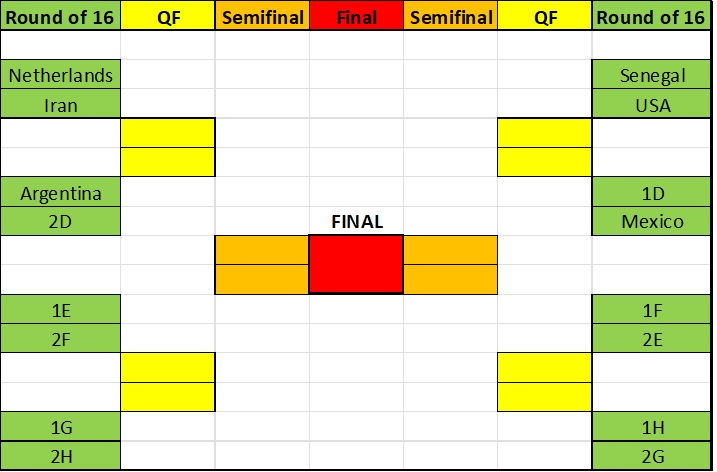

In [59]:
print('Argentina advances as 1C, Mexico advances as 2C')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%203.jpg')

# Group D Predictions

In [60]:
#creating variables to count wins and draws for points calculations
Australia_wins = 0
Australia_draws = 0
Denmark_wins = 0
Denmark_draws = 0
France_wins = 0
France_draws = 0
Tunisia_wins = 0
Tunisia_draws = 0

# Australia vs. Denmark

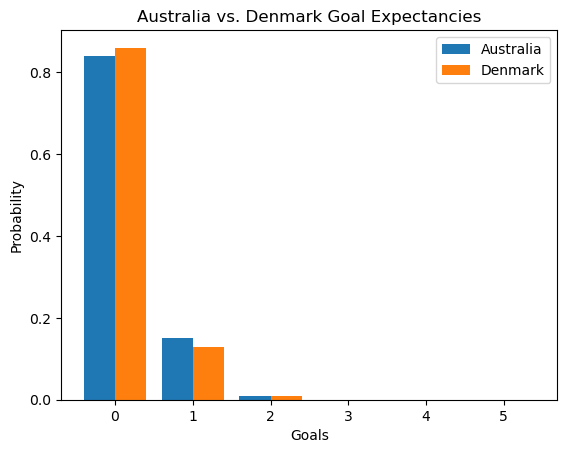

These are the score line probabilities:  [0.7223999999999999, 0.1092, 0.129, 0.0195]


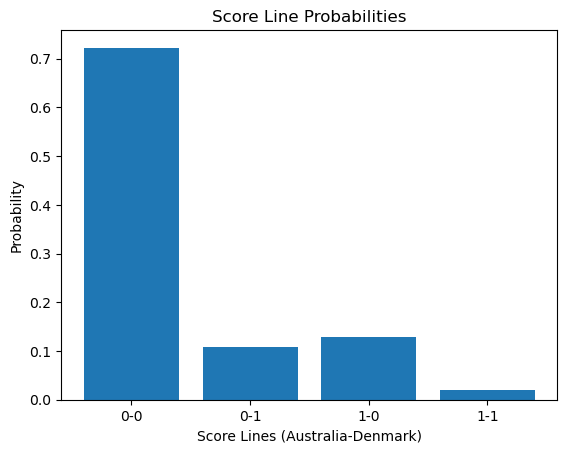

In [61]:
#Australia xG
AustraliaxG = (da['AS'][1]) * (da['DS'][8]) * leagueGF

#Denmark xG
DenmarkxG = (da['AS'][8]) * (da['DS'][1]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Australia probability mass function
Australia_pmf = poisson.pmf(Goals, AustraliaxG)
Australia_pmf = np.round(Australia_pmf, 2)
Australia_pmf

#Denmark probability mass function
Denmark_pmf = poisson.pmf(Goals, DenmarkxG)
Denmark_pmf = np.round(Denmark_pmf, 2)
Denmark_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Australia_pmf, 0.4, label = 'Australia')
plt.bar(X_axis + 0.2, Denmark_pmf, 0.4, label = 'Denmark')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Australia vs. Denmark Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Australia_pmf[0] * Denmark_pmf[0])
score_prob_lst.append(Australia_pmf[0] * Denmark_pmf[1])
score_prob_lst.append(Australia_pmf[1] * Denmark_pmf[0])
score_prob_lst.append(Australia_pmf[1] * Denmark_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Australia-Denmark)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [62]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Denmark win
# as a 1-0 score line is significantly large, Denmark wins

Denmark_wins = Denmark_wins + 1

# Australia vs. France

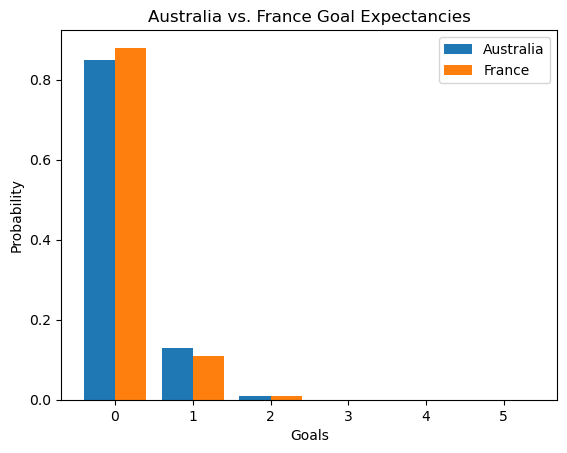

These are the score line probabilities:  [0.748, 0.0935, 0.1144, 0.0143]


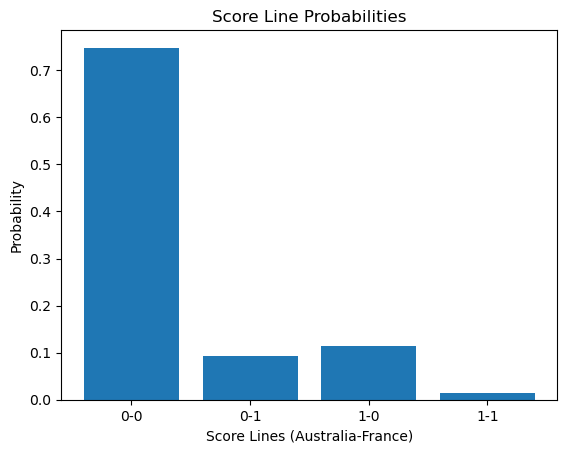

In [63]:
#Australia xG
AustraliaxG = (da['AS'][1]) * (da['DS'][11]) * leagueGF

#France xG
FrancexG = (da['AS'][11]) * (da['DS'][1]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Australia probability mass function
Australia_pmf = poisson.pmf(Goals, AustraliaxG)
Australia_pmf = np.round(Australia_pmf, 2)
Australia_pmf

#France probability mass function
France_pmf = poisson.pmf(Goals, FrancexG)
France_pmf = np.round(France_pmf, 2)
France_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Australia_pmf, 0.4, label = 'Australia')
plt.bar(X_axis + 0.2, France_pmf, 0.4, label = 'France')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Australia vs. France Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Australia_pmf[0] * France_pmf[0])
score_prob_lst.append(Australia_pmf[0] * France_pmf[1])
score_prob_lst.append(Australia_pmf[1] * France_pmf[0])
score_prob_lst.append(Australia_pmf[1] * France_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Australia-France)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [64]:
# the most likely score line is 0-0, a draw

Australia_draws = Australia_draws + 1
France_draws = France_draws + 1

# Australia vs. Tunisia

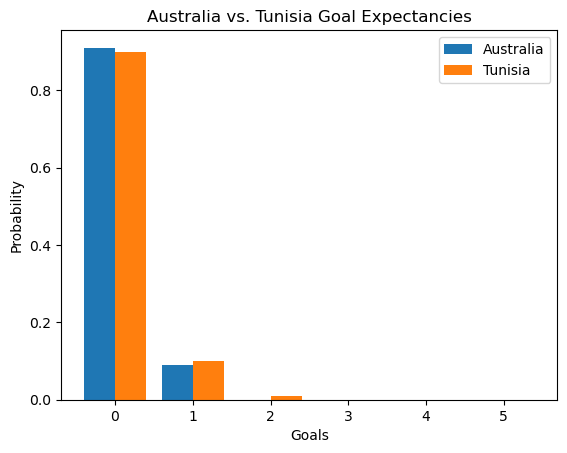

These are the score line probabilities:  [0.8190000000000001, 0.09100000000000001, 0.081, 0.009]


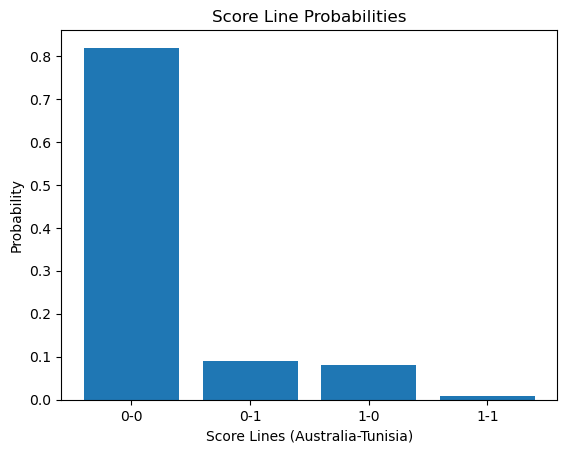

In [65]:
#Australia xG
AustraliaxG = (da['AS'][1]) * (da['DS'][28]) * leagueGF

#Tunisia xG
TunisiaxG = (da['AS'][28]) * (da['DS'][1]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Australia probability mass function
Australia_pmf = poisson.pmf(Goals, AustraliaxG)
Australia_pmf = np.round(Australia_pmf, 2)
Australia_pmf

#Tunisia probability mass function
Tunisia_pmf = poisson.pmf(Goals, TunisiaxG)
Tunisia_pmf = np.round(Tunisia_pmf, 2)
Tunisia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Australia_pmf, 0.4, label = 'Australia')
plt.bar(X_axis + 0.2, Tunisia_pmf, 0.4, label = 'Tunisia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Australia vs. Tunisia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Australia_pmf[0] * Tunisia_pmf[0])
score_prob_lst.append(Australia_pmf[0] * Tunisia_pmf[1])
score_prob_lst.append(Australia_pmf[1] * Tunisia_pmf[0])
score_prob_lst.append(Australia_pmf[1] * Tunisia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Australia-Tunisia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [66]:
# the most likely score line is 0-0, a draw

Australia_draws = Australia_draws + 1
Tunisia_draws = Tunisia_draws + 1

# Denmark vs. France

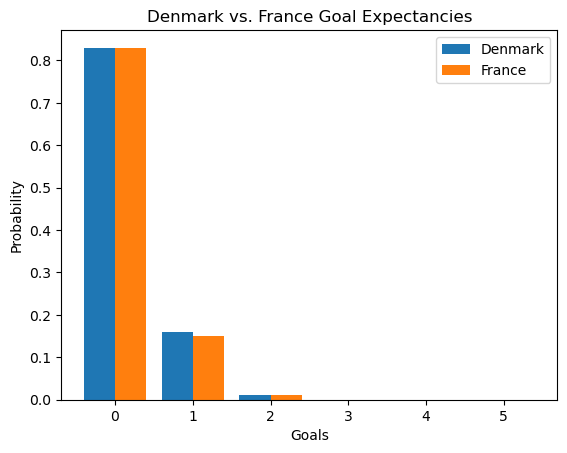

These are the score line probabilities:  [0.6889, 0.12449999999999999, 0.1328, 0.024]


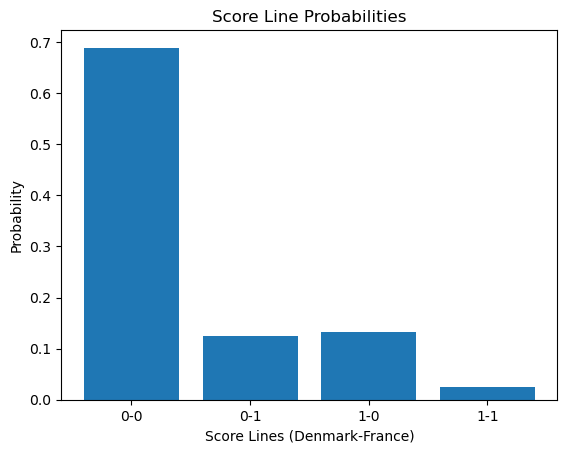

In [67]:
#Denmark xG
DenmarkxG = (da['AS'][8]) * (da['DS'][11]) * leagueGF

#France xG
FrancexG = (da['AS'][11]) * (da['DS'][8]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Denmark probability mass function
Denmark_pmf = poisson.pmf(Goals, DenmarkxG)
Denmark_pmf = np.round(Denmark_pmf, 2)
Denmark_pmf

#France probability mass function
France_pmf = poisson.pmf(Goals, FrancexG)
France_pmf = np.round(France_pmf, 2)
France_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Denmark_pmf, 0.4, label = 'Denmark')
plt.bar(X_axis + 0.2, France_pmf, 0.4, label = 'France')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Denmark vs. France Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Denmark_pmf[0] * France_pmf[0])
score_prob_lst.append(Denmark_pmf[0] * France_pmf[1])
score_prob_lst.append(Denmark_pmf[1] * France_pmf[0])
score_prob_lst.append(Denmark_pmf[1] * France_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Denmark-France)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [68]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Denmark win
# as a 1-0 score line is significantly large, Denmark wins

Denmark_wins = Denmark_wins + 1

# Denmark vs. Tunisia

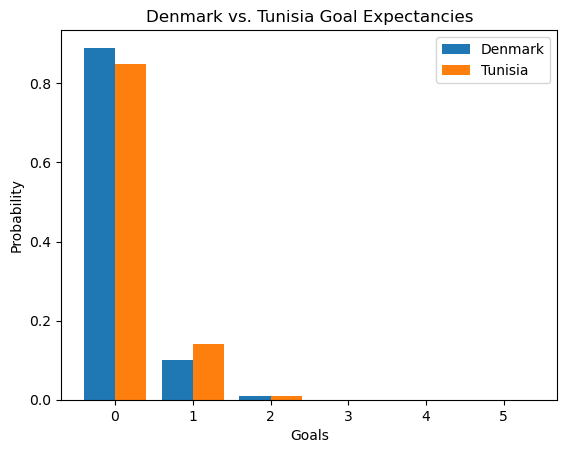

These are the score line probabilities:  [0.7565, 0.12460000000000002, 0.085, 0.014000000000000002]


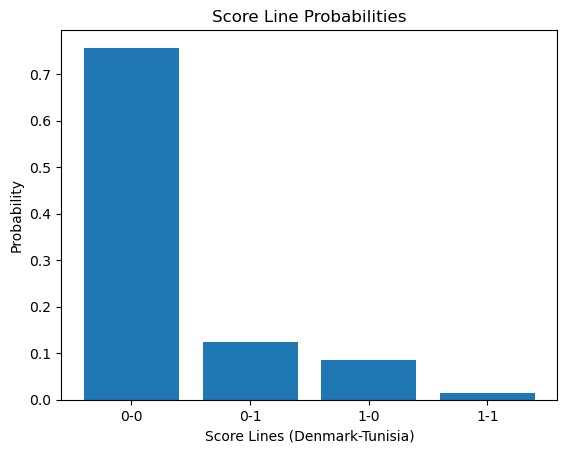

In [69]:
#Denmark xG
DenmarkxG = (da['AS'][8]) * (da['DS'][28]) * leagueGF

#Tunisia xG
TunisiaxG = (da['AS'][28]) * (da['DS'][8]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Denmark probability mass function
Denmark_pmf = poisson.pmf(Goals, DenmarkxG)
Denmark_pmf = np.round(Denmark_pmf, 2)
Denmark_pmf

#Tunisia probability mass function
Tunisia_pmf = poisson.pmf(Goals, TunisiaxG)
Tunisia_pmf = np.round(Tunisia_pmf, 2)
Tunisia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Denmark_pmf, 0.4, label = 'Denmark')
plt.bar(X_axis + 0.2, Tunisia_pmf, 0.4, label = 'Tunisia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Denmark vs. Tunisia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Denmark_pmf[0] * Tunisia_pmf[0])
score_prob_lst.append(Denmark_pmf[0] * Tunisia_pmf[1])
score_prob_lst.append(Denmark_pmf[1] * Tunisia_pmf[0])
score_prob_lst.append(Denmark_pmf[1] * Tunisia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Denmark-Tunisia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [70]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Tunisia win
# as a 1-0 score line is significantly large, Tunisia wins

Tunisia_wins = Tunisia_wins + 1

# France vs. Tunisia

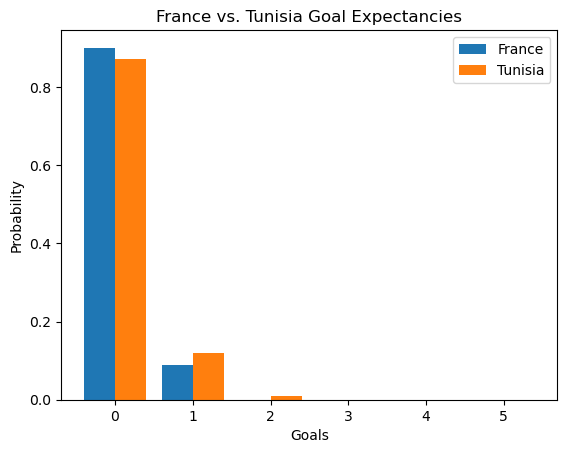

These are the score line probabilities:  [0.783, 0.108, 0.0783, 0.010799999999999999]


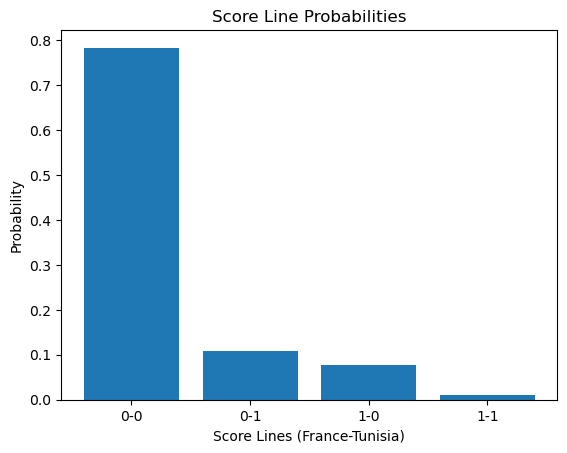

In [71]:
#France xG
FrancexG = (da['AS'][11]) * (da['DS'][28]) * leagueGF

#Tunisia xG
TunisiaxG = (da['AS'][28]) * (da['DS'][11]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#France probability mass function
France_pmf = poisson.pmf(Goals, FrancexG)
France_pmf = np.round(France_pmf, 2)
France_pmf

#Tunisia probability mass function
Tunisia_pmf = poisson.pmf(Goals, TunisiaxG)
Tunisia_pmf = np.round(Tunisia_pmf, 2)
Tunisia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, France_pmf, 0.4, label = 'France')
plt.bar(X_axis + 0.2, Tunisia_pmf, 0.4, label = 'Tunisia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("France vs. Tunisia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(France_pmf[0] * Tunisia_pmf[0])
score_prob_lst.append(France_pmf[0] * Tunisia_pmf[1])
score_prob_lst.append(France_pmf[1] * Tunisia_pmf[0])
score_prob_lst.append(France_pmf[1] * Tunisia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (France-Tunisia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [72]:
# the most likely score line is 0-0, a draw

France_draws = France_draws + 1
Tunisia_draws = Tunisia_draws + 1

## Group D Advancement

In [73]:
print("Australia wins: ", Australia_wins)
print("Australia draws: ", Australia_draws)
print("Denmark wins: ", Denmark_wins)
print("Denmark draws: ", Denmark_draws)
print("France wins: ", France_wins)
print("France draws: ", France_draws)
print("Tunisia wins: ", Tunisia_wins)
print("Tunisia draws: ", Tunisia_draws)

Australia wins:  0
Australia draws:  2
Denmark wins:  2
Denmark draws:  0
France wins:  0
France draws:  2
Tunisia wins:  1
Tunisia draws:  2


Denmark advances as 1D, Tunisia advances as 2D


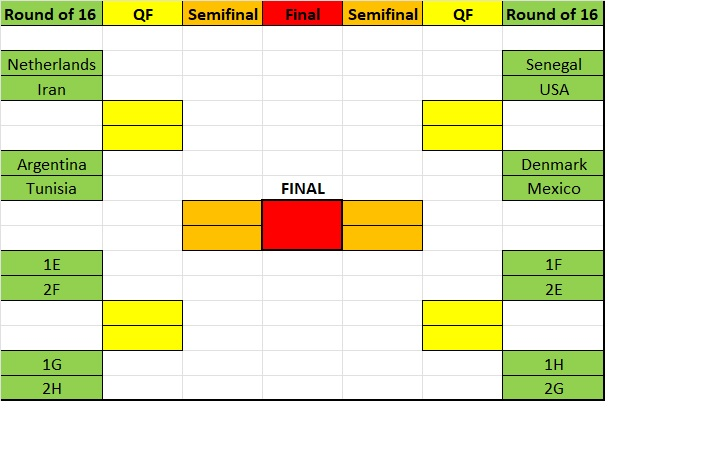

In [74]:
print('Denmark advances as 1D, Tunisia advances as 2D')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%204.jpg')

# Group E Predictions

In [75]:
#creating variables to count wins and draws for points calculations
CostaRica_wins = 0
CostaRica_draws = 0
Germany_wins = 0
Germany_draws = 0
Japan_wins = 0
Japan_draws = 0
Spain_wins = 0
Spain_draws = 0

## Costa Rica vs. Germany

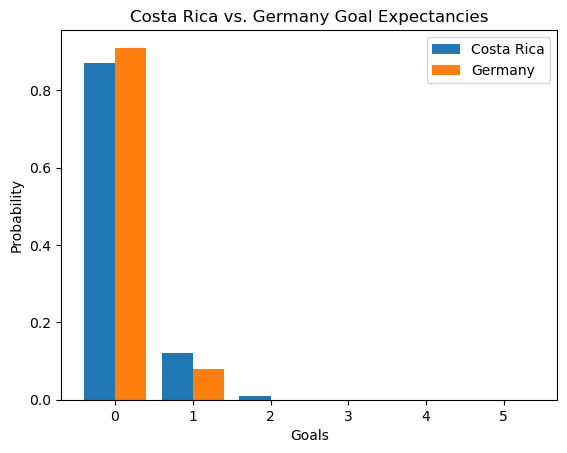

These are the score line probabilities:  [0.7917000000000001, 0.0696, 0.1092, 0.0096]


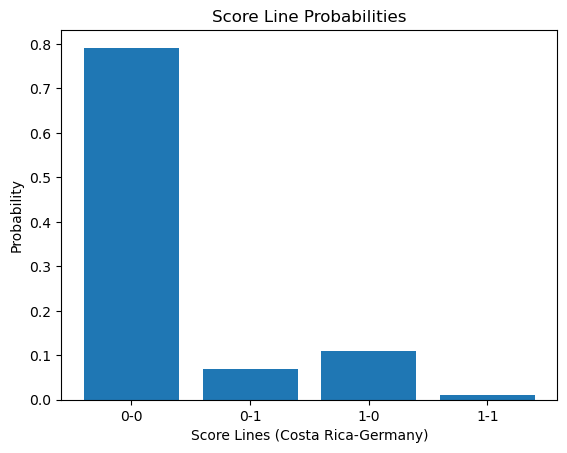

In [76]:
#Costa Rica xG
CostaRicaxG = (da['AS'][6]) * (da['DS'][12]) * leagueGF

#Germany xG
GermanyxG = (da['AS'][12]) * (da['DS'][6]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Costa Rica probability mass function
CostaRica_pmf = poisson.pmf(Goals, CostaRicaxG)
CostaRica_pmf = np.round(CostaRica_pmf, 2)
CostaRica_pmf

#Germany probability mass function
Germany_pmf = poisson.pmf(Goals, GermanyxG)
Germany_pmf = np.round(Germany_pmf, 2)
Germany_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, CostaRica_pmf, 0.4, label = 'Costa Rica')
plt.bar(X_axis + 0.2, Germany_pmf, 0.4, label = 'Germany')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Costa Rica vs. Germany Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(CostaRica_pmf[0] * Germany_pmf[0])
score_prob_lst.append(CostaRica_pmf[0] * Germany_pmf[1])
score_prob_lst.append(CostaRica_pmf[1] * Germany_pmf[0])
score_prob_lst.append(CostaRica_pmf[1] * Germany_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Costa Rica-Germany)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [77]:
# the most likely score line is 0-0, a draw

CostaRica_draws = CostaRica_draws + 1
Germany_draws = Germany_draws + 1

## Costa Rica vs. Japan

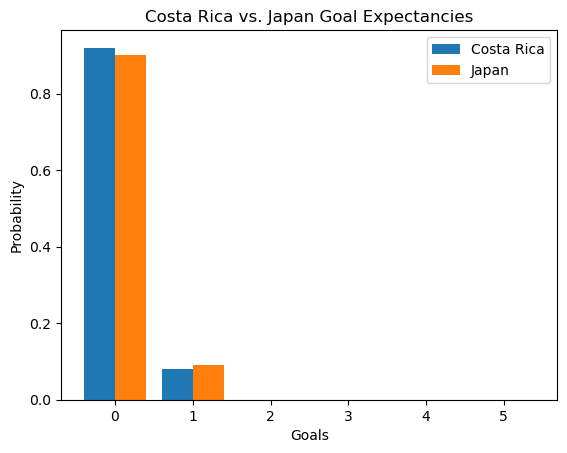

These are the score line probabilities:  [0.8280000000000001, 0.0828, 0.07200000000000001, 0.0072]


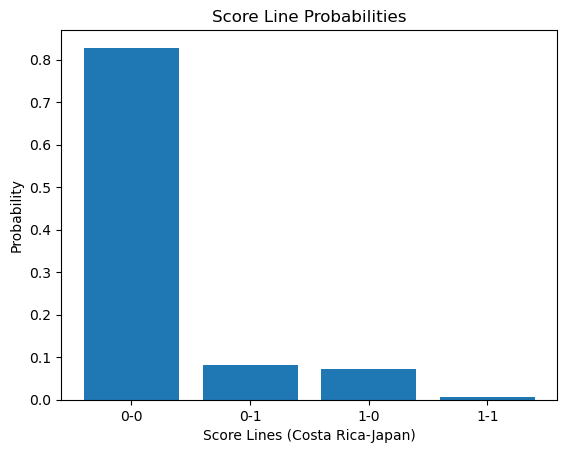

In [78]:
#Costa Rica xG
CostaRicaxG = (da['AS'][6]) * (da['DS'][15]) * leagueGF

#Japan xG
JapanxG = (da['AS'][15]) * (da['DS'][6]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Costa Rica probability mass function
CostaRica_pmf = poisson.pmf(Goals, CostaRicaxG)
CostaRica_pmf = np.round(CostaRica_pmf, 2)
CostaRica_pmf

#Japan probability mass function
Japan_pmf = poisson.pmf(Goals, JapanxG)
Japan_pmf = np.round(Japan_pmf, 2)
Japan_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, CostaRica_pmf, 0.4, label = 'Costa Rica')
plt.bar(X_axis + 0.2, Japan_pmf, 0.4, label = 'Japan')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Costa Rica vs. Japan Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(CostaRica_pmf[0] * Japan_pmf[0])
score_prob_lst.append(CostaRica_pmf[0] * Japan_pmf[1])
score_prob_lst.append(CostaRica_pmf[1] * Japan_pmf[0])
score_prob_lst.append(CostaRica_pmf[1] * Japan_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Costa Rica-Japan)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [79]:
# the most likely score line is 0-0, a draw

CostaRica_draws = CostaRica_draws + 1
Japan_draws = Japan_draws + 1

## Costa Rica vs. Spain

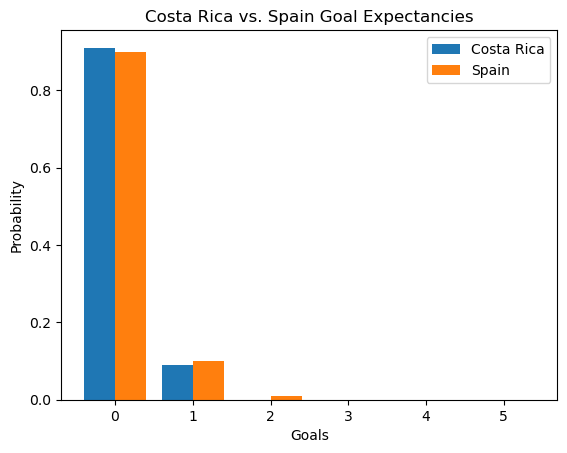

These are the score line probabilities:  [0.8190000000000001, 0.09100000000000001, 0.081, 0.009]


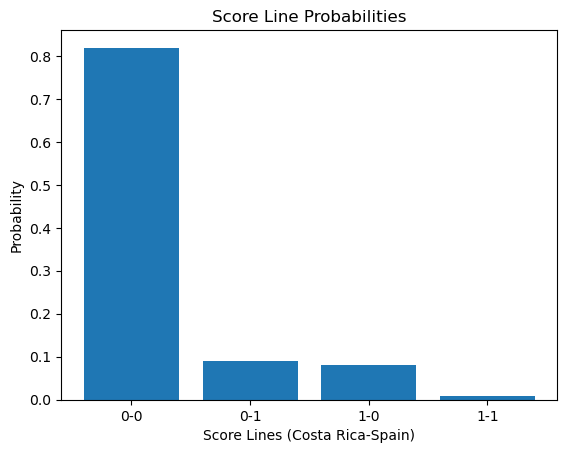

In [80]:
#Costa Rica xG
CostaRicaxG = (da['AS'][6]) * (da['DS'][26]) * leagueGF

#Spain xG
SpainxG = (da['AS'][26]) * (da['DS'][6]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Costa Rica probability mass function
CostaRica_pmf = poisson.pmf(Goals, CostaRicaxG)
CostaRica_pmf = np.round(CostaRica_pmf, 2)
CostaRica_pmf

#Spain probability mass function
Spain_pmf = poisson.pmf(Goals, SpainxG)
Spain_pmf = np.round(Spain_pmf, 2)
Spain_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, CostaRica_pmf, 0.4, label = 'Costa Rica')
plt.bar(X_axis + 0.2, Spain_pmf, 0.4, label = 'Spain')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Costa Rica vs. Spain Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(CostaRica_pmf[0] * Spain_pmf[0])
score_prob_lst.append(CostaRica_pmf[0] * Spain_pmf[1])
score_prob_lst.append(CostaRica_pmf[1] * Spain_pmf[0])
score_prob_lst.append(CostaRica_pmf[1] * Spain_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Costa Rica-Spain)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [81]:
# the most likely score line is 0-0, a draw

CostaRica_draws = CostaRica_draws + 1
Spain_draws = Spain_draws + 1

## Germany vs. Japan

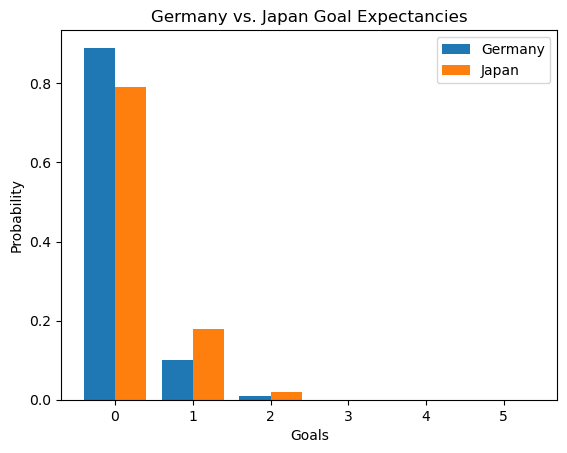

These are the score line probabilities:  [0.7031000000000001, 0.1602, 0.07900000000000001, 0.018]


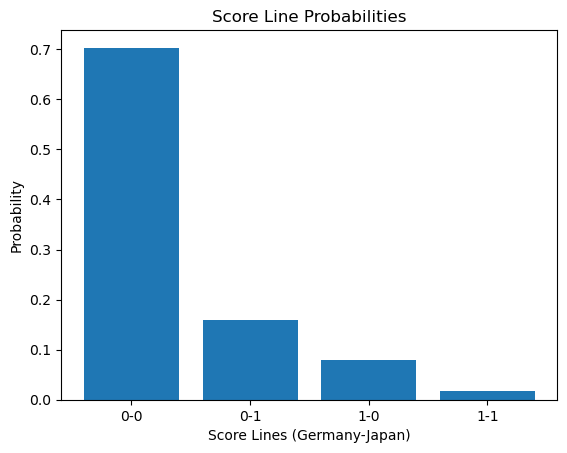

In [82]:
#Germany xG
GermanyxG = (da['AS'][12]) * (da['DS'][15]) * leagueGF

#Japan xG
JapanxG = (da['AS'][15]) * (da['DS'][12]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Germany probability mass function
Germany_pmf = poisson.pmf(Goals, GermanyxG)
Germany_pmf = np.round(Germany_pmf, 2)
Germany_pmf

#Japan probability mass function
Japan_pmf = poisson.pmf(Goals, JapanxG)
Japan_pmf = np.round(Japan_pmf, 2)
Japan_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Germany_pmf, 0.4, label = 'Germany')
plt.bar(X_axis + 0.2, Japan_pmf, 0.4, label = 'Japan')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Germany vs. Japan Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Germany_pmf[0] * Japan_pmf[0])
score_prob_lst.append(Germany_pmf[0] * Japan_pmf[1])
score_prob_lst.append(Germany_pmf[1] * Japan_pmf[0])
score_prob_lst.append(Germany_pmf[1] * Japan_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Germany-Japan)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [83]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Japan win
# as a 0-1 score line is significantly large, Japan wins

Japan_wins = Japan_wins + 1

## Germany vs. Spain

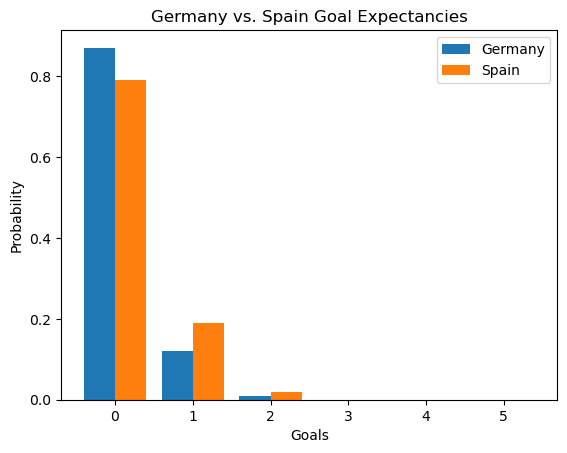

These are the score line probabilities:  [0.6873, 0.1653, 0.0948, 0.0228]


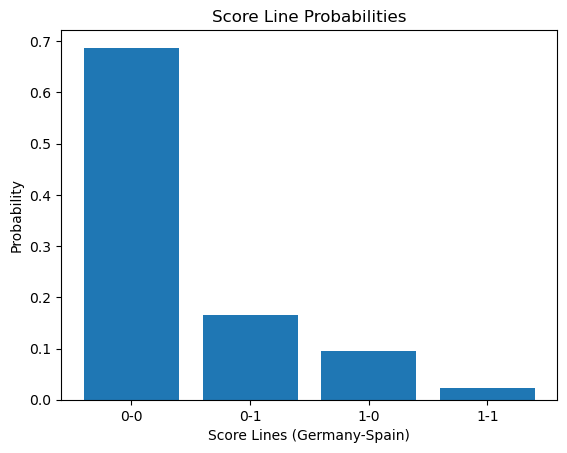

In [84]:
#Germany xG
GermanyxG = (da['AS'][12]) * (da['DS'][26]) * leagueGF

#Spain xG
SpainxG = (da['AS'][26]) * (da['DS'][12]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Germany probability mass function
Germany_pmf = poisson.pmf(Goals, GermanyxG)
Germany_pmf = np.round(Germany_pmf, 2)
Germany_pmf

#Spain probability mass function
Spain_pmf = poisson.pmf(Goals, SpainxG)
Spain_pmf = np.round(Spain_pmf, 2)
Spain_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Germany_pmf, 0.4, label = 'Germany')
plt.bar(X_axis + 0.2, Spain_pmf, 0.4, label = 'Spain')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Germany vs. Spain Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Germany_pmf[0] * Spain_pmf[0])
score_prob_lst.append(Germany_pmf[0] * Spain_pmf[1])
score_prob_lst.append(Germany_pmf[1] * Spain_pmf[0])
score_prob_lst.append(Germany_pmf[1] * Spain_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Germany-Spain)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [85]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Spain win
# as a 0-1 score line is significantly large, Spain wins

Spain_wins = Spain_wins + 1

## Japan vs. Spain

In [86]:
da.head(32)

Team    GF    GA    GP    GF_AVG    GA_AVG        AS        DS
0      Argentina  26.0   2.0   9.0  2.888889  0.222222  0.170877  0.024187
1      Australia  13.0   7.0   9.0  1.444444  0.777778  0.085438  0.084656
2        Belgium  16.0   9.0   8.0  2.000000  1.125000  0.118299  0.122449
3         Brazil  27.0   3.0   8.0  3.375000  0.375000  0.199630  0.040816
4       Cameroon  20.0  14.0  15.0  1.333333  0.933333  0.078866  0.101587
5         Canada  21.0   9.0  12.0  1.750000  0.750000  0.103512  0.081633
6     Costa Rica  14.0   6.0  12.0  1.166667  0.500000  0.069008  0.054422
7        Croatia  12.0   8.0   9.0  1.333333  0.888889  0.078866  0.096750
8        Denmark  14.0   9.0   8.0  1.750000  1.125000  0.103512  0.122449
9        Ecuador   6.0   6.0  10.0  0.600000  0.600000  0.035490  0.065306
10       England   9.0  11.0   8.0  1.125000  1.375000  0.066543  0.149660
11        France  12.0   8.0   8.0  1.500000  1.000000  0.088725  0.108844
12       Germany  15.0  10.0   9.0  1.666667  1.111111  0.098583  0.120937
13         Ghana  19.0  19.0  17.0  1.117647  1.117647  0.066109  0.121649
14          Iran   8.0   5.0   8.0  1.000000  0.625000  0.059150  0.068027
15         Japan  27.0   9.0  14.0  1.928571  0.642857  0.114074  0.069971
16        Mexico  20.0  12.0  17.0  1.176471  0.705882  0.069588  0.076831
17       Morocco  22.0  11.0  13.0  1.692308  0.846154  0.100100  0.092098
18   Netherlands  19.0   9.0   8.0  2.375000  1.125000  0.140481  0.122449
19        Poland  10.0  13.0   9.0  1.111111  1.444444  0.065722  0.157218
20      Portugal  20.0   4.0   9.0  2.222222  0.444444  0.131444  0.048375
21         Qatar  15.0  13.0  13.0  1.153846  1.000000  0.068250  0.108844
22  Saudi Arabia   7.0   7.0  14.0  0.500000  0.500000  0.029575  0.054422
23       Senegal  27.0  15.0  20.0  1.350000  0.750000  0.079852  0.081633
24        Serbia  20.0   8.0   8.0  2.500000  1.000000  0.147874  0.108844
25   South Korea  33.0  15.0  16.0  2.062500  0.937500  0.121996  0.102041
26         Spain  18.0   7.0   9.0  2.000000  0.777778  0.118299  0.084656
27   Switzerland   8.0  14.0   9.0  0.888889  1.555556  0.052578  0.169312
28       Tunisia  17.0   8.0  13.0  1.307692  0.615385  0.077350  0.066981
29       Uruguay  18.0   2.0   9.0  2.000000  0.222222  0.118299  0.024187
30           USA  18.0   8.0  12.0  1.500000  0.666667  0.088725  0.072562
31         Wales  10.0  13.0   9.0  1.111111  1.444444  0.065722  0.157218

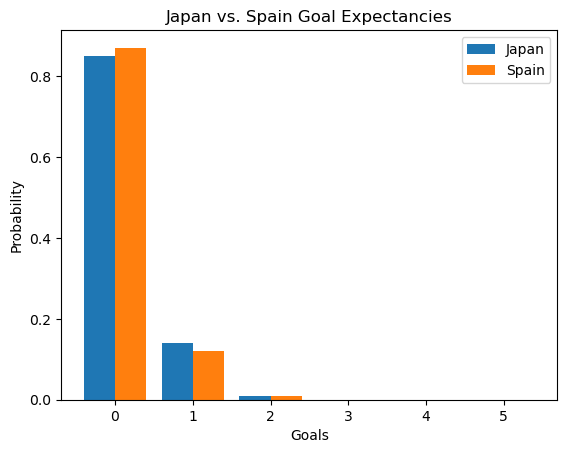

These are the score line probabilities:  [0.7394999999999999, 0.102, 0.1218, 0.016800000000000002]


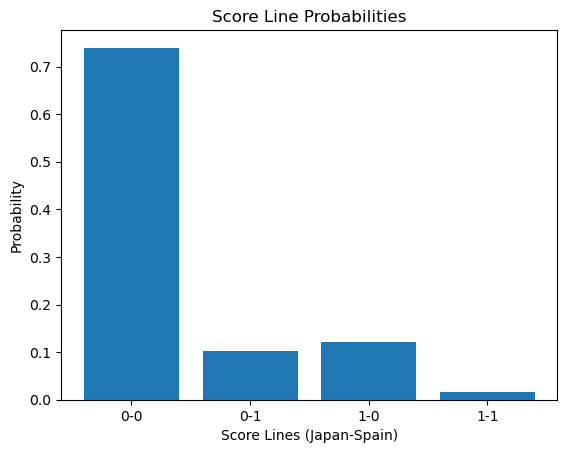

In [87]:
#Japan xG
JapanxG = (da['AS'][15]) * (da['DS'][26]) * leagueGF

#Spain xG
SpainxG = (da['AS'][26]) * (da['DS'][15]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Japan probability mass function
Japan_pmf = poisson.pmf(Goals, JapanxG)
Japan_pmf = np.round(Japan_pmf, 2)
Japan_pmf

#Spain probability mass function
Spain_pmf = poisson.pmf(Goals, SpainxG)
Spain_pmf = np.round(Spain_pmf, 2)
Spain_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Japan_pmf, 0.4, label = 'Japan')
plt.bar(X_axis + 0.2, Spain_pmf, 0.4, label = 'Spain')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Japan vs. Spain Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Japan_pmf[0] * Spain_pmf[0])
score_prob_lst.append(Japan_pmf[0] * Spain_pmf[1])
score_prob_lst.append(Japan_pmf[1] * Spain_pmf[0])
score_prob_lst.append(Japan_pmf[1] * Spain_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Japan-Spain)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [88]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Japan win
# as a 1-0 score line is significantly large, Japan wins

Japan_wins = Japan_wins + 1

## Group E Advancement

In [89]:
print("Costa Rica wins: ", CostaRica_wins)
print("Costa Rica draws: ", CostaRica_draws)
print("Germany wins: ", Germany_wins)
print("Germany draws: ", Germany_draws)
print("Japan wins: ", Japan_wins)
print("Japan draws: ", Japan_draws)
print("Spain wins: ", Spain_wins)
print("Spain draws: ", Spain_draws)

Costa Rica wins:  0
Costa Rica draws:  3
Germany wins:  0
Germany draws:  1
Japan wins:  2
Japan draws:  1
Spain wins:  1
Spain draws:  1


Japan advances as 1E, Spain advances as 2E


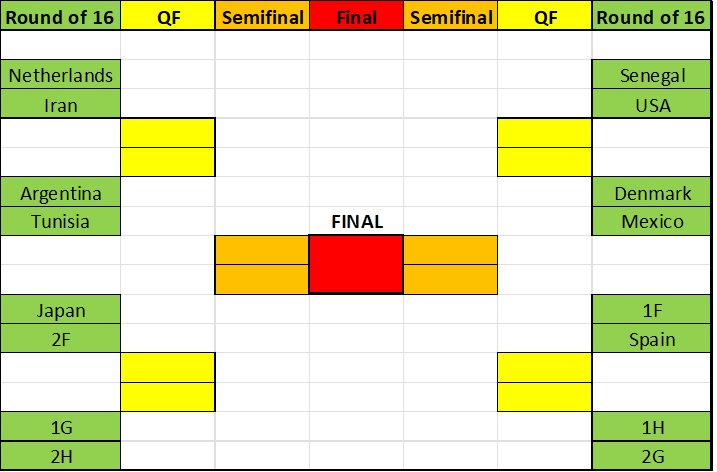

In [90]:
print('Japan advances as 1E, Spain advances as 2E')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%205.jpg')

## Group F Predictions

In [91]:
#creating variables to count wins and draws for points calculations
Belgium_wins = 0
Belgium_draws = 0
Canada_wins = 0
Canada_draws = 0
Croatia_wins = 0
Croatia_draws = 0
Morocco_wins = 0
Morocco_draws = 0

## Belgium vs. Canada

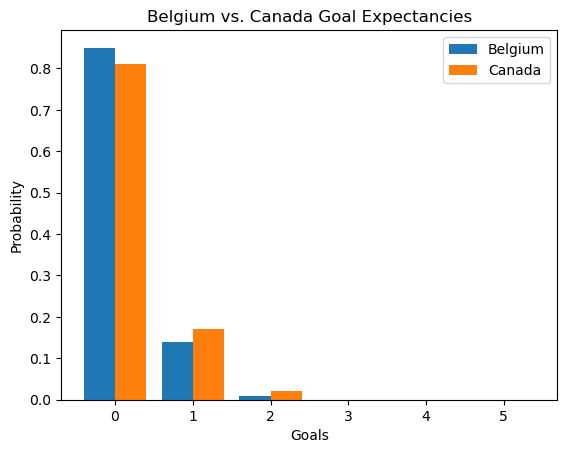

These are the score line probabilities:  [0.6885, 0.14450000000000002, 0.11340000000000001, 0.023800000000000005]


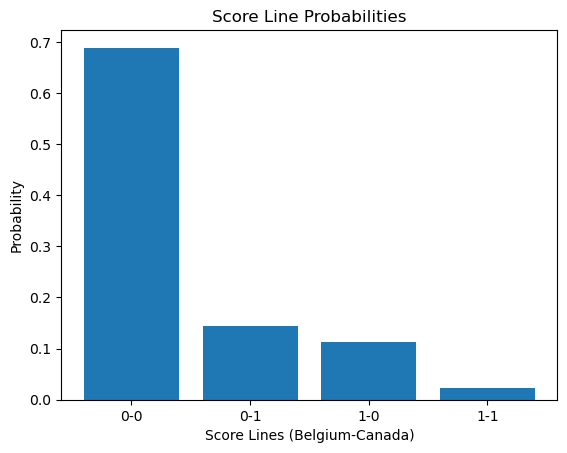

In [92]:
#Belgium xG
BelgiumxG = (da['AS'][2]) * (da['DS'][5]) * leagueGF

#Canada xG
CanadaxG = (da['AS'][5]) * (da['DS'][2]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Belgium probability mass function
Belgium_pmf = poisson.pmf(Goals, BelgiumxG)
Belgium_pmf = np.round(Belgium_pmf, 2)
Belgium_pmf

#Canada probability mass function
Canada_pmf = poisson.pmf(Goals, CanadaxG)
Canada_pmf = np.round(Canada_pmf, 2)
Canada_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Belgium_pmf, 0.4, label = 'Belgium')
plt.bar(X_axis + 0.2, Canada_pmf, 0.4, label = 'Canada')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Belgium vs. Canada Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Belgium_pmf[0] * Canada_pmf[0])
score_prob_lst.append(Belgium_pmf[0] * Canada_pmf[1])
score_prob_lst.append(Belgium_pmf[1] * Canada_pmf[0])
score_prob_lst.append(Belgium_pmf[1] * Canada_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Belgium-Canada)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [93]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Canada win
# as a 0-1 score line is significantly large, Canada wins

Canada_wins = Canada_wins + 1

## Belgium vs. Croatia

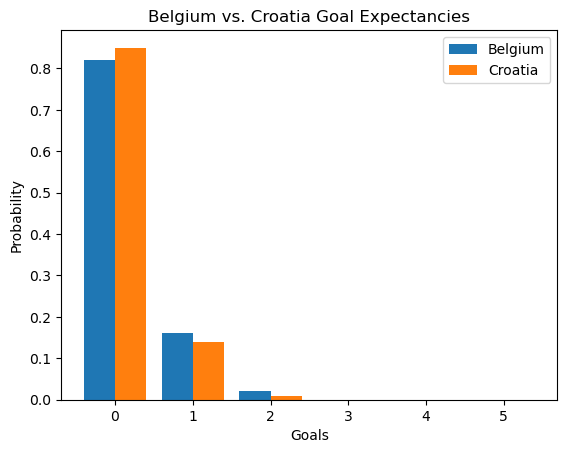

These are the score line probabilities:  [0.697, 0.1148, 0.136, 0.022400000000000003]


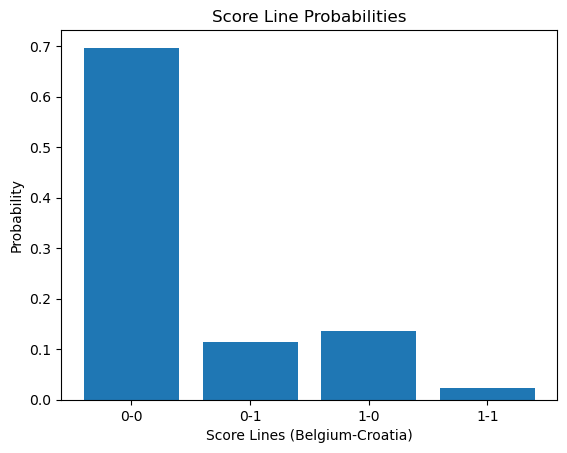

In [94]:
#Belgium xG
BelgiumxG = (da['AS'][2]) * (da['DS'][7]) * leagueGF

#Croatia xG
CroatiaxG = (da['AS'][7]) * (da['DS'][2]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Belgium probability mass function
Belgium_pmf = poisson.pmf(Goals, BelgiumxG)
Belgium_pmf = np.round(Belgium_pmf, 2)
Belgium_pmf

#Croatia probability mass function
Croatia_pmf = poisson.pmf(Goals, CroatiaxG)
Croatia_pmf = np.round(Croatia_pmf, 2)
Croatia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Belgium_pmf, 0.4, label = 'Belgium')
plt.bar(X_axis + 0.2, Croatia_pmf, 0.4, label = 'Croatia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Belgium vs. Croatia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Belgium_pmf[0] * Croatia_pmf[0])
score_prob_lst.append(Belgium_pmf[0] * Croatia_pmf[1])
score_prob_lst.append(Belgium_pmf[1] * Croatia_pmf[0])
score_prob_lst.append(Belgium_pmf[1] * Croatia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Belgium-Croatia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [95]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Croatia win
# as a 1-0 score line is significantly large, Croatia wins

Croatia_wins = Croatia_wins + 1

## Belgium vs. Morocco

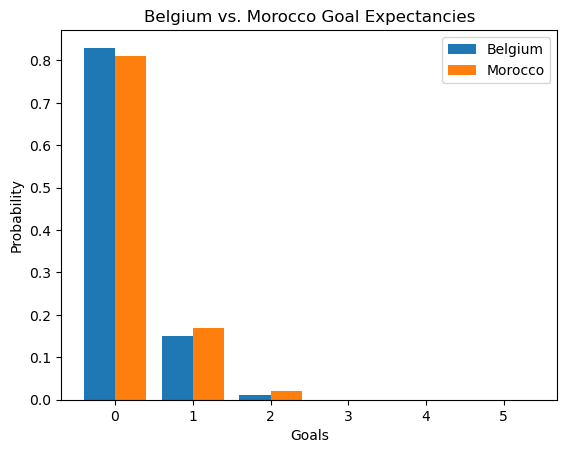

These are the score line probabilities:  [0.6723, 0.1411, 0.1215, 0.025500000000000002]


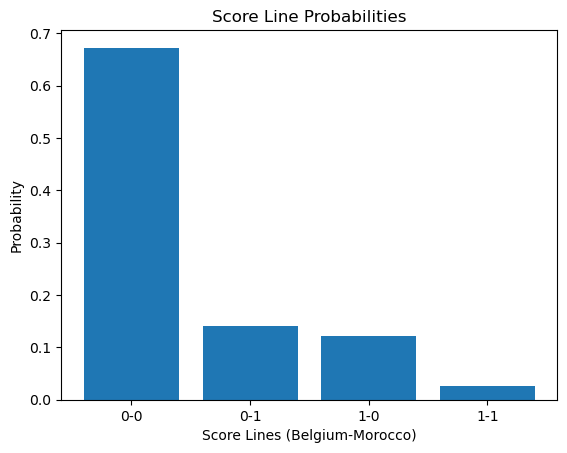

In [96]:
#Belgium xG
BelgiumxG = (da['AS'][2]) * (da['DS'][17]) * leagueGF

#Morocco xG
MoroccoxG = (da['AS'][17]) * (da['DS'][2]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Belgium probability mass function
Belgium_pmf = poisson.pmf(Goals, BelgiumxG)
Belgium_pmf = np.round(Belgium_pmf, 2)
Belgium_pmf

#Morocco probability mass function
Morocco_pmf = poisson.pmf(Goals, MoroccoxG)
Morocco_pmf = np.round(Morocco_pmf, 2)
Morocco_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Belgium_pmf, 0.4, label = 'Belgium')
plt.bar(X_axis + 0.2, Morocco_pmf, 0.4, label = 'Morocco')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Belgium vs. Morocco Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Belgium_pmf[0] * Morocco_pmf[0])
score_prob_lst.append(Belgium_pmf[0] * Morocco_pmf[1])
score_prob_lst.append(Belgium_pmf[1] * Morocco_pmf[0])
score_prob_lst.append(Belgium_pmf[1] * Morocco_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Belgium-Morocco)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [97]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Morocco win
# as a 0-1 score line is significantly large, Morocco wins

Morocco_wins = Morocco_wins + 1

## Canada vs. Croatia

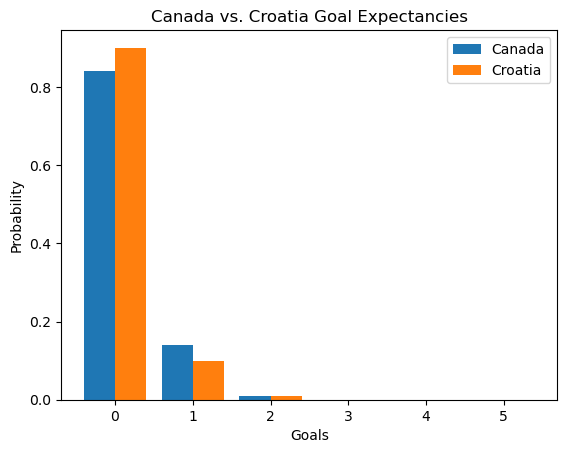

These are the score line probabilities:  [0.756, 0.084, 0.12600000000000003, 0.014000000000000002]


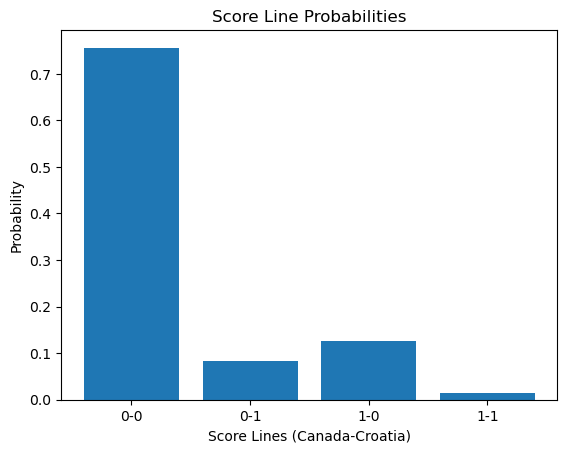

In [98]:
#Canada xG
CanadaxG = (da['AS'][5]) * (da['DS'][7]) * leagueGF

#Croatia xG
CroatiaxG = (da['AS'][7]) * (da['DS'][5]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Canada probability mass function
Canada_pmf = poisson.pmf(Goals, CanadaxG)
Canada_pmf = np.round(Canada_pmf, 2)
Canada_pmf

#Croatia probability mass function
Croatia_pmf = poisson.pmf(Goals, CroatiaxG)
Croatia_pmf = np.round(Croatia_pmf, 2)
Croatia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Canada_pmf, 0.4, label = 'Canada')
plt.bar(X_axis + 0.2, Croatia_pmf, 0.4, label = 'Croatia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Canada vs. Croatia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Canada_pmf[0] * Croatia_pmf[0])
score_prob_lst.append(Canada_pmf[0] * Croatia_pmf[1])
score_prob_lst.append(Canada_pmf[1] * Croatia_pmf[0])
score_prob_lst.append(Canada_pmf[1] * Croatia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Canada-Croatia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [99]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Canada win
# as a 1-0 score line is significantly large, Canada wins

Canada_wins = Canada_wins + 1

## Canada vs. Morocco

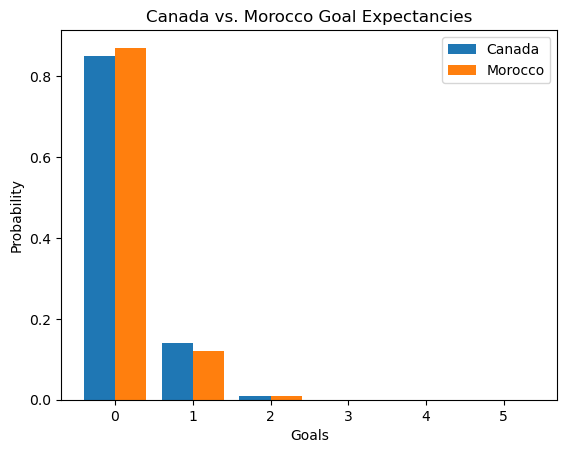

These are the score line probabilities:  [0.7394999999999999, 0.102, 0.1218, 0.016800000000000002]


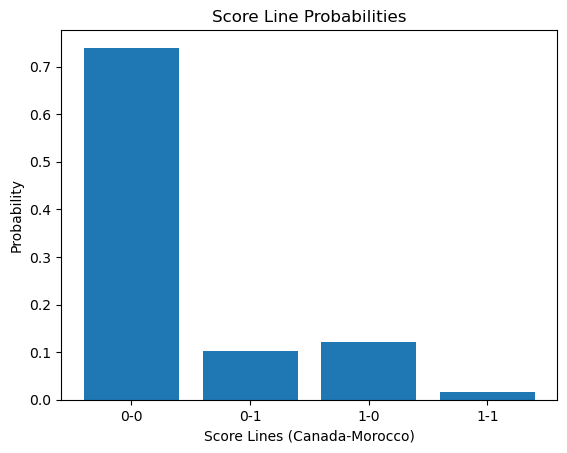

In [100]:
#Canada xG
CanadaxG = (da['AS'][5]) * (da['DS'][17]) * leagueGF

#Morocco xG
MoroccoxG = (da['AS'][17]) * (da['DS'][5]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Canada probability mass function
Canada_pmf = poisson.pmf(Goals, CanadaxG)
Canada_pmf = np.round(Canada_pmf, 2)
Canada_pmf

#Morocco probability mass function
Morocco_pmf = poisson.pmf(Goals, MoroccoxG)
Morocco_pmf = np.round(Morocco_pmf, 2)
Morocco_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Canada_pmf, 0.4, label = 'Canada')
plt.bar(X_axis + 0.2, Morocco_pmf, 0.4, label = 'Morocco')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Canada vs. Morocco Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Canada_pmf[0] * Morocco_pmf[0])
score_prob_lst.append(Canada_pmf[0] * Morocco_pmf[1])
score_prob_lst.append(Canada_pmf[1] * Morocco_pmf[0])
score_prob_lst.append(Canada_pmf[1] * Morocco_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Canada-Morocco)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [101]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Canada win
# as a 1-0 score line is significantly large, Canada wins

Canada_wins = Canada_wins + 1

## Croatia vs. Morocco

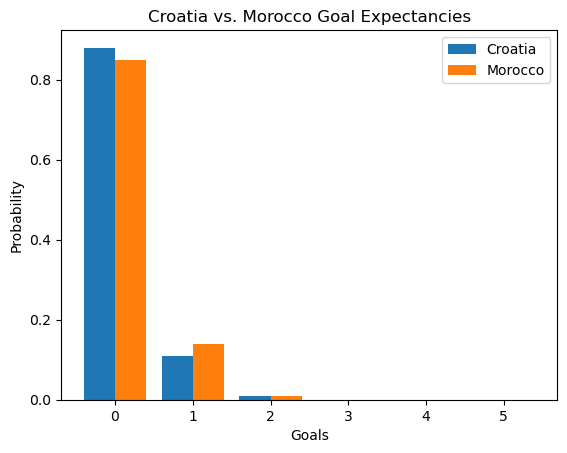

These are the score line probabilities:  [0.748, 0.12320000000000002, 0.0935, 0.015400000000000002]


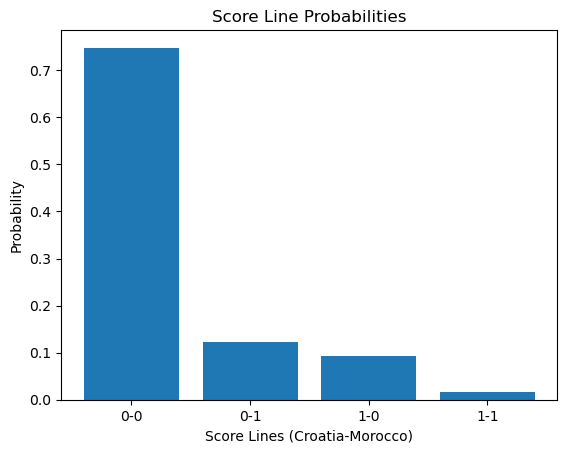

In [102]:
#Croatia xG
CroatiaxG = (da['AS'][7]) * (da['DS'][17]) * leagueGF

#Morocco xG
MoroccoxG = (da['AS'][17]) * (da['DS'][7]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Croatia probability mass function
Croatia_pmf = poisson.pmf(Goals, CroatiaxG)
Croatia_pmf = np.round(Croatia_pmf, 2)
Croatia_pmf

#Morocco probability mass function
Morocco_pmf = poisson.pmf(Goals, MoroccoxG)
Morocco_pmf = np.round(Morocco_pmf, 2)
Morocco_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Croatia_pmf, 0.4, label = 'Croatia')
plt.bar(X_axis + 0.2, Morocco_pmf, 0.4, label = 'Morocco')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Croatia vs. Morocco Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Croatia_pmf[0] * Morocco_pmf[0])
score_prob_lst.append(Croatia_pmf[0] * Morocco_pmf[1])
score_prob_lst.append(Croatia_pmf[1] * Morocco_pmf[0])
score_prob_lst.append(Croatia_pmf[1] * Morocco_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Croatia-Morocco)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [103]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Morocco win
# as a 0-1 score line is significantly large, Morocco wins

Morocco_wins = Morocco_wins + 1

## Group F Advancement

In [104]:
print("Belgium wins: ", Belgium_wins)
print("Belgium draws: ", Belgium_draws)
print("Canada wins: ", Canada_wins)
print("Canada draws: ", Canada_draws)
print("Croatia wins: ", Croatia_wins)
print("Croatia draws: ", Croatia_draws)
print("Morocco wins: ", Morocco_wins)
print("Morocco draws: ", Morocco_draws)

Belgium wins:  0
Belgium draws:  0
Canada wins:  3
Canada draws:  0
Croatia wins:  1
Croatia draws:  0
Morocco wins:  2
Morocco draws:  0


Canada advances as 1F, Morocco advances as 2F


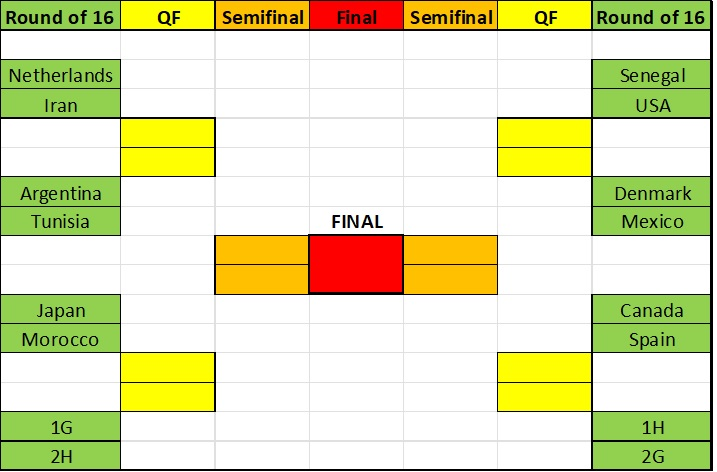

In [105]:
print('Canada advances as 1F, Morocco advances as 2F')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%206.jpg')

## Group G Predictions

In [106]:
#creating variables to count wins and draws for points calculations
Brazil_wins = 0
Brazil_draws = 0
Cameroon_wins = 0
Cameroon_draws = 0
Serbia_wins = 0
Serbia_draws = 0
Switzerland_wins = 0
Switzerland_draws = 0

## Brazil vs. Cameroon

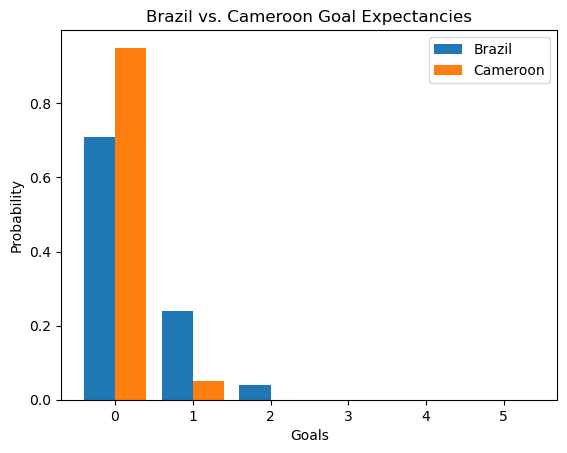

These are the score line probabilities:  [0.6745, 0.0355, 0.22799999999999998, 0.012]


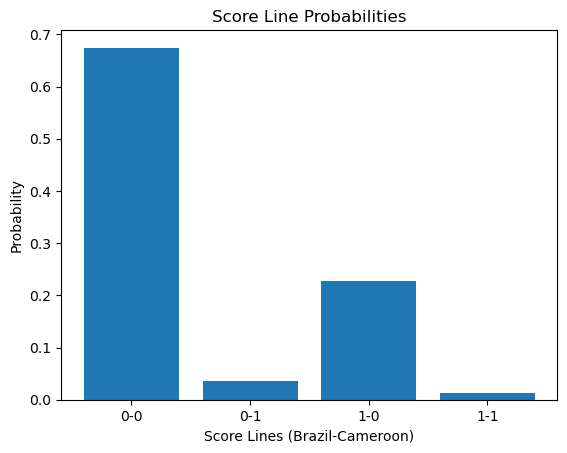

In [107]:
#Brazil xG
BrazilxG = (da['AS'][3]) * (da['DS'][4]) * leagueGF

#Cameroon xG
CameroonxG = (da['AS'][4]) * (da['DS'][3]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Brazil probability mass function
Brazil_pmf = poisson.pmf(Goals, BrazilxG)
Brazil_pmf = np.round(Brazil_pmf, 2)
Brazil_pmf

#Cameroon probability mass function
Cameroon_pmf = poisson.pmf(Goals, CameroonxG)
Cameroon_pmf = np.round(Cameroon_pmf, 2)
Cameroon_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Brazil_pmf, 0.4, label = 'Brazil')
plt.bar(X_axis + 0.2, Cameroon_pmf, 0.4, label = 'Cameroon')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Brazil vs. Cameroon Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Brazil_pmf[0] * Cameroon_pmf[0])
score_prob_lst.append(Brazil_pmf[0] * Cameroon_pmf[1])
score_prob_lst.append(Brazil_pmf[1] * Cameroon_pmf[0])
score_prob_lst.append(Brazil_pmf[1] * Cameroon_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Brazil-Cameroon)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [108]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Brazil win
# as a 0-1 score line is significantly large, Brazil wins

Brazil_wins = Brazil_wins + 1

## Brazil vs. Serbia

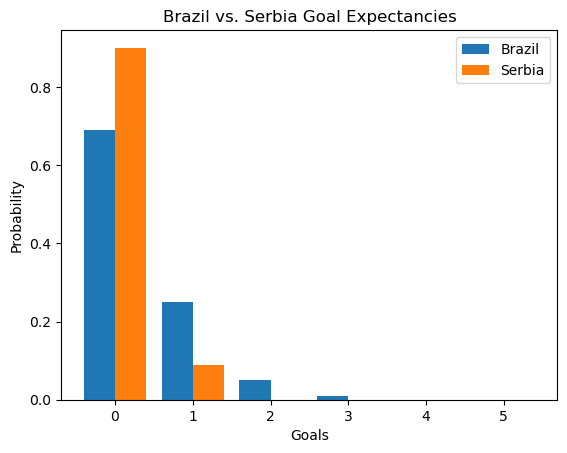

These are the score line probabilities:  [0.621, 0.062099999999999995, 0.225, 0.0225]


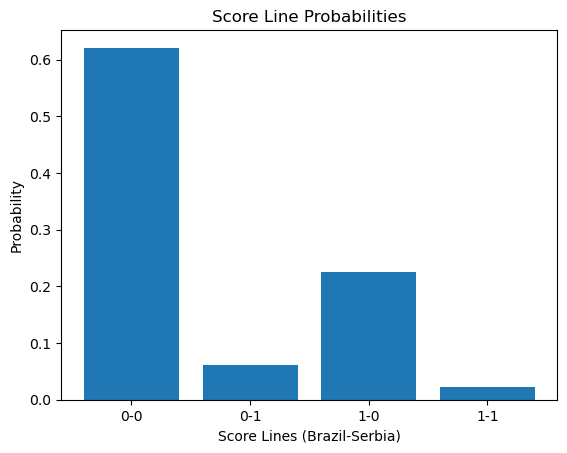

In [109]:
#Brazil xG
BrazilxG = (da['AS'][3]) * (da['DS'][24]) * leagueGF

#Serbia xG
SerbiaxG = (da['AS'][24]) * (da['DS'][3]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Brazil probability mass function
Brazil_pmf = poisson.pmf(Goals, BrazilxG)
Brazil_pmf = np.round(Brazil_pmf, 2)
Brazil_pmf

#Serbia probability mass function
Serbia_pmf = poisson.pmf(Goals, SerbiaxG)
Serbia_pmf = np.round(Serbia_pmf, 2)
Serbia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Brazil_pmf, 0.4, label = 'Brazil')
plt.bar(X_axis + 0.2, Serbia_pmf, 0.4, label = 'Serbia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Brazil vs. Serbia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Brazil_pmf[0] * Serbia_pmf[0])
score_prob_lst.append(Brazil_pmf[0] * Serbia_pmf[1])
score_prob_lst.append(Brazil_pmf[1] * Serbia_pmf[0])
score_prob_lst.append(Brazil_pmf[1] * Serbia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Brazil-Serbia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [110]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a BraZil win
# as a 0-1 score line is significantly large, Brazil wins

Brazil_wins = Brazil_wins + 1

## Brazil vs. Switzerland

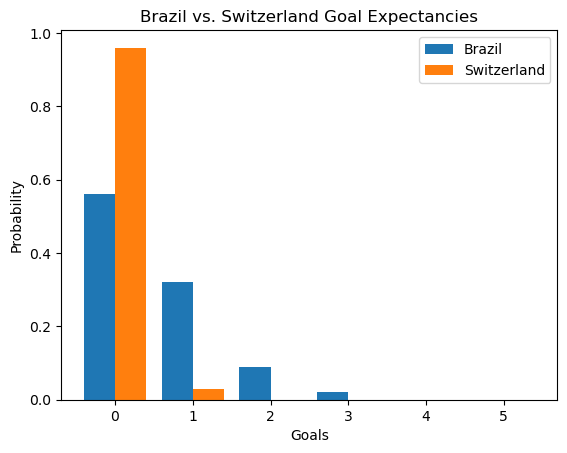

These are the score line probabilities:  [0.5376000000000001, 0.016800000000000002, 0.3072, 0.0096]


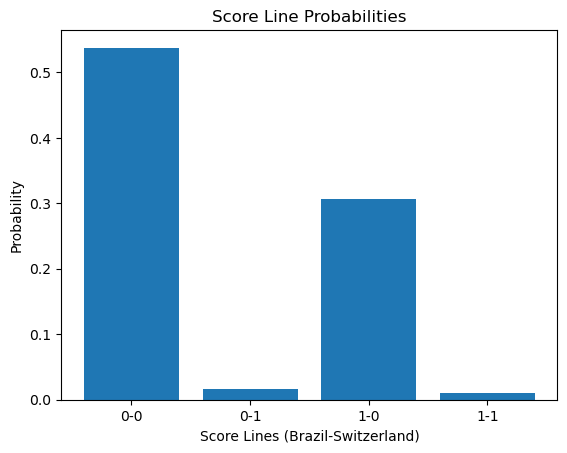

In [111]:
#Brazil xG
BrazilxG = (da['AS'][3]) * (da['DS'][27]) * leagueGF

#Switzerland xG
SwitzerlandxG = (da['AS'][27]) * (da['DS'][3]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Brazil probability mass function
Brazil_pmf = poisson.pmf(Goals, BrazilxG)
Brazil_pmf = np.round(Brazil_pmf, 2)
Brazil_pmf

#Serbia probability mass function
Switzerland_pmf = poisson.pmf(Goals, SwitzerlandxG)
Switzerland_pmf = np.round(Switzerland_pmf, 2)
Switzerland_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Brazil_pmf, 0.4, label = 'Brazil')
plt.bar(X_axis + 0.2, Switzerland_pmf, 0.4, label = 'Switzerland')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Brazil vs. Switzerland Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Brazil_pmf[0] * Switzerland_pmf[0])
score_prob_lst.append(Brazil_pmf[0] * Switzerland_pmf[1])
score_prob_lst.append(Brazil_pmf[1] * Switzerland_pmf[0])
score_prob_lst.append(Brazil_pmf[1] * Switzerland_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Brazil-Switzerland)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [112]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Brazil win
# as a 1-0 score line is significantly large, Brazil wins

Brazil_wins = Brazil_wins + 1

## Cameroon vs. Serbia

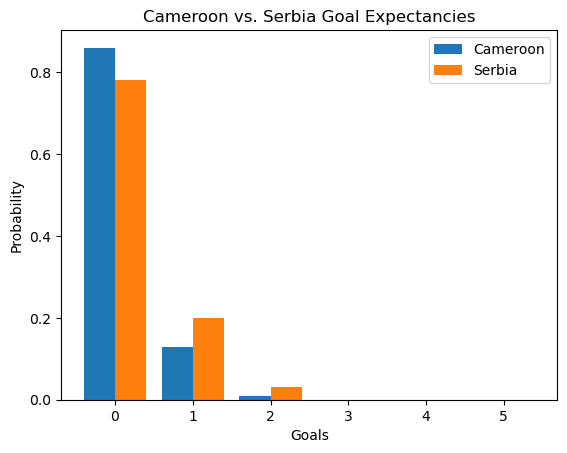

These are the score line probabilities:  [0.6708000000000001, 0.17200000000000001, 0.1014, 0.026000000000000002]


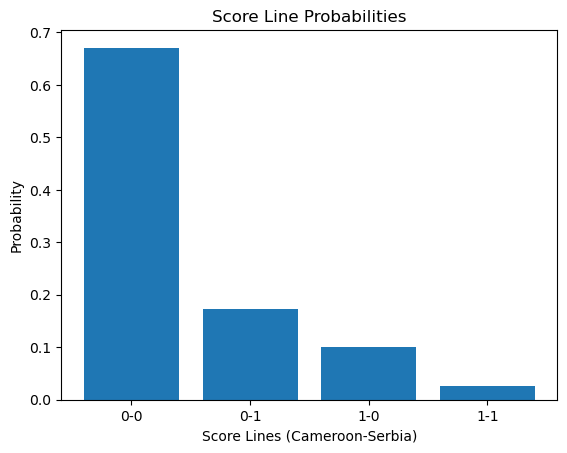

In [113]:
#Cameroon xG
CameroonxG = (da['AS'][4]) * (da['DS'][24]) * leagueGF

#Serbia xG
SerbiaxG = (da['AS'][24]) * (da['DS'][4]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Cameroon probability mass function
Cameroon_pmf = poisson.pmf(Goals, CameroonxG)
Cameroon_pmf = np.round(Cameroon_pmf, 2)
Cameroon_pmf

#Serbia probability mass function
Serbia_pmf = poisson.pmf(Goals, SerbiaxG)
Serbia_pmf = np.round(Serbia_pmf, 2)
Serbia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Cameroon_pmf, 0.4, label = 'Cameroon')
plt.bar(X_axis + 0.2, Serbia_pmf, 0.4, label = 'Serbia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Cameroon vs. Serbia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Cameroon_pmf[0] * Serbia_pmf[0])
score_prob_lst.append(Cameroon_pmf[0] * Serbia_pmf[1])
score_prob_lst.append(Cameroon_pmf[1] * Serbia_pmf[0])
score_prob_lst.append(Cameroon_pmf[1] * Serbia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Cameroon-Serbia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [114]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Serbia win
# as a 0-1 score line is significantly large, Serbia wins

Serbia_wins = Serbia_wins + 1

## Cameroon vs. Switzerland

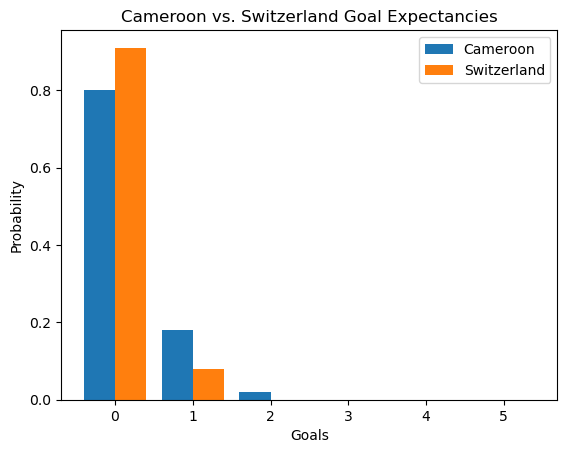

These are the score line probabilities:  [0.7280000000000001, 0.064, 0.1638, 0.0144]


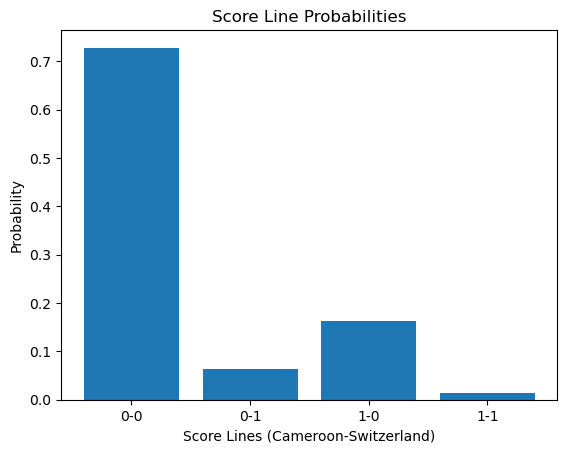

In [115]:
#Cameroon xG
CameroonxG = (da['AS'][4]) * (da['DS'][27]) * leagueGF

#Switzerland xG
SwitzerlandxG = (da['AS'][27]) * (da['DS'][4]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Cameroon probability mass function
Cameroon_pmf = poisson.pmf(Goals, CameroonxG)
Cameroon_pmf = np.round(Cameroon_pmf, 2)
Cameroon_pmf

#Switzerland probability mass function
Switzerland_pmf = poisson.pmf(Goals, SwitzerlandxG)
Switzerland_pmf = np.round(Switzerland_pmf, 2)
Switzerland_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Cameroon_pmf, 0.4, label = 'Cameroon')
plt.bar(X_axis + 0.2, Switzerland_pmf, 0.4, label = 'Switzerland')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Cameroon vs. Switzerland Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Cameroon_pmf[0] * Switzerland_pmf[0])
score_prob_lst.append(Cameroon_pmf[0] * Switzerland_pmf[1])
score_prob_lst.append(Cameroon_pmf[1] * Switzerland_pmf[0])
score_prob_lst.append(Cameroon_pmf[1] * Switzerland_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Cameroon-Switzerland)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [116]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Cameroon win
# as a 0-1 score line is significantly large, Cameroon wins

Cameroon_wins = Cameroon_wins + 1

## Serbia vs. Switzerland

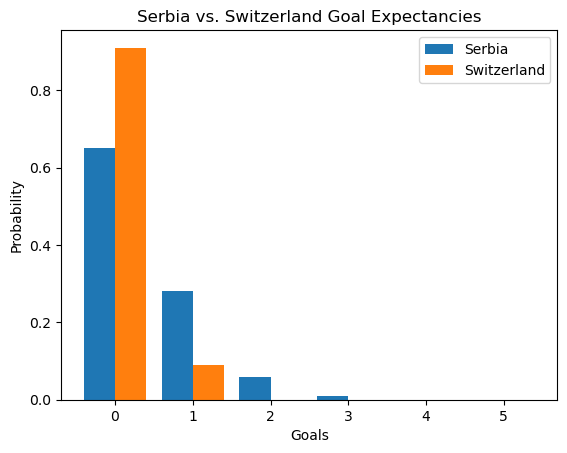

These are the score line probabilities:  [0.5915, 0.058499999999999996, 0.2548, 0.0252]


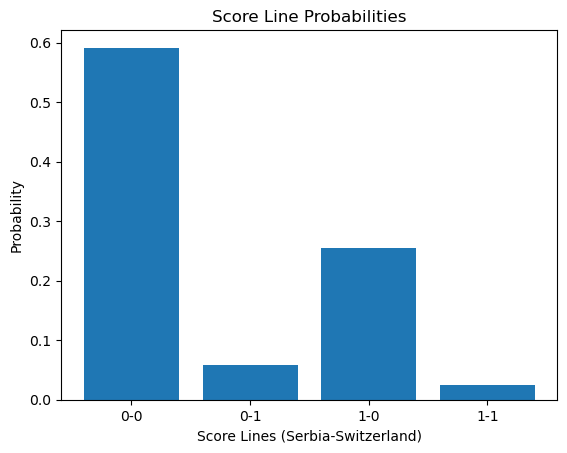

In [117]:
#Serbia xG
SerbiaxG = (da['AS'][24]) * (da['DS'][27]) * leagueGF

#Switzerland xG
SwitzerlandxG = (da['AS'][27]) * (da['DS'][24]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Serbia probability mass function
Serbia_pmf = poisson.pmf(Goals, SerbiaxG)
Serbia_pmf = np.round(Serbia_pmf, 2)
Serbia_pmf

#Switzerland probability mass function
Switzerland_pmf = poisson.pmf(Goals, SwitzerlandxG)
Switzerland_pmf = np.round(Switzerland_pmf, 2)
Switzerland_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Serbia_pmf, 0.4, label = 'Serbia')
plt.bar(X_axis + 0.2, Switzerland_pmf, 0.4, label = 'Switzerland')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Serbia vs. Switzerland Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Serbia_pmf[0] * Switzerland_pmf[0])
score_prob_lst.append(Serbia_pmf[0] * Switzerland_pmf[1])
score_prob_lst.append(Serbia_pmf[1] * Switzerland_pmf[0])
score_prob_lst.append(Serbia_pmf[1] * Switzerland_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Serbia-Switzerland)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [118]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Serbia win
# as a 1-0 score line is significantly large, Serbia wins

Serbia_wins = Serbia_wins + 1

## Group G Advancement

In [119]:
print("Brazil wins: ", Brazil_wins)
print("Brazil draws: ", Brazil_draws)
print("Cameroon wins: ", Cameroon_wins)
print("Cameroon draws: ", Cameroon_draws)
print("Serbia wins: ", Serbia_wins)
print("Serbia draws: ", Serbia_draws)
print("Switzerland wins: ", Switzerland_wins)
print("Switzerland draws: ", Switzerland_draws)

Brazil wins:  3
Brazil draws:  0
Cameroon wins:  1
Cameroon draws:  0
Serbia wins:  2
Serbia draws:  0
Switzerland wins:  0
Switzerland draws:  0


Brazil advances as 1G, Serbia advances as 2G


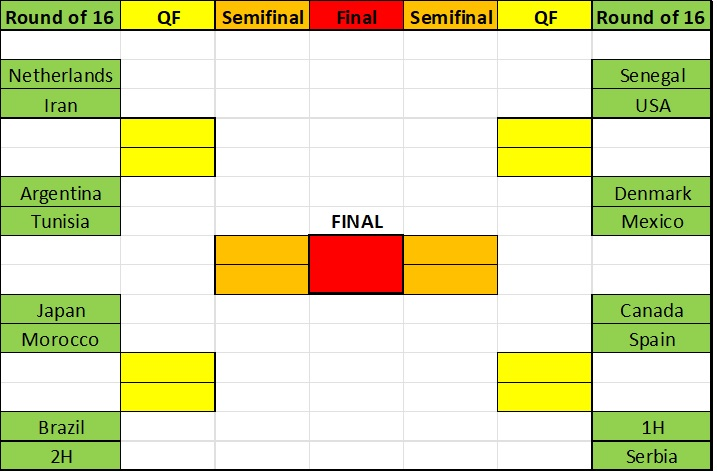

In [120]:
print('Brazil advances as 1G, Serbia advances as 2G')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%207.jpg') 

## Group H Predictions

In [121]:
#creating variables to count wins and draws for points calculations
Ghana_wins = 0
Ghana_draws = 0
Portugal_wins = 0
Portugal_draws = 0
SouthKorea_wins = 0
SouthKorea_draws = 0
Uruguay_wins = 0
Uruguay_draws = 0

## Ghana vs. Portugal

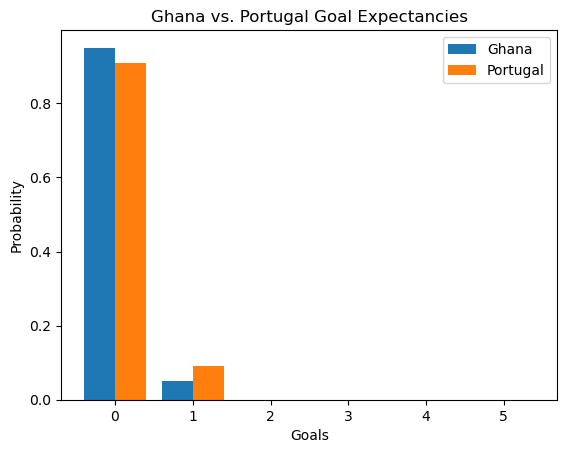

These are the score line probabilities:  [0.8644999999999999, 0.08549999999999999, 0.045500000000000006, 0.0045]


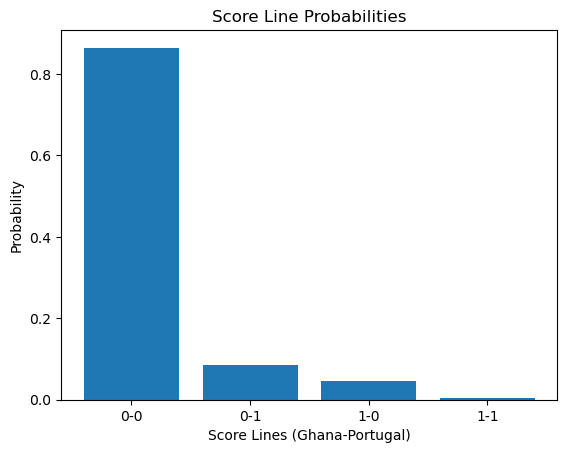

In [122]:
#Ghana xG
GhanaxG = (da['AS'][13]) * (da['DS'][20]) * leagueGF

#Portugal xG
PortugalxG = (da['AS'][27]) * (da['DS'][24]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Ghana probability mass function
Ghana_pmf = poisson.pmf(Goals, GhanaxG)
Ghana_pmf = np.round(Ghana_pmf, 2)
Ghana_pmf

#Portugal probability mass function
Portugal_pmf = poisson.pmf(Goals, PortugalxG)
Portugal_pmf = np.round(Portugal_pmf, 2)
Portugal_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Ghana_pmf, 0.4, label = 'Ghana')
plt.bar(X_axis + 0.2, Portugal_pmf, 0.4, label = 'Portugal')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Ghana vs. Portugal Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Ghana_pmf[0] * Portugal_pmf[0])
score_prob_lst.append(Ghana_pmf[0] * Portugal_pmf[1])
score_prob_lst.append(Ghana_pmf[1] * Portugal_pmf[0])
score_prob_lst.append(Ghana_pmf[1] * Portugal_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Ghana-Portugal)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [123]:
# the most likely score line is 0-0, a draw

Ghana_draws = Ghana_draws + 1
Portugal_draws = Portugal_draws + 1

## Ghana vs. South Korea

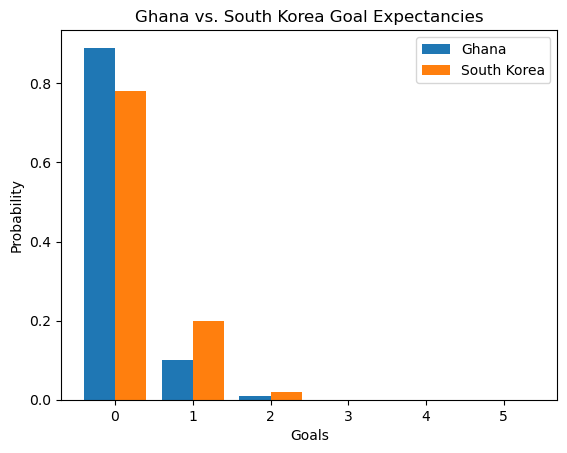

These are the score line probabilities:  [0.6942, 0.17800000000000002, 0.07800000000000001, 0.020000000000000004]


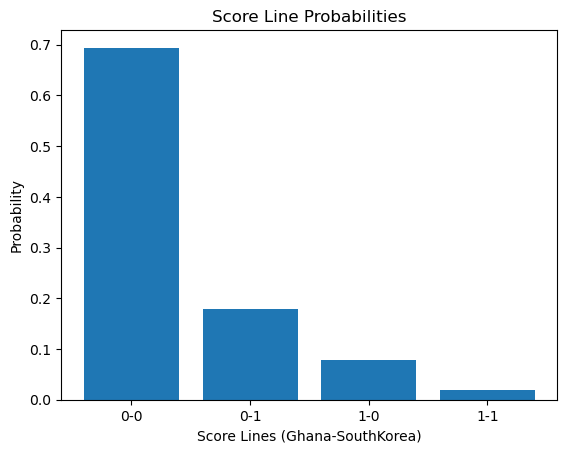

In [124]:
#Ghana xG
GhanaxG = (da['AS'][13]) * (da['DS'][25]) * leagueGF

#South Korea xG
SouthKoreaxG = (da['AS'][25]) * (da['DS'][13]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Ghana probability mass function
Ghana_pmf = poisson.pmf(Goals, GhanaxG)
Ghana_pmf = np.round(Ghana_pmf, 2)
Ghana_pmf

#SouthKorea probability mass function
SouthKorea_pmf = poisson.pmf(Goals, SouthKoreaxG)
SouthKorea_pmf = np.round(SouthKorea_pmf, 2)
SouthKorea_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Ghana_pmf, 0.4, label = 'Ghana')
plt.bar(X_axis + 0.2, SouthKorea_pmf, 0.4, label = 'South Korea')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Ghana vs. South Korea Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Ghana_pmf[0] * SouthKorea_pmf[0])
score_prob_lst.append(Ghana_pmf[0] * SouthKorea_pmf[1])
score_prob_lst.append(Ghana_pmf[1] * SouthKorea_pmf[0])
score_prob_lst.append(Ghana_pmf[1] * SouthKorea_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Ghana-SouthKorea)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [125]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a South Korea win
# as a 0-1 score line is significantly large, Serbia wins

SouthKorea_wins = SouthKorea_wins + 1

## Ghana vs. Uruguay

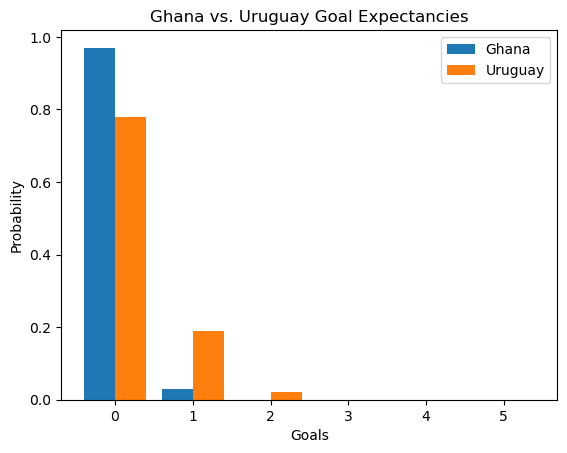

These are the score line probabilities:  [0.7566, 0.1843, 0.0234, 0.0057]


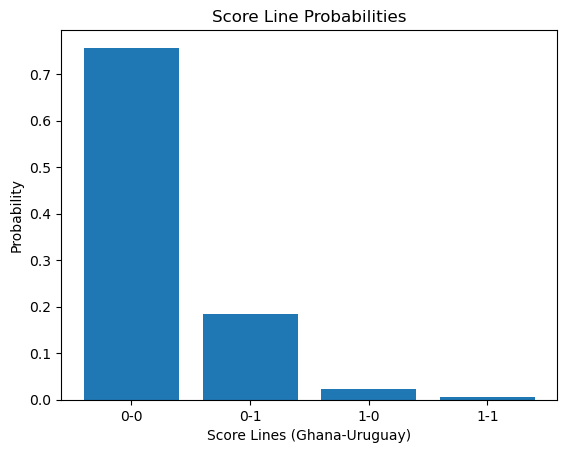

In [126]:
#Ghana xG
GhanaxG = (da['AS'][13]) * (da['DS'][29]) * leagueGF

#Uruguay xG
UruguayxG = (da['AS'][29]) * (da['DS'][13]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Ghana probability mass function
Ghana_pmf = poisson.pmf(Goals, GhanaxG)
Ghana_pmf = np.round(Ghana_pmf, 2)
Ghana_pmf

#Uruguay probability mass function
Uruguay_pmf = poisson.pmf(Goals, UruguayxG)
Uruguay_pmf = np.round(Uruguay_pmf, 2)
Uruguay_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Ghana_pmf, 0.4, label = 'Ghana')
plt.bar(X_axis + 0.2, Uruguay_pmf, 0.4, label = 'Uruguay')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Ghana vs. Uruguay Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Ghana_pmf[0] * Uruguay_pmf[0])
score_prob_lst.append(Ghana_pmf[0] * Uruguay_pmf[1])
score_prob_lst.append(Ghana_pmf[1] * Uruguay_pmf[0])
score_prob_lst.append(Ghana_pmf[1] * Uruguay_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Ghana-Uruguay)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [127]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Uruguay win
# as a 0-1 score line is significantly large, Uruguay wins

Uruguay_wins = Uruguay_wins + 1

## Portugal vs. South Korea

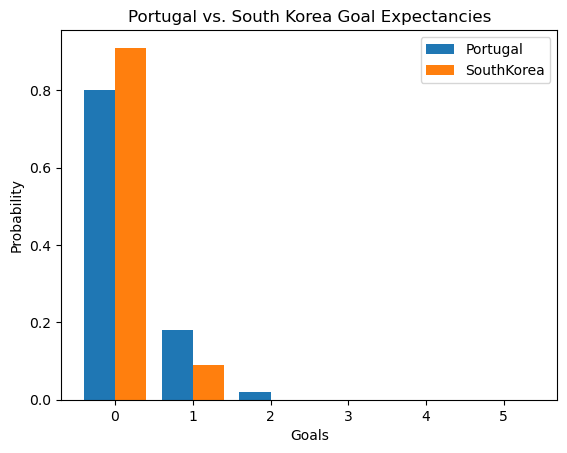

These are the score line probabilities:  [0.7280000000000001, 0.072, 0.1638, 0.0162]


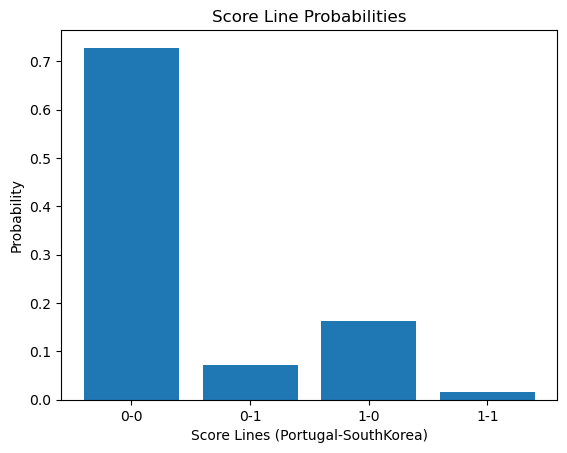

In [128]:
#Portugal xG
PortugalxG = (da['AS'][20]) * (da['DS'][25]) * leagueGF

#South Korea xG
SouthKoreaxG = (da['AS'][25]) * (da['DS'][20]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Portugal probability mass function
Portugal_pmf = poisson.pmf(Goals, PortugalxG)
Portugal_pmf = np.round(Portugal_pmf, 2)
Portugal_pmf

#SouthKorea probability mass function
SouthKorea_pmf = poisson.pmf(Goals, SouthKoreaxG)
SouthKorea_pmf = np.round(SouthKorea_pmf, 2)
SouthKorea_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Portugal_pmf, 0.4, label = 'Portugal')
plt.bar(X_axis + 0.2, SouthKorea_pmf, 0.4, label = 'SouthKorea')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Portugal vs. South Korea Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Portugal_pmf[0] * SouthKorea_pmf[0])
score_prob_lst.append(Portugal_pmf[0] * SouthKorea_pmf[1])
score_prob_lst.append(Portugal_pmf[1] * SouthKorea_pmf[0])
score_prob_lst.append(Portugal_pmf[1] * SouthKorea_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Portugal-SouthKorea)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [129]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 1-0, a Portugal win
# as a 1-0 score line is significantly large, Portugal wins

Portugal_wins = Portugal_wins + 1

## Portugal vs. Uruguay

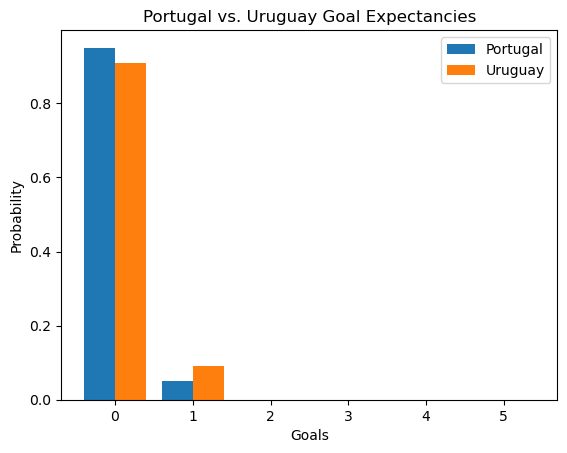

These are the score line probabilities:  [0.8644999999999999, 0.08549999999999999, 0.045500000000000006, 0.0045]


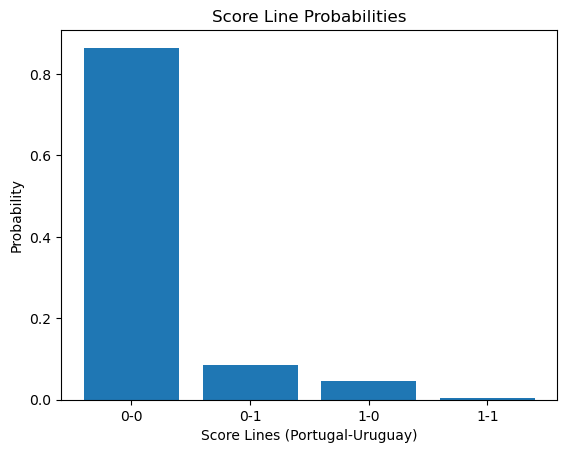

In [130]:
#Portugal xG
PortugalxG = (da['AS'][20]) * (da['DS'][29]) * leagueGF

#Uruguay xG
UruguayxG = (da['AS'][29]) * (da['DS'][20]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Portugal probability mass function
Portugal_pmf = poisson.pmf(Goals, PortugalxG)
Portugal_pmf = np.round(Portugal_pmf, 2)
Portugal_pmf

#Uruguay probability mass function
Uruguay_pmf = poisson.pmf(Goals, UruguayxG)
Uruguay_pmf = np.round(Uruguay_pmf, 2)
Uruguay_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Portugal_pmf, 0.4, label = 'Portugal')
plt.bar(X_axis + 0.2, Uruguay_pmf, 0.4, label = 'Uruguay')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Portugal vs. Uruguay Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Portugal_pmf[0] * Uruguay_pmf[0])
score_prob_lst.append(Portugal_pmf[0] * Uruguay_pmf[1])
score_prob_lst.append(Portugal_pmf[1] * Uruguay_pmf[0])
score_prob_lst.append(Portugal_pmf[1] * Uruguay_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Portugal-Uruguay)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [131]:
# the most likely score line is 0-0, a draw

Portugal_draws = Portugal_draws + 1
Uruguay_draws = Uruguay_draws + 1

## South Korea vs. Uruguay

In [132]:
print('Ghana 13')
print('Portugal 20')
print('South Korea 25')
print('Uruguay 29')

Ghana 13
Portugal 20
South Korea 25
Uruguay 29


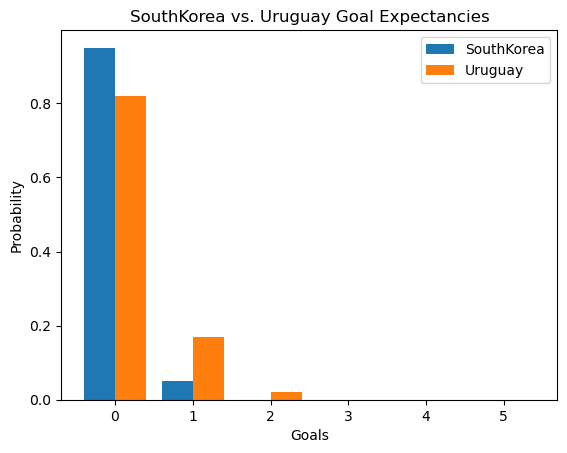

These are the score line probabilities:  [0.7789999999999999, 0.1615, 0.041, 0.0085]


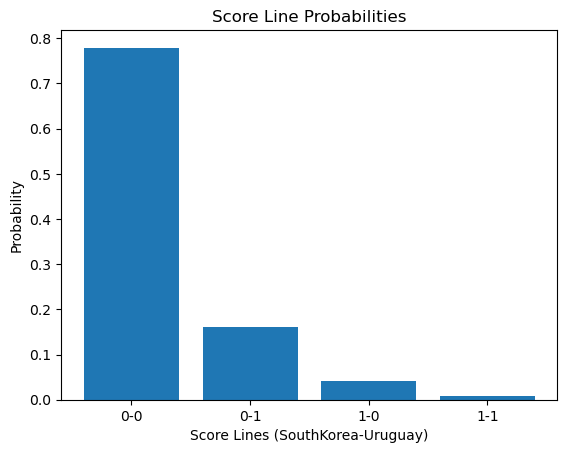

In [133]:
#South Korea xG
SouthKoreaxG = (da['AS'][25]) * (da['DS'][29]) * leagueGF

#Uruguay xG
UruguayxG = (da['AS'][29]) * (da['DS'][25]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#SouthKorea probability mass function
SouthKorea_pmf = poisson.pmf(Goals, SouthKoreaxG)
SouthKorea_pmf = np.round(SouthKorea_pmf, 2)
SouthKorea_pmf

#Uruguay probability mass function
Uruguay_pmf = poisson.pmf(Goals, UruguayxG)
Uruguay_pmf = np.round(Uruguay_pmf, 2)
Uruguay_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, SouthKorea_pmf, 0.4, label = 'SouthKorea')
plt.bar(X_axis + 0.2, Uruguay_pmf, 0.4, label = 'Uruguay')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("SouthKorea vs. Uruguay Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(SouthKorea_pmf[0] * Uruguay_pmf[0])
score_prob_lst.append(SouthKorea_pmf[0] * Uruguay_pmf[1])
score_prob_lst.append(SouthKorea_pmf[1] * Uruguay_pmf[0])
score_prob_lst.append(SouthKorea_pmf[1] * Uruguay_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (SouthKorea-Uruguay)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [134]:
# the most likely score line is 0-0, a draw
# the second most likely score line is 0-1, a Uruguay win
# as a 1-0 score line is significantly large, Uruguay wins

Uruguay_wins = Uruguay_wins + 1

## Group H Advancement

In [135]:
print("Ghana wins: ", Ghana_wins)
print("Ghana draws: ", Ghana_draws)
print("Portugal wins: ", Portugal_wins)
print("Portugal draws: ", Portugal_draws)
print("South Korea wins: ", SouthKorea_wins)
print("South Korea draws: ", SouthKorea_draws)
print("Uruguay wins: ", Uruguay_wins)
print("Uruguay draws: ", Uruguay_draws)

Ghana wins:  0
Ghana draws:  1
Portugal wins:  1
Portugal draws:  2
South Korea wins:  1
South Korea draws:  0
Uruguay wins:  2
Uruguay draws:  1


Uruguay advances as 1H, Portugal advances as 2H


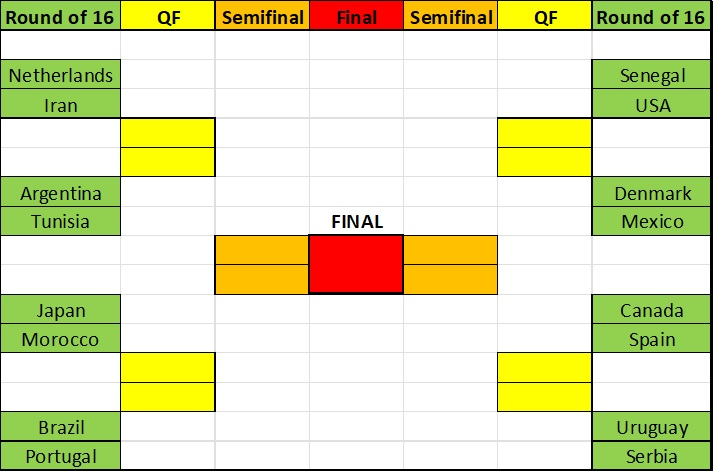

In [136]:
print('Uruguay advances as 1H, Portugal advances as 2H')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%208.jpg') 

# Round of 16 Predictions

## Netherlands vs. Iran

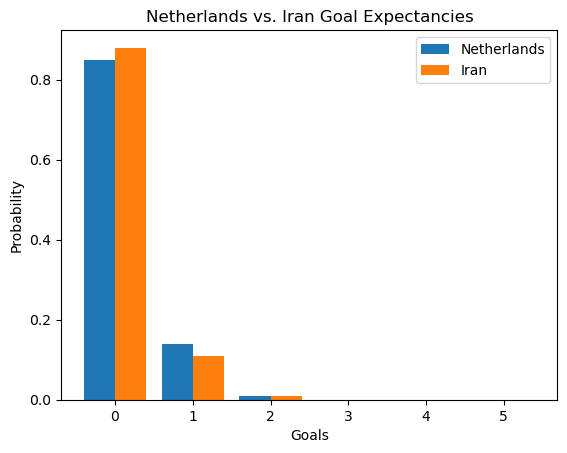

These are the score line probabilities:  [0.748, 0.0935, 0.12320000000000002, 0.015400000000000002]


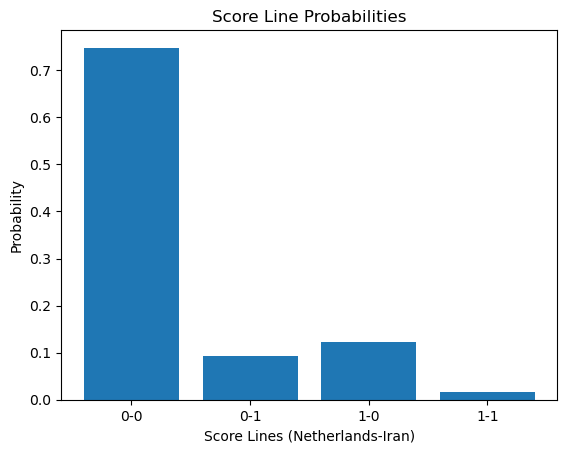

In [137]:
#Netherlands xG
NetherlandsxG = (da['AS'][18]) * (da['DS'][14]) * leagueGF

#Iran xG
IranxG = (da['AS'][14]) * (da['DS'][18]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Netherlands probability mass function
Netherlands_pmf = poisson.pmf(Goals, NetherlandsxG)
Netherlands_pmf = np.round(Netherlands_pmf, 2)
Netherlands_pmf

#Iran probability mass function
Iran_pmf = poisson.pmf(Goals, IranxG)
Iran_pmf = np.round(Iran_pmf, 2)
Iran_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Netherlands_pmf, 0.4, label = 'Netherlands')
plt.bar(X_axis + 0.2, Iran_pmf, 0.4, label = 'Iran')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Netherlands vs. Iran Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Netherlands_pmf[0] * Iran_pmf[0])
score_prob_lst.append(Netherlands_pmf[0] * Iran_pmf[1])
score_prob_lst.append(Netherlands_pmf[1] * Iran_pmf[0])
score_prob_lst.append(Netherlands_pmf[1] * Iran_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Netherlands-Iran)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [138]:
# the most likely win score line is 1-0, a Netherlands win
# Netherlands advances

## Argentina vs. Tunisia

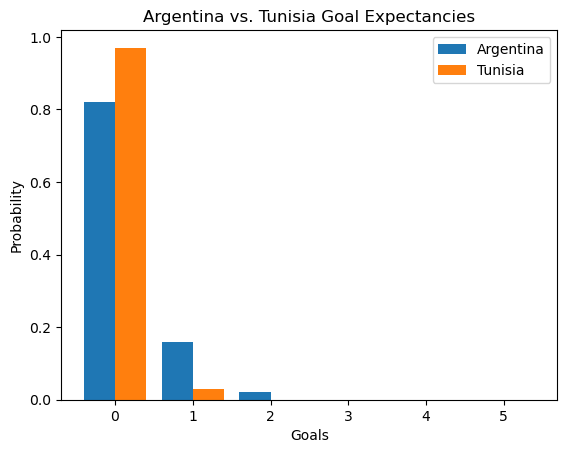

These are the score line probabilities:  [0.7953999999999999, 0.024599999999999997, 0.1552, 0.0048]


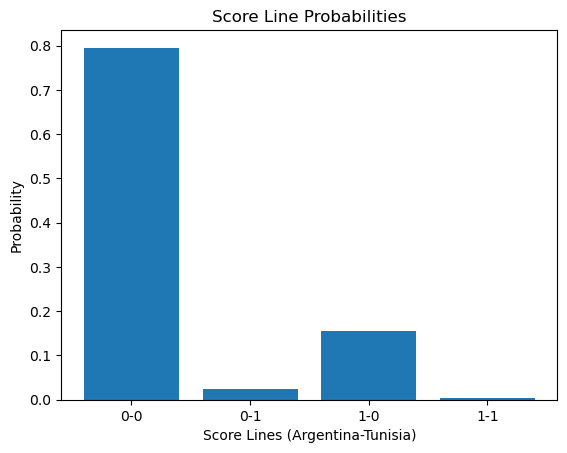

In [139]:
#Argentina xG
ArgentinaxG = (da['AS'][0]) * (da['DS'][28]) * leagueGF

#Tunisia xG
TunisiaxG = (da['AS'][28]) * (da['DS'][0]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Argentina probability mass function
Argentina_pmf = poisson.pmf(Goals, ArgentinaxG)
Argentina_pmf = np.round(Argentina_pmf, 2)
Argentina_pmf

#Tunisia probability mass function
Tunisia_pmf = poisson.pmf(Goals, TunisiaxG)
Tunisia_pmf = np.round(Tunisia_pmf, 2)
Tunisia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Argentina_pmf, 0.4, label = 'Argentina')
plt.bar(X_axis + 0.2, Tunisia_pmf, 0.4, label = 'Tunisia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Argentina vs. Tunisia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Argentina_pmf[0] * Tunisia_pmf[0])
score_prob_lst.append(Argentina_pmf[0] * Tunisia_pmf[1])
score_prob_lst.append(Argentina_pmf[1] * Tunisia_pmf[0])
score_prob_lst.append(Argentina_pmf[1] * Tunisia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Argentina-Tunisia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [140]:
# the most likely win score line is 1-0, an Argentina win
# Argentina advances

## Japan vs. Morocco

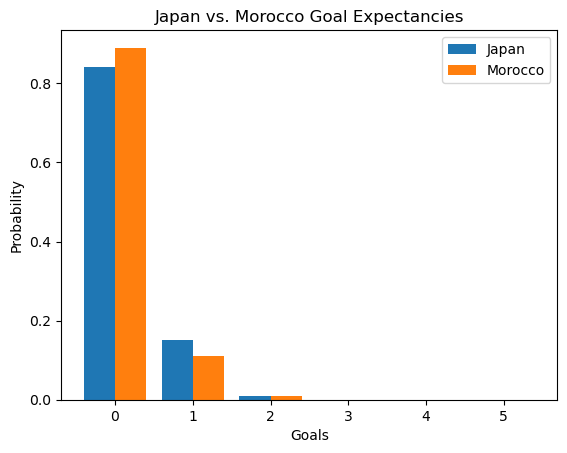

These are the score line probabilities:  [0.7475999999999999, 0.0924, 0.1335, 0.0165]


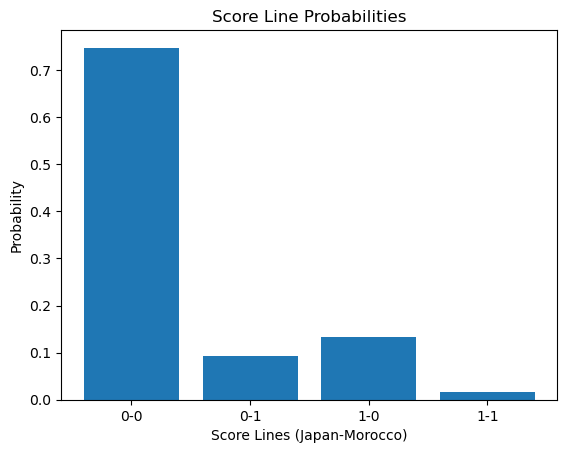

In [141]:
#Japan xG
JapanxG = (da['AS'][15]) * (da['DS'][17]) * leagueGF

#Morocco xG
MoroccoxG = (da['AS'][17]) * (da['DS'][15]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Japan probability mass function
Japan_pmf = poisson.pmf(Goals, JapanxG)
Japan_pmf = np.round(Japan_pmf, 2)
Japan_pmf

#Morocco probability mass function
Morocco_pmf = poisson.pmf(Goals, MoroccoxG)
Morocco_pmf = np.round(Morocco_pmf, 2)
Morocco_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Japan_pmf, 0.4, label = 'Japan')
plt.bar(X_axis + 0.2, Morocco_pmf, 0.4, label = 'Morocco')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Japan vs. Morocco Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Japan_pmf[0] * Morocco_pmf[0])
score_prob_lst.append(Japan_pmf[0] * Morocco_pmf[1])
score_prob_lst.append(Japan_pmf[1] * Morocco_pmf[0])
score_prob_lst.append(Japan_pmf[1] * Morocco_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Japan-Morocco)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [142]:
# the most likely win score line is 1-0, a Japan win
# Japan advances

## Brazil vs. Portugal

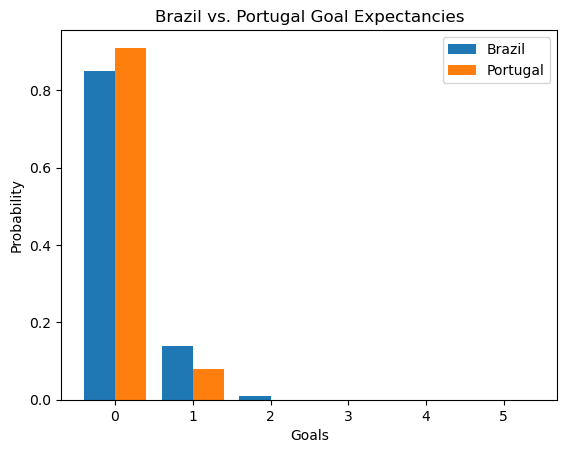

These are the score line probabilities:  [0.7735, 0.068, 0.1274, 0.011200000000000002]


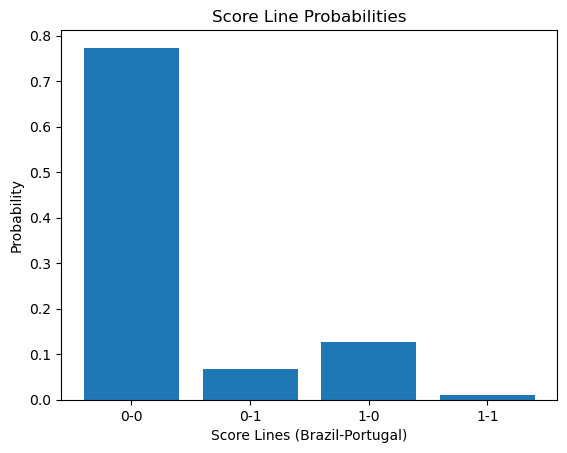

In [143]:
#Brail xG
BrazilxG = (da['AS'][3]) * (da['DS'][20]) * leagueGF

#Portugal xG
PortugalxG = (da['AS'][20]) * (da['DS'][3]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Brazil probability mass function
Brazil_pmf = poisson.pmf(Goals, BrazilxG)
Brazil_pmf = np.round(Brazil_pmf, 2)
Brazil_pmf

#Portugal probability mass function
Portugal_pmf = poisson.pmf(Goals, PortugalxG)
Portugal_pmf = np.round(Portugal_pmf, 2)
Portugal_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Brazil_pmf, 0.4, label = 'Brazil')
plt.bar(X_axis + 0.2, Portugal_pmf, 0.4, label = 'Portugal')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Brazil vs. Portugal Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Brazil_pmf[0] * Portugal_pmf[0])
score_prob_lst.append(Brazil_pmf[0] * Portugal_pmf[1])
score_prob_lst.append(Brazil_pmf[1] * Portugal_pmf[0])
score_prob_lst.append(Brazil_pmf[1] * Portugal_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Brazil-Portugal)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [144]:
# the most likely win score line is 1-0, a Brazil win
# Brazil advances

## Senegal vs. USA

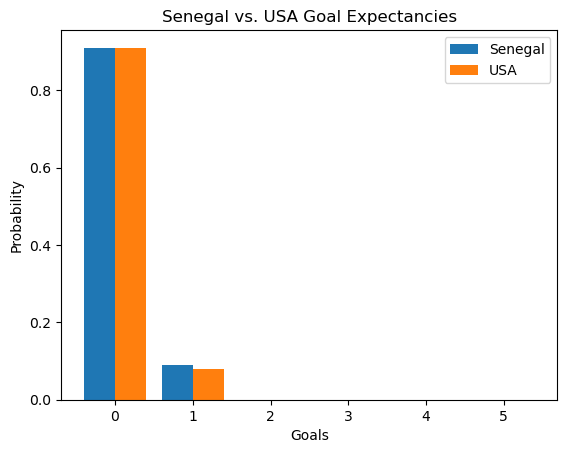

These are the score line probabilities:  [0.8281000000000001, 0.0728, 0.0819, 0.0072]


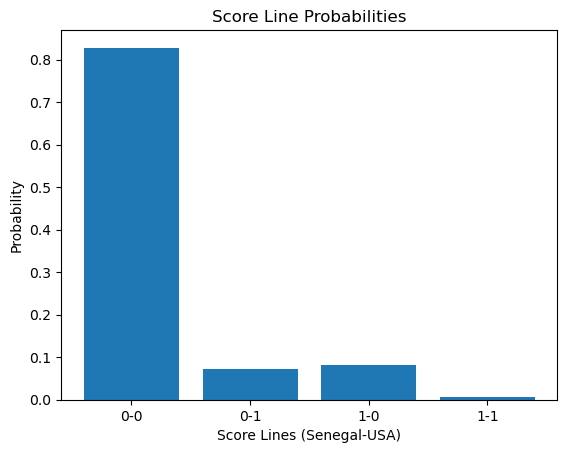

In [145]:
#Senegal xG
SenegalxG = (da['AS'][23]) * (da['DS'][30]) * leagueGF

#USA xG
USAxG = (da['AS'][20]) * (da['DS'][3]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Senegal probability mass function
Senegal_pmf = poisson.pmf(Goals, SenegalxG)
Senegal_pmf = np.round(Senegal_pmf, 2)
Senegal_pmf

#USA probability mass function
USA_pmf = poisson.pmf(Goals, USAxG)
USA_pmf = np.round(USA_pmf, 2)
USA_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Senegal_pmf, 0.4, label = 'Senegal')
plt.bar(X_axis + 0.2, USA_pmf, 0.4, label = 'USA')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Senegal vs. USA Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Senegal_pmf[0] * USA_pmf[0])
score_prob_lst.append(Senegal_pmf[0] * USA_pmf[1])
score_prob_lst.append(Senegal_pmf[1] * USA_pmf[0])
score_prob_lst.append(Senegal_pmf[1] * USA_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Senegal-USA)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [146]:
# the most likely win score line is 1-0, a Senegal win
# Senegal advances

## Denmark vs. Mexico

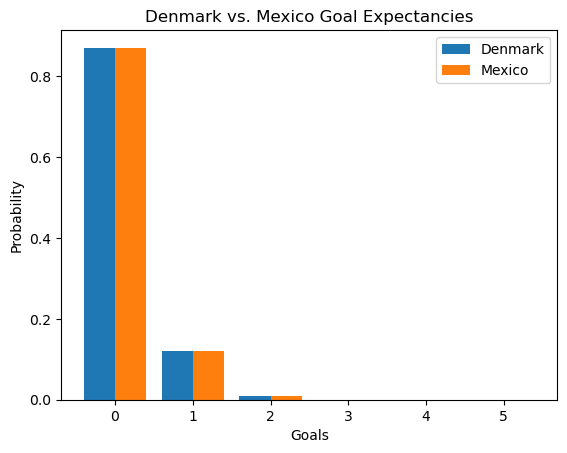

These are the score line probabilities:  [0.7569, 0.10439999999999999, 0.10439999999999999, 0.0144]


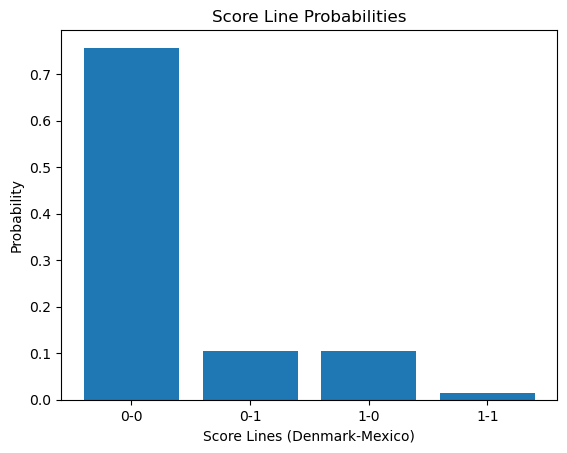

In [147]:
#Denmark xG
DenmarkxG = (da['AS'][8]) * (da['DS'][16]) * leagueGF

#Mexico xG
MexicoxG = (da['AS'][16]) * (da['DS'][8]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Denmark probability mass function
Denmark_pmf = poisson.pmf(Goals, DenmarkxG)
Denmark_pmf = np.round(Denmark_pmf, 2)
Denmark_pmf

#Mexico probability mass function
Mexico_pmf = poisson.pmf(Goals, MexicoxG)
Mexico_pmf = np.round(Mexico_pmf, 2)
Mexico_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Denmark_pmf, 0.4, label = 'Denmark')
plt.bar(X_axis + 0.2, Mexico_pmf, 0.4, label = 'Mexico')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Denmark vs. Mexico Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Denmark_pmf[0] * Mexico_pmf[0])
score_prob_lst.append(Denmark_pmf[0] * Mexico_pmf[1])
score_prob_lst.append(Denmark_pmf[1] * Mexico_pmf[0])
score_prob_lst.append(Denmark_pmf[1] * Mexico_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Denmark-Mexico)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [148]:
# the win score lines are exactly the same
# Denmark advances based on Fifa ranking condition

## Canada vs. Spain

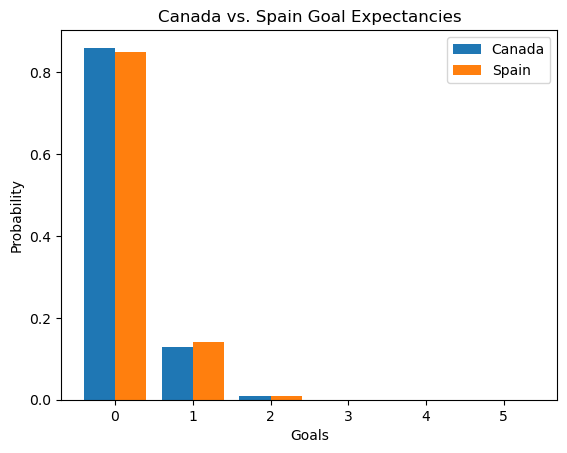

These are the score line probabilities:  [0.731, 0.12040000000000001, 0.1105, 0.0182]


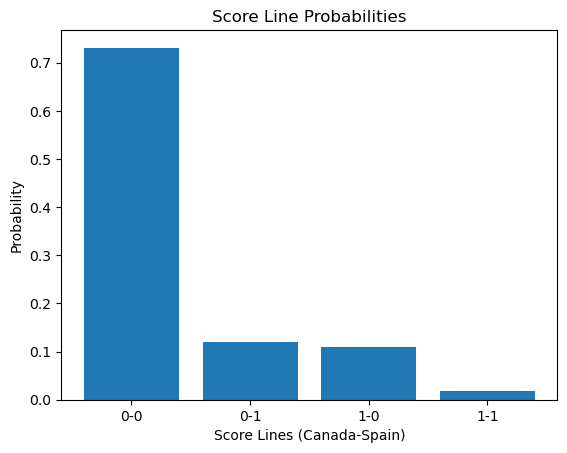

In [149]:
#Canada xG
CanadaxG = (da['AS'][5]) * (da['DS'][26]) * leagueGF

#Spain xG
SpainxG = (da['AS'][26]) * (da['DS'][5]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Canada probability mass function
Canada_pmf = poisson.pmf(Goals, CanadaxG)
Canada_pmf = np.round(Canada_pmf, 2)
Canada_pmf

#Spain probability mass function
Spain_pmf = poisson.pmf(Goals, SpainxG)
Spain_pmf = np.round(Spain_pmf, 2)
Spain_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Canada_pmf, 0.4, label = 'Canada')
plt.bar(X_axis + 0.2, Spain_pmf, 0.4, label = 'Spain')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Canada vs. Spain Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Canada_pmf[0] * Spain_pmf[0])
score_prob_lst.append(Canada_pmf[0] * Spain_pmf[1])
score_prob_lst.append(Canada_pmf[1] * Spain_pmf[0])
score_prob_lst.append(Canada_pmf[1] * Spain_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Canada-Spain)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [150]:
# the most likely win score line is 0-1, a Spain win
# Spain advances

## Uruguay vs. Serbia

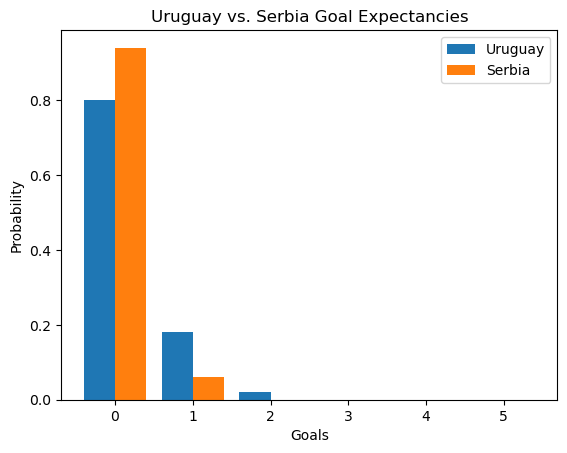

These are the score line probabilities:  [0.752, 0.048, 0.1692, 0.010799999999999999]


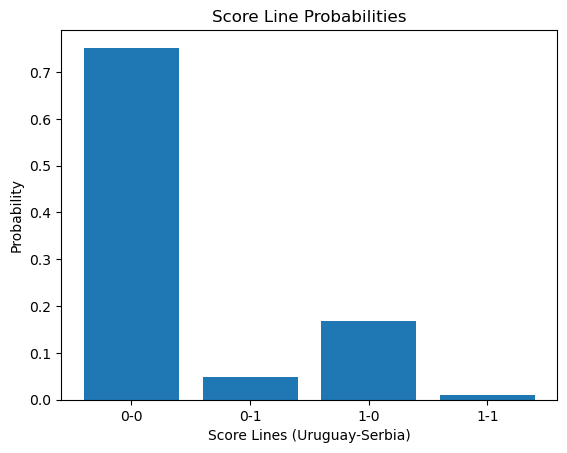

In [151]:
#Uruguay xG
UruguayxG = (da['AS'][29]) * (da['DS'][24]) * leagueGF

#Serbia xG
SerbiaxG = (da['AS'][24]) * (da['DS'][29]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Uruguay probability mass function
Uruguay_pmf = poisson.pmf(Goals, UruguayxG)
Uruguay_pmf = np.round(Uruguay_pmf, 2)
Uruguay_pmf

#Serbia probability mass function
Serbia_pmf = poisson.pmf(Goals, SerbiaxG)
Serbia_pmf = np.round(Serbia_pmf, 2)
Serbia_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Uruguay_pmf, 0.4, label = 'Uruguay')
plt.bar(X_axis + 0.2, Serbia_pmf, 0.4, label = 'Serbia')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Uruguay vs. Serbia Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Uruguay_pmf[0] * Serbia_pmf[0])
score_prob_lst.append(Uruguay_pmf[0] * Serbia_pmf[1])
score_prob_lst.append(Uruguay_pmf[1] * Serbia_pmf[0])
score_prob_lst.append(Uruguay_pmf[1] * Serbia_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Uruguay-Serbia)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [152]:
# the most likely win score line is 1-0, a Uruguay win
# Uruguay advances

## Round of 16 Advancement

Advancing countries: Netherlands, Argentina, Japan, Brazil, Senegal, Denmark, Spain, Uruguay


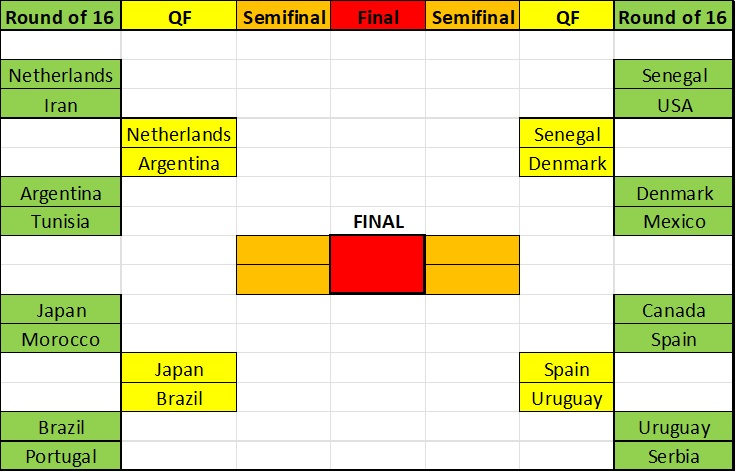

In [153]:
print('Advancing countries: Netherlands, Argentina, Japan, Brazil, Senegal, Denmark, Spain, Uruguay')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%209.jpg') 

# Quarter Finals Predictions

## Netherlands vs. Argentina

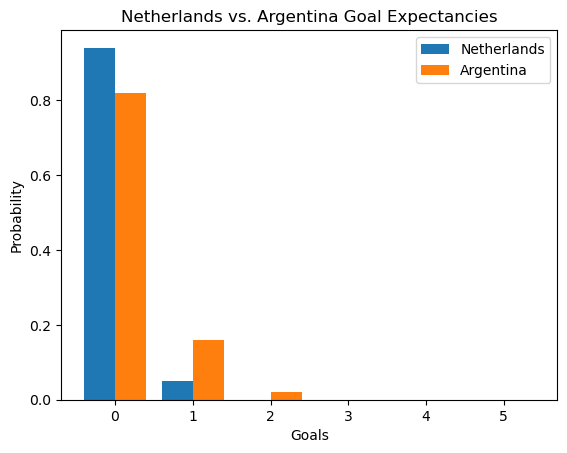

These are the score line probabilities:  [0.7707999999999999, 0.1504, 0.041, 0.008]


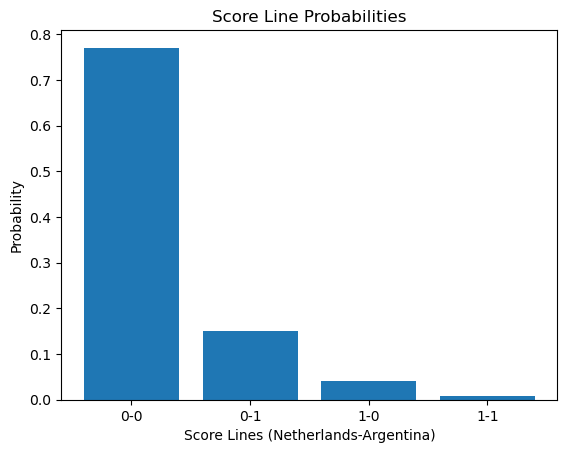

In [154]:
#Netherlands xG
NetherlandsxG = (da['AS'][18]) * (da['DS'][0]) * leagueGF

#Argentina xG
Argentina = (da['AS'][0]) * (da['DS'][18]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Netherlands probability mass function
Netherlands_pmf = poisson.pmf(Goals, NetherlandsxG)
Netherlands_pmf = np.round(Netherlands_pmf, 2)
Netherlands_pmf

#Iran probability mass function
Argentina_pmf = poisson.pmf(Goals, ArgentinaxG)
Argentina_pmf = np.round(Argentina_pmf, 2)
Argentina_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Netherlands_pmf, 0.4, label = 'Netherlands')
plt.bar(X_axis + 0.2, Argentina_pmf, 0.4, label = 'Argentina')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Netherlands vs. Argentina Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Netherlands_pmf[0] * Argentina_pmf[0])
score_prob_lst.append(Netherlands_pmf[0] * Argentina_pmf[1])
score_prob_lst.append(Netherlands_pmf[1] * Argentina_pmf[0])
score_prob_lst.append(Netherlands_pmf[1] * Argentina_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Netherlands-Argentina)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [155]:
# the most likely win score line is 0-1, an Argentina win
# Argentina advances

## Japan vs. Brazil

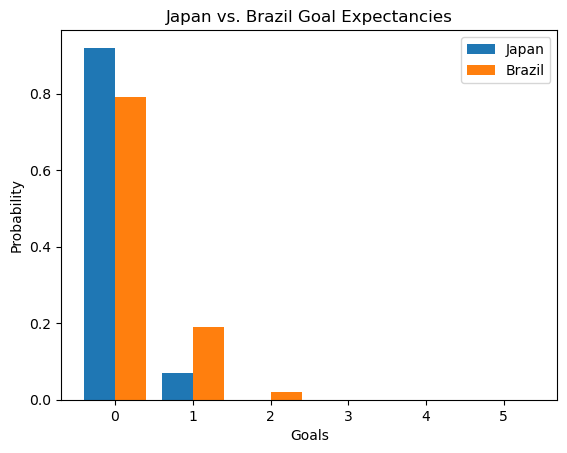

These are the score line probabilities:  [0.7268000000000001, 0.1748, 0.05530000000000001, 0.013300000000000001]


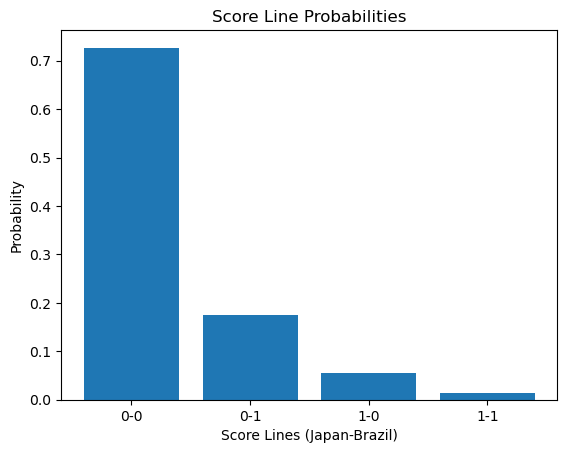

In [156]:
#Japan xG
JapanxG = (da['AS'][15]) * (da['DS'][3]) * leagueGF

#Brazil xG
BrazilxG = (da['AS'][3]) * (da['DS'][15]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Japan probability mass function
Japan_pmf = poisson.pmf(Goals, JapanxG)
Japan_pmf = np.round(Japan_pmf, 2)
Japan_pmf

#Brazil probability mass function
Brazil_pmf = poisson.pmf(Goals, BrazilxG)
Brazil_pmf = np.round(Brazil_pmf, 2)
Brazil_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Japan_pmf, 0.4, label = 'Japan')
plt.bar(X_axis + 0.2, Brazil_pmf, 0.4, label = 'Brazil')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Japan vs. Brazil Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Japan_pmf[0] * Brazil_pmf[0])
score_prob_lst.append(Japan_pmf[0] * Brazil_pmf[1])
score_prob_lst.append(Japan_pmf[1] * Brazil_pmf[0])
score_prob_lst.append(Japan_pmf[1] * Brazil_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Japan-Brazil)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [157]:
# the most likely win score line is 0-1, a Brazil win
# Brazil advances

## Senegal vs. Denmark

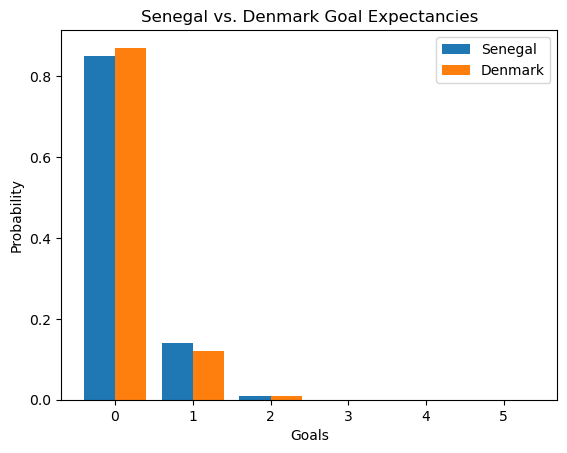

These are the score line probabilities:  [0.7394999999999999, 0.102, 0.1218, 0.016800000000000002]


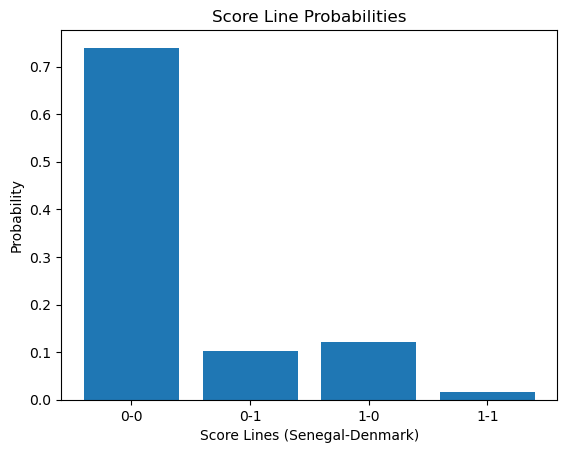

In [158]:
#Senegal xG
SenegalxG = (da['AS'][23]) * (da['DS'][8]) * leagueGF

#Denmark xG
DenmarkxG = (da['AS'][23]) * (da['DS'][8]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Senegal probability mass function
Senegal_pmf = poisson.pmf(Goals, SenegalxG)
Senegal_pmf = np.round(Senegal_pmf, 2)
Senegal_pmf

#Brazil probability mass function
Brazil_pmf = poisson.pmf(Goals, BrazilxG)
Brazil_pmf = np.round(Brazil_pmf, 2)
Brazil_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Senegal_pmf, 0.4, label = 'Senegal')
plt.bar(X_axis + 0.2, Denmark_pmf, 0.4, label = 'Denmark')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Senegal vs. Denmark Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Senegal_pmf[0] * Denmark_pmf[0])
score_prob_lst.append(Senegal_pmf[0] * Denmark_pmf[1])
score_prob_lst.append(Senegal_pmf[1] * Denmark_pmf[0])
score_prob_lst.append(Senegal_pmf[1] * Denmark_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Senegal-Denmark)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [159]:
# the most likely win score line is 1-0, a Senegal win
# Senegal advances

## Spain vs. Uruguay

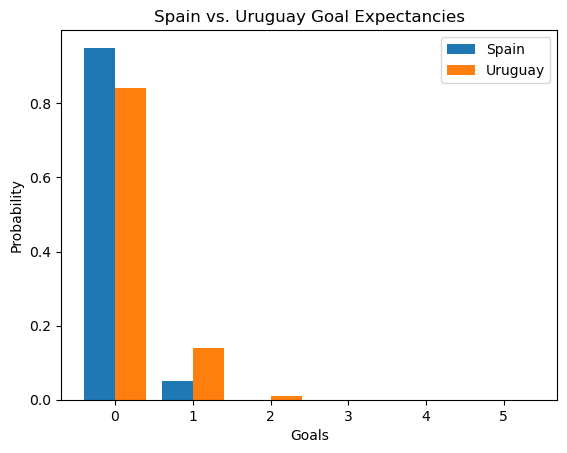

These are the score line probabilities:  [0.7979999999999999, 0.133, 0.042, 0.007000000000000001]


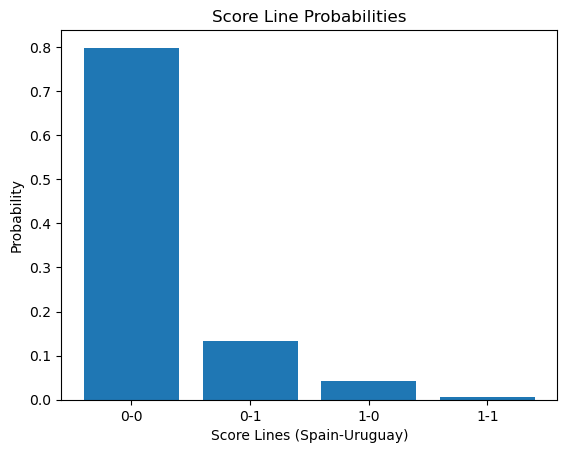

In [160]:
#Spain xG
SpainxG = (da['AS'][26]) * (da['DS'][29]) * leagueGF

#Uruguay xG
UruguayxG = (da['AS'][29]) * (da['DS'][26]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Spain probability mass function
Spain_pmf = poisson.pmf(Goals, SpainxG)
Spain_pmf = np.round(Spain_pmf, 2)
Spain_pmf

#Uruguay probability mass function
Uruguay_pmf = poisson.pmf(Goals, UruguayxG)
Uruguay_pmf = np.round(Uruguay_pmf, 2)
Uruguay_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Spain_pmf, 0.4, label = 'Spain')
plt.bar(X_axis + 0.2, Uruguay_pmf, 0.4, label = 'Uruguay')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Spain vs. Uruguay Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Spain_pmf[0] * Uruguay_pmf[0])
score_prob_lst.append(Spain_pmf[0] * Uruguay_pmf[1])
score_prob_lst.append(Spain_pmf[1] * Uruguay_pmf[0])
score_prob_lst.append(Spain_pmf[1] * Uruguay_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Spain-Uruguay)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [161]:
# the most likely win score line is 0-1, a Uruguay win
# Uruguay advances

# Quarter Finals Advancement

Advancing countries: Argentina, Brazil, Senegal, Uruguay


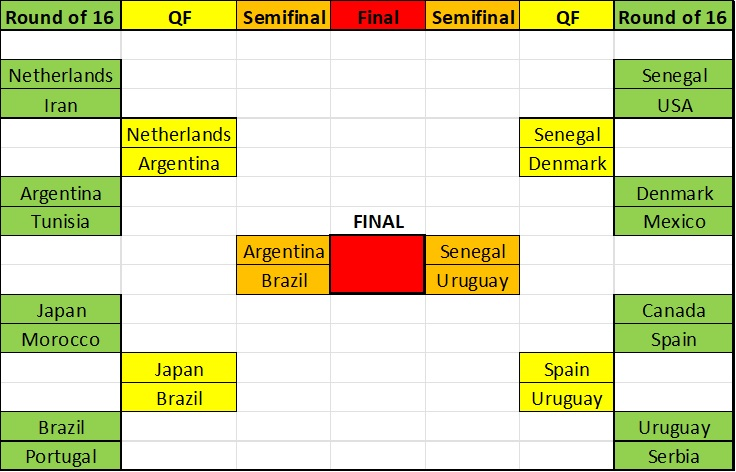

In [162]:
print('Advancing countries: Argentina, Brazil, Senegal, Uruguay')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%2010.jpg') 

# Semifinals Predictions

## Argentina vs. Brazil

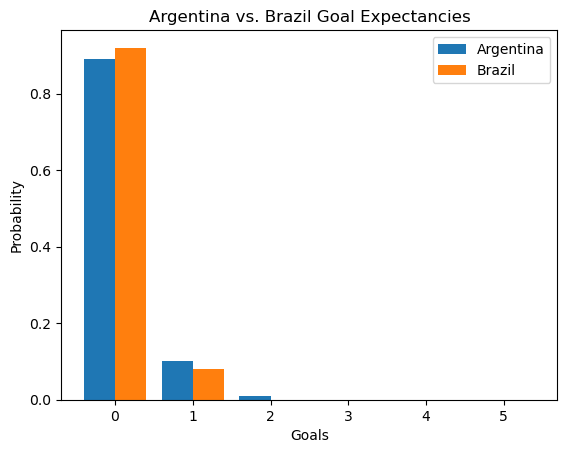

These are the score line probabilities:  [0.8188000000000001, 0.0712, 0.09200000000000001, 0.008]


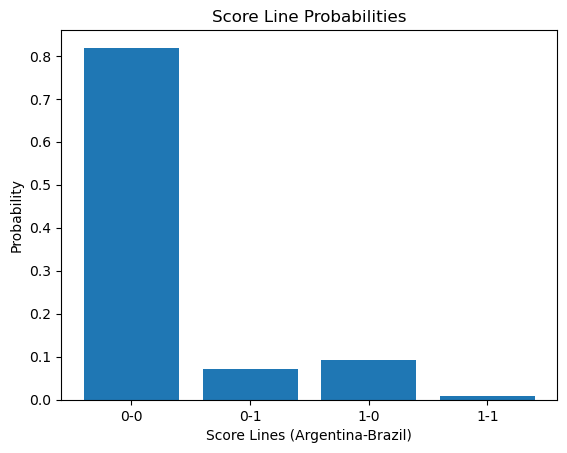

In [163]:
#Argentina xG
ArgentinaxG = (da['AS'][0]) * (da['DS'][3]) * leagueGF

#Brazil xG
BrazilxG = (da['AS'][3]) * (da['DS'][0]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Argentina probability mass function
Argentina_pmf = poisson.pmf(Goals, ArgentinaxG)
Argentina_pmf = np.round(Argentina_pmf, 2)
Argentina_pmf

#Brazil probability mass function
Brazil_pmf = poisson.pmf(Goals, BrazilxG)
Brazil_pmf = np.round(Brazil_pmf, 2)
Brazil_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Argentina_pmf, 0.4, label = 'Argentina')
plt.bar(X_axis + 0.2, Brazil_pmf, 0.4, label = 'Brazil')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Argentina vs. Brazil Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Argentina_pmf[0] * Brazil_pmf[0])
score_prob_lst.append(Argentina_pmf[0] * Brazil_pmf[1])
score_prob_lst.append(Argentina_pmf[1] * Brazil_pmf[0])
score_prob_lst.append(Argentina_pmf[1] * Brazil_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Argentina-Brazil)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [164]:
# the most likely win score line is 1-0, an Argentina win
# Argentina advances

## Senegal vs. Uruguay

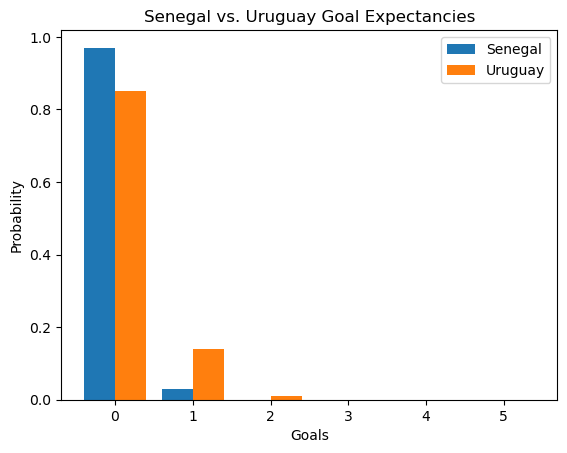

These are the score line probabilities:  [0.8245, 0.1358, 0.0255, 0.004200000000000001]


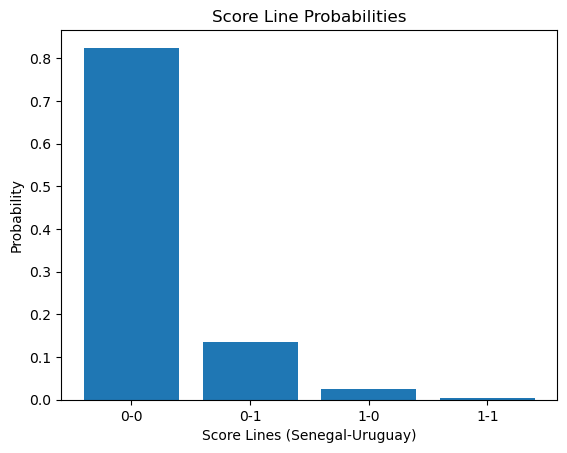

In [165]:
#Senegal xG
SenegalxG = (da['AS'][23]) * (da['DS'][29]) * leagueGF

#Uruguay xG
UruguayxG = (da['AS'][29]) * (da['DS'][23]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Senegal probability mass function
Senegal_pmf = poisson.pmf(Goals, SenegalxG)
Senegal_pmf = np.round(Senegal_pmf, 2)
Senegal_pmf

#Uruguay probability mass function
Uruguay_pmf = poisson.pmf(Goals, UruguayxG)
Uruguay_pmf = np.round(Uruguay_pmf, 2)
Uruguay_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Senegal_pmf, 0.4, label = 'Senegal')
plt.bar(X_axis + 0.2, Uruguay_pmf, 0.4, label = 'Uruguay')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Senegal vs. Uruguay Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Senegal_pmf[0] * Uruguay_pmf[0])
score_prob_lst.append(Senegal_pmf[0] * Uruguay_pmf[1])
score_prob_lst.append(Senegal_pmf[1] * Uruguay_pmf[0])
score_prob_lst.append(Senegal_pmf[1] * Uruguay_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Senegal-Uruguay)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [166]:
# the most likely win score line is 0-1, a Uruguay win
# Uruguay advances

## Semifinals Advancement

Advancing countries: Argentina, Uruguay


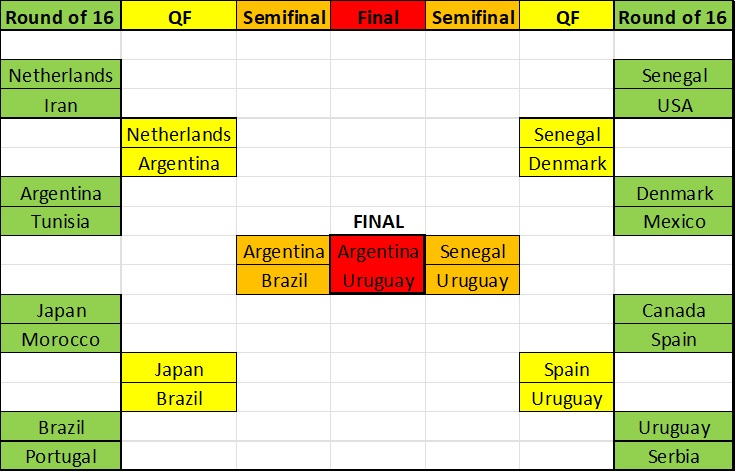

In [167]:
print('Advancing countries: Argentina, Uruguay')

display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%2011.jpg') 

# Finals Predictions

## Argentina vs. Uruguay

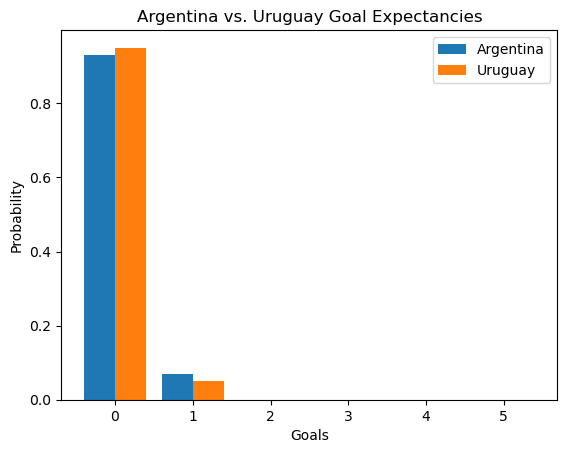

These are the score line probabilities:  [0.8835, 0.04650000000000001, 0.0665, 0.0035000000000000005]


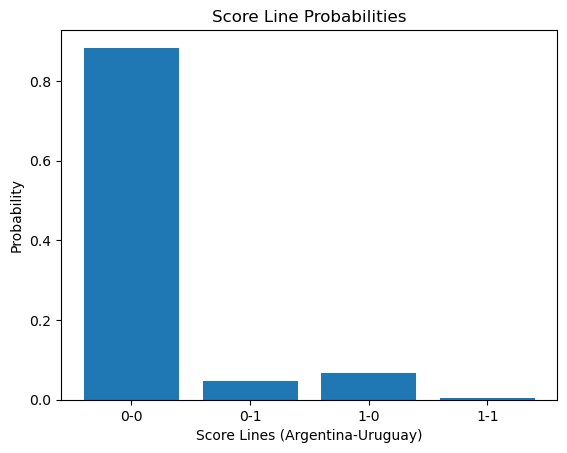

In [168]:
#Argentina xG
ArgentinaxG = (da['AS'][0]) * (da['DS'][29]) * leagueGF

#Uruguay xG
UruguayxG = (da['AS'][29]) * (da['DS'][0]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Argentina probability mass function
Argentina_pmf = poisson.pmf(Goals, ArgentinaxG)
Argentina_pmf = np.round(Argentina_pmf, 2)
Argentina_pmf

#Uruguay probability mass function
Uruguay_pmf = poisson.pmf(Goals, UruguayxG)
Uruguay_pmf = np.round(Uruguay_pmf, 2)
Uruguay_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Argentina_pmf, 0.4, label = 'Argentina')
plt.bar(X_axis + 0.2, Uruguay_pmf, 0.4, label = 'Uruguay')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Argentina vs. Uruguay Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Argentina_pmf[0] * Uruguay_pmf[0])
score_prob_lst.append(Argentina_pmf[0] * Uruguay_pmf[1])
score_prob_lst.append(Argentina_pmf[1] * Uruguay_pmf[0])
score_prob_lst.append(Argentina_pmf[1] * Uruguay_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Argentina-Uruguay)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

In [169]:
# the most likely win score line is 1-0, an Argentina win
# Argentina advances

# Finals Results

Argentina wins the World Cup 2022


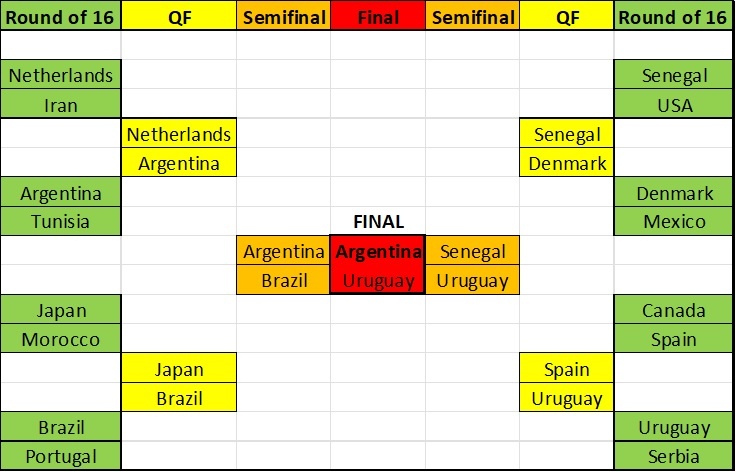

In [170]:
print('Argentina wins the World Cup 2022')
      
display.Image('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%2012.jpg')